In [1]:
#Import the required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import 'application_data.csv'  contains all the information of the client at the time of application.
#The data is about whether a client has payment difficulties.

app_data = pd.read_csv('application_data.csv')
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
#import 2. 'previous_application.csv' contains information about the client’s previous loan data. 
#It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer

prev_app_data = pd.read_csv('previous_application.csv')
prev_app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [4]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Finding out missing values in 'application_data.csv' and appending the columns in a list for those missing values are greater than 40%

In [6]:
#running a for loop to find out missing data in the columns

missing_values_col = []

for i in app_data.columns:
    if (100*app_data[i].isnull().mean()) > 40.0:
        missing_values_col.append(i)
print(missing_values_col)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [7]:
len(missing_values_col)

49

### Creating a new dataframe by dropping the columns which has missing values more than 40%

In [8]:
df = app_data.drop(missing_values_col, axis=1)

In [9]:
df.shape

(307511, 73)

## Fixing missing values in rows and columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [11]:
# extracting last 6 columns of missing values
missing_val_AMT_REQ_CREDIT = df.columns[67:]

In [12]:
# from describe function, it is observed the most repeated or mean / median of these columns are '0'
df[missing_val_AMT_REQ_CREDIT].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [13]:
for i in df[missing_val_AMT_REQ_CREDIT].columns:
    print(df[i].value_counts())

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.

### Filling the following columns with '0', since from the above describe analysis mean and median are close to '0' for these columns
* AMT_REQ_CREDIT_BUREAU_HOUR
* AMT_REQ_CREDIT_BUREAU_DAY
* AMT_REQ_CREDIT_BUREAU_WEEK
* AMT_REQ_CREDIT_BUREAU_MON
* AMT_REQ_CREDIT_BUREAU_QRT
* AMT_REQ_CREDIT_BUREAU_YEAR.

In [14]:
df[missing_val_AMT_REQ_CREDIT]= df[missing_val_AMT_REQ_CREDIT].fillna(0)

<Axes: xlabel='EXT_SOURCE_3'>

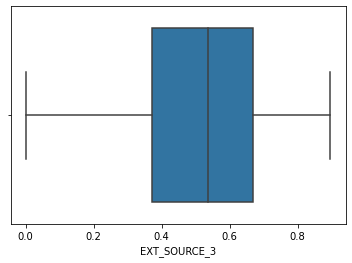

In [15]:
# there is 'EXT_SOURCE_3' column with more missing values
sns.boxplot(df['EXT_SOURCE_3'])

In [16]:
#from the above boxplot it seems 'EXT_SOURCE_3' column is numerical and have normal distribution.
# filling missing values with mean
df['EXT_SOURCE_3'] = df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean())

In [17]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [18]:
# 31% of data is missing, This may be an useful column for EDA, so instead of dropping. we can fill with not known
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('not known')

In [19]:
#check value counts after filling missing values
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
not known                96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

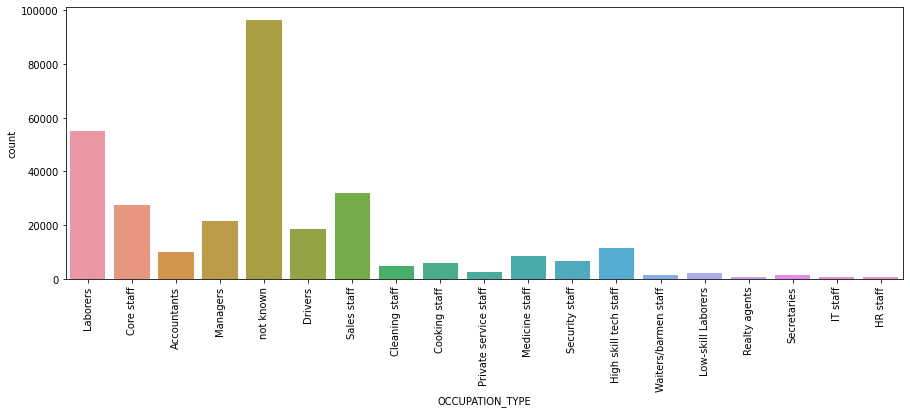

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['OCCUPATION_TYPE'])
plt.xticks(rotation = 90)
plt.show()

### Check for the rows if any missing values in data frame

In [21]:
df[df.isnull().any(axis=1)]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
64          100076       0         Cash loans           M            Y   
68          100080       0    Revolving loans           F            N   
329         100377       0         Cash loans           M            N   
349         100402       0         Cash loans           F            N   
394         100457       0    Revolving loans           F            Y   
...            ...     ...                ...         ...          ...   
306636      455270       0         Cash loans           M            Y   
306725      455367       0         Cash loans           F            N   
307029      455713       0         Cash loans           F            Y   
307387      456113       0         Cash loans           M            N   
307402      456135       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
64                   N             0          180000.0    315000.0   
68                   N             1          157500.0    450000.0   
329                  N             2          157500.0    239850.0   
349                  Y             0           81000.0    276277.5   
394                  Y             0          211500.0    270000.0   
...                ...           ...               ...         ...   
306636               N             2          189000.0    677664.0   
306725               Y             0          202500.0    755190.0   
307029               N             2          153000.0    808650.0   
307387               Y             3          180000.0   1096020.0   
307402               Y             0          157500.0    382500.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
64           9679.5  ...                 0                0                0   
68          22500.0  ...                 0                0                0   
329         25447.5  ...                 0                0                0   
349         21825.0  ...                 0                0                0   
394         13500.0  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
306636      21406.5  ...                 0                1                0   
306725      27985.5  ...                 0                0                0   
307029      26217.0  ...                 0                0                0   
307387      56092.5  ...                 0                0                0   
307402      19125.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
64                    0                        0.0                       0.0   
68                    0                        0.0                       0.0   
329                   0                        0.0                       0.0   
349                   0                        0.0                       0.0   
394                   0                        0.0                       0.0   
...                 ...                        ...                       ...   
306636                0                        0.0                       0.0   
306725                0                        0.0                       0.0   
307029                0                        0.0                       0.0   
307387                0                        0.0                       0.0   
307402                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
64                             0.0                        0.0   
68                             0.0                        0.0   
329                            0.0                        0.0   
349                            0.0                        0.0   
394                            

In [22]:
len(df[df.isnull().any(axis=1)])

2980

In [23]:
len(df)

307511

In [24]:
#Calculate missing values in the rows percentage 
(len(df[df.isnull().any(axis=1)]) / len(df))* 100

0.9690710251015412

### Fixing the missing values in the rows

* Dropping the rows with missing values directly, since (304531 / 307511 = 0.99) there is only one percent of data is being dropped

In [25]:
df.dropna(axis=0, inplace=True)

In [26]:
df.shape

(304531, 73)

### Grouping / Name regularization of Gender, NAME_TYPE_SUITE and ORGANIZATION_TYPE columns

In [27]:
#Replace XNA as 'F' in Gender column
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA', 'F')

In [28]:
#Grouping other_a, other_b and group of people with other
df = df.replace({'NAME_TYPE_SUITE' : {'Other_B' : 'Other', 'Group of people' : 'Other', 'Other_A' : 'Other'}})

In [29]:
df = df.replace({'ORGANIZATION_TYPE' : {'Business Entity Type 3' : 'Business', 'XNA' : 'Other',
                                        'Business Entity Type 2' : 'Business', 'Trade: type 7' : 'Trade',
                                       'Business Entity Type 1' : 'Business','Transport: type 4' : 'Transport',
                                       'Trade: type 3' : 'Trade','Industry: type 9' : 'Industry',
                                       'Industry: type 3' : 'Industry','Industry: type 11' : 'Industry',
                                       'Transport: type 2' : 'Transport','Security Ministries' : 'Security',
                                       'Trade: type 2' : 'Trade','Industry: type 1' : 'Industry',
                                       'Industry: type 4' : 'Industry','Trade: type 6' : 'Trade',
                                       'Industry: type 5' : 'Industry','Industry: type 2' : 'Industry',
                                       'Industry: type 12' : 'Industry','Trade: type 1' : 'Trade',
                                       'Transport: type 1' : 'Transport','Industry: type 6' : 'Industry',
                                       'Industry: type 10' : 'Industry','Industry: type 13' : 'Industry',
                                       'Trade: type 4' : 'Trade','Trade: type 5' : 'Trade',
                                       'Industry: type 8' : 'Industry',}})

In [30]:
# less than 1% organization grouped into 'Other'
df = df.replace({'ORGANIZATION_TYPE' : {'Housing' : 'Other', 'Military' : 'Other','Bank' : 'Other', 'Agriculture' : 'Other',
                                       'Police' : 'Other', 'Postal' : 'Other', 'Restaurant' : 'Other', 'Services' : 'Other',
                                       'University' : 'Other', 'Hotel' : 'Other','Electricity' : 'Other', 'Insurance' : 'Other',
                                       'Telecom' : 'Other', 'Emergency' : 'Other','Advertising' : 'Other', 'Realtor' : 'Other',
                                       'Culture' : 'Other', 'Mobile' : 'Other','Legal Services' : 'Other', 'Cleaning' : 'Other',
                                       'Religion': 'Other', 'Industry: type 7': 'Industry','Transport: type 3': 'Transport'}})

### Observed from numerical days columns have negative numbers, fix those with absolute numbers

In [31]:
df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[304531 rows x 5 columns]

In [32]:
#update absolute values for the days columns
df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 
            'DAYS_LAST_PHONE_CHANGE']] = df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 
            'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].abs()

In [33]:
df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0             9461            637             3648.0             2120   
1            16765           1188             1186.0              291   
2            19046            225             4260.0             2531   
3            19005           3039             9833.0             2437   
4            19932           3038             4311.0             3458   
...            ...            ...                ...              ...   
307506        9327            236             8456.0             1982   
307507       20775         365243             4388.0             4090   
307508       14966           7921             6737.0             5150   
307509       11961           4786             2562.0              931   
307510       16856           1262             5128.0              410   

        DAYS_LAST_PHONE_CHANGE  
0                       1134.0  
1                        828.0  
2                        815.0  
3                        617.0  
4                       1106.0  
...                        ...  
307506                   273.0  
307507                     0.0  
307508                  1909.0  
307509                   322.0  
307510                   787.0  

[304531 rows x 5 columns]

### Finding out how the data is balanced (Target1 - defaulter / clients have payment difficulty and Target0 - non-defaulters)

In [34]:
round(100*df['TARGET'].value_counts(normalize=True),2)

TARGET
0    91.9
1     8.1
Name: proportion, dtype: float64

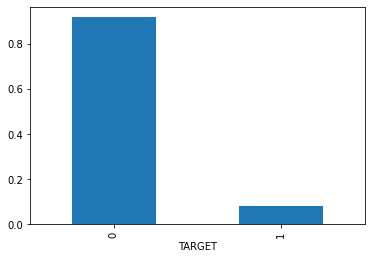

In [35]:
df['TARGET'].value_counts(normalize=True).plot.bar()
plt.show()

In [36]:
# Calculating ratio of imbalance data
round(100*df['TARGET'].value_counts(normalize=True),2)[0] / round(
                                                100*df['TARGET'].value_counts(normalize=True),2)[1]

11.34567901234568

### Classifying categorical and numberical columns based on dtype and unique values

In [37]:
i=0
cat_cols = []
num_cols = []
for col in df.columns:
    if (len(df[col].unique())<=30) or (df[col].dtypes == 'object'):
        #print(col,len(df[col].unique()))
        i=i+1
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [38]:
print(cat_cols)
print(len(cat_cols))

['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DO

In [39]:
print(num_cols)
print(len(num_cols))

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']
15


In [40]:
flag_document = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 
                 'FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
                   'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                   'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
                   'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
                   'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

for i in flag_document:
    print(df[i].value_counts(normalize=True))

FLAG_MOBIL
1    1.0
Name: proportion, dtype: float64
FLAG_EMP_PHONE
1    0.819841
0    0.180159
Name: proportion, dtype: float64
FLAG_WORK_PHONE
0    0.80027
1    0.19973
Name: proportion, dtype: float64
FLAG_CONT_MOBILE
1    0.998141
0    0.001859
Name: proportion, dtype: float64
FLAG_PHONE
0    0.718722
1    0.281278
Name: proportion, dtype: float64
FLAG_EMAIL
0    0.943119
1    0.056881
Name: proportion, dtype: float64
FLAG_DOCUMENT_2
0    0.999957
1    0.000043
Name: proportion, dtype: float64
FLAG_DOCUMENT_3
1    0.71286
0    0.28714
Name: proportion, dtype: float64
FLAG_DOCUMENT_4
0    0.999918
1    0.000082
Name: proportion, dtype: float64
FLAG_DOCUMENT_5
0    0.985292
1    0.014708
Name: proportion, dtype: float64
FLAG_DOCUMENT_6
0    0.911933
1    0.088067
Name: proportion, dtype: float64
FLAG_DOCUMENT_7
0    0.999862
1    0.000138
Name: proportion, dtype: float64
FLAG_DOCUMENT_8
0    0.91833
1    0.08167
Name: proportion, dtype: float64
FLAG_DOCUMENT_9
0    0.996148
1    0.00

### From the above value counts analysis of Flag columns, it is observed that all the columns have two distinct values (0 and 1). And the maximum percentage of the data are '0'. its better to drop as it doesnt provide any insights.

In [41]:
# Dropping the columns which are not useful in cat_cols (columns starts with Flag)
new_cat_cols = []
flag_document = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 
                 'FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
                   'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                   'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
                   'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
                   'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

for i in cat_cols:
    if i not in flag_document:
        new_cat_cols.append(i)
print(new_cat_cols)
print(len(new_cat_cols))

['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
32


### Creating new data frame from updated category and numerical columns

In [42]:
app_cat_df = df[new_cat_cols]
app_num_df = df[num_cols]

### Check numerical data distribution using describe function and box plot

In [43]:
app_num_df.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  304531.000000      3.045310e+05  3.045310e+05  304531.000000   
mean   278171.558800      1.686634e+05  5.995592e+05   27146.369655   
std    102782.532925      2.378910e+05  4.021453e+05   14480.104699   
min    100002.000000      2.565000e+04  4.500000e+04    1615.500000   
25%    189138.500000      1.125000e+05  2.700000e+05   16573.500000   
50%    278193.000000      1.476000e+05  5.172660e+05   24939.000000   
75%    367136.000000      2.025000e+05  8.086500e+05   34641.000000   
max    456255.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.045310e+05               304531.000000  304531.000000   
mean      5.384949e+05                    0.020842   16040.509915   
std       3.690524e+05                    0.013808    4361.978717   
min       4.050000e+04                    0.000290    7489.000000   
25%       2.385000e+05                    0.010006   12418.000000   
50%       4.500000e+05                    0.018850   15755.000000   
75%       6.795000e+05                    0.028663   19682.000000   
max       4.050000e+06                    0.072508   25229.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2  \
count  304531.000000      304531.000000    304531.000000  3.045310e+05   
mean    67743.609127        4986.687785      2994.732070  5.142203e-01   
std    139457.579884        3521.601095      1509.373915  1.911246e-01   
min         0.000000           0.000000         0.000000  8.173617e-08   
25%       934.000000        2012.000000      1721.000000  3.921081e-01   
50%      2221.000000        4505.000000      3255.000000  5.658110e-01   
75%      5713.500000        7478.000000      4299.000000  6.635463e-01   
max    365243.000000       24672.000000      7197.000000  8.549997e-01   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count  304531.000000             304531.000000             304531.000000   
mean        0.510782                  1.422052                  1.405131   
std         0.174507                  2.401424                  2.380308   
min         0.000527                  0.000000                  0.000000   
25%         0.417100                  0.000000                  0.000000   
50%         0.510853                  0.000000                  0.000000   
75%         0.636376                  2.000000                  2.000000   
max         0.896010                348.000000                344.000000   

       DAYS_LAST_PHONE_CHANGE  
count           304531.000000  
mean               965.330085  
std                826.943447  
min                  0.000000  
25%                276.000000  
50%                761.000000  
75%               1572.000000  
max               4292.000000

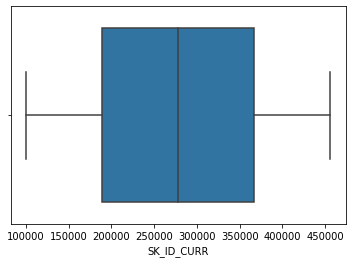

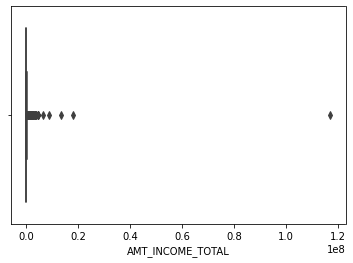

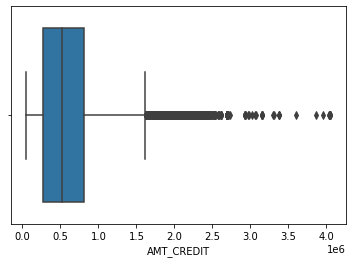

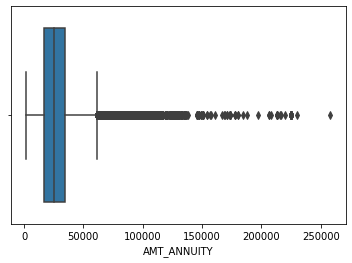

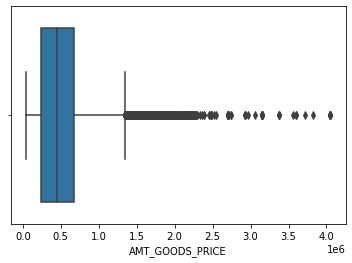

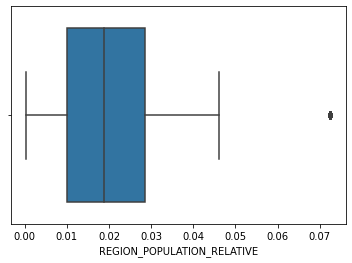

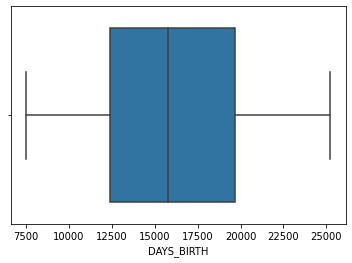

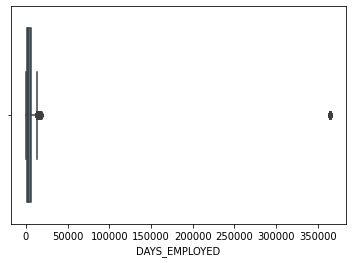

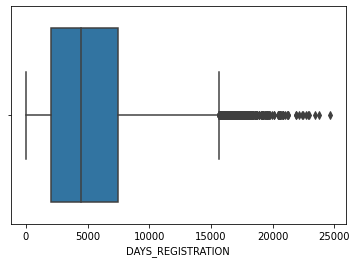

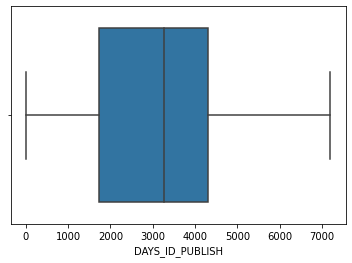

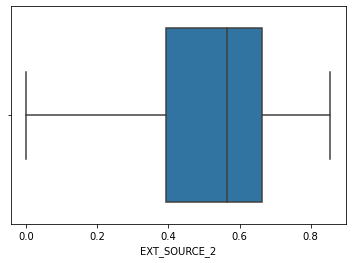

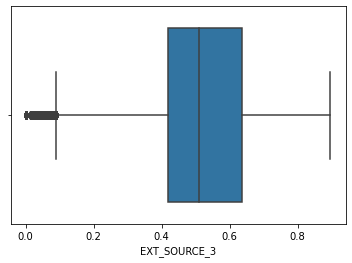

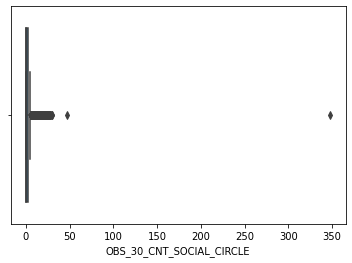

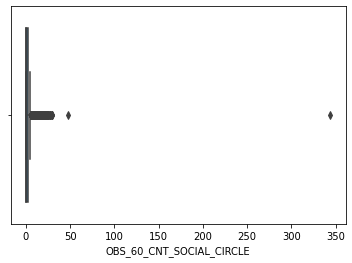

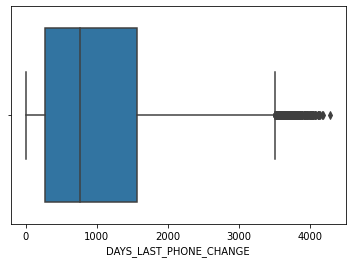

In [44]:
for i in app_num_df.columns:
    sns.boxplot(x=app_num_df[i])
    plt.show()

## Outliers
* Found outliers in many of the numerical data columns, Outliers were identified as many data points are fall out of max range in box plot. 
* And it is evident that by calculating upper and lower bound values using IQR - Refer the below code.
* Not fixing the outliers as suggested in the problem statement hint in upgrad platform.

In [45]:
#Calculating outliers with IQR upper and lower bound
for i in app_num_df.columns:
    q1 = app_num_df[i].describe()['25%']
    q3 = app_num_df[i].describe()['75%']

    iqr = q3-q1
    
    upper_bound = round(q3 + 1.5*iqr, 2)
    lower_bound = round(q1 - 1.5*iqr, 2)
    print(i,"---", upper_bound,'and', lower_bound)

SK_ID_CURR --- 634132.25 and -77857.75
AMT_INCOME_TOTAL --- 337500.0 and -22500.0
AMT_CREDIT --- 1616625.0 and -537975.0
AMT_ANNUITY --- 61742.25 and -10527.75
AMT_GOODS_PRICE --- 1341000.0 and -423000.0
REGION_POPULATION_RELATIVE --- 0.06 and -0.02
DAYS_BIRTH --- 30578.0 and 1522.0
DAYS_EMPLOYED --- 12882.75 and -6235.25
DAYS_REGISTRATION --- 15677.0 and -6187.0
DAYS_ID_PUBLISH --- 8166.0 and -2146.0
EXT_SOURCE_2 --- 1.07 and -0.02
EXT_SOURCE_3 --- 0.97 and 0.09
OBS_30_CNT_SOCIAL_CIRCLE --- 5.0 and -3.0
OBS_60_CNT_SOCIAL_CIRCLE --- 5.0 and -3.0
DAYS_LAST_PHONE_CHANGE --- 3516.0 and -1668.0


### Univariate analysis of numerical columns of application data

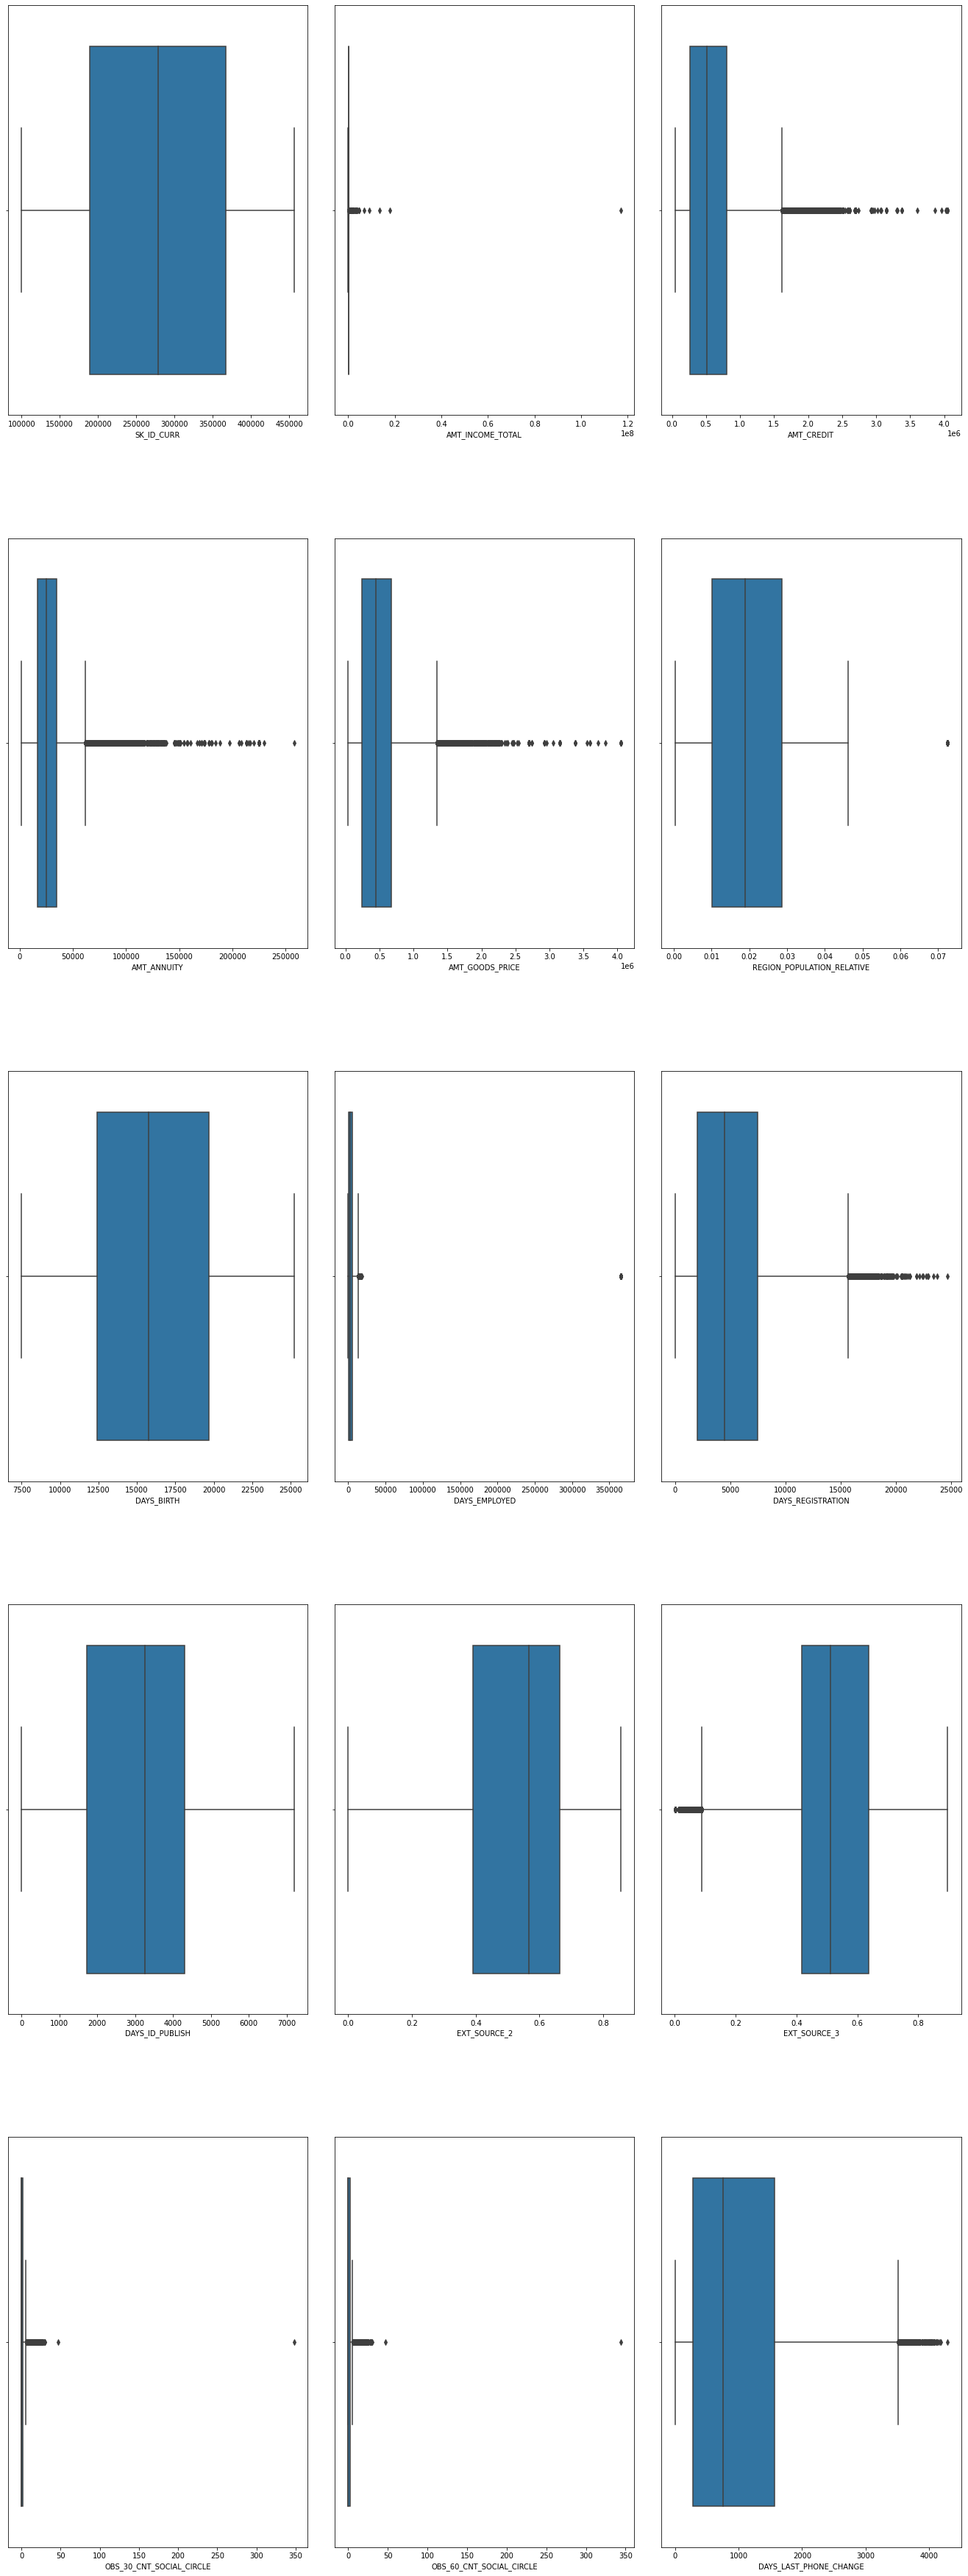

In [46]:
fig, axes = plt.subplots(nrows=5, ncols=3)
fig.subplots_adjust(left=0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)

for ax, column in zip(axes.flatten(), app_num_df.columns):
    sns.boxplot(app_num_df[column], ax=ax)

### Filter numerical data using target variable '0' and '1'

* Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

In [47]:
app_num_df_1 = app_num_df[df['TARGET'] == 1]
app_num_df_0 = app_num_df[df['TARGET'] == 0]

### Plot all numerical columns wrt target variable 0 and 1

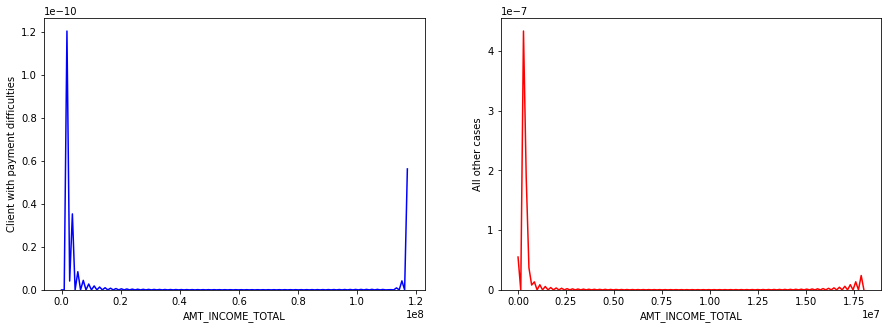

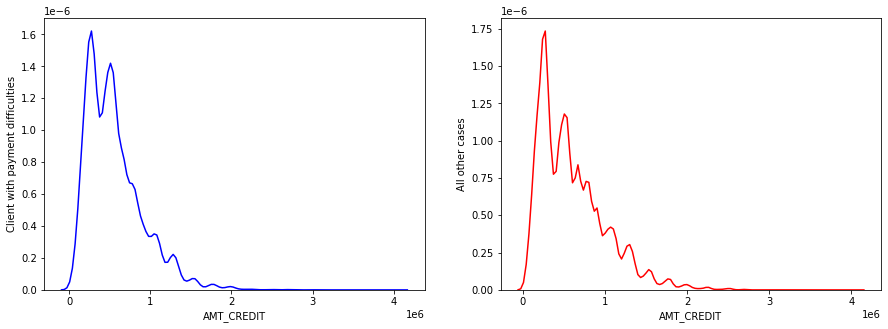

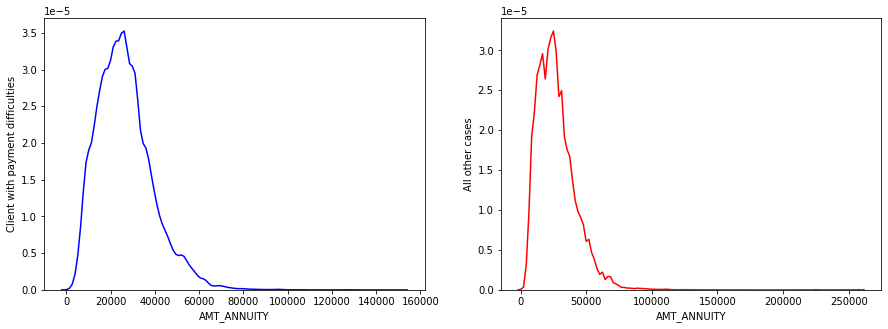

In [48]:
for i in app_num_df.columns[1:4]:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(app_num_df_1[i], hist=False, color='blue')
    plt.xlabel(i)
    plt.ylabel('Client with payment difficulties')
    plt.subplot(1,2,2)
    sns.distplot(app_num_df_0[i], hist=False, color='red')
    plt.xlabel(i)
    plt.ylabel('All other cases')
    plt.show()

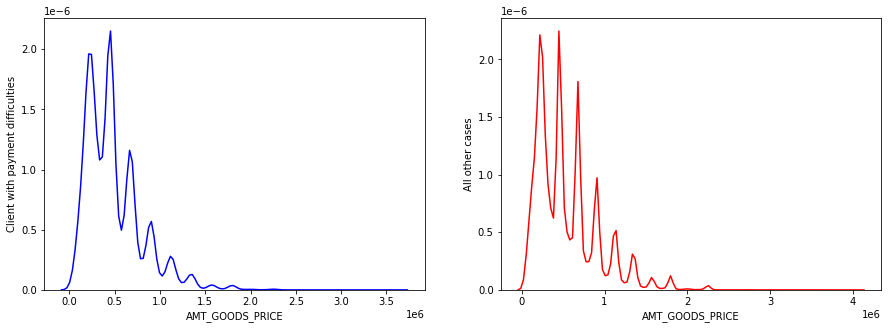

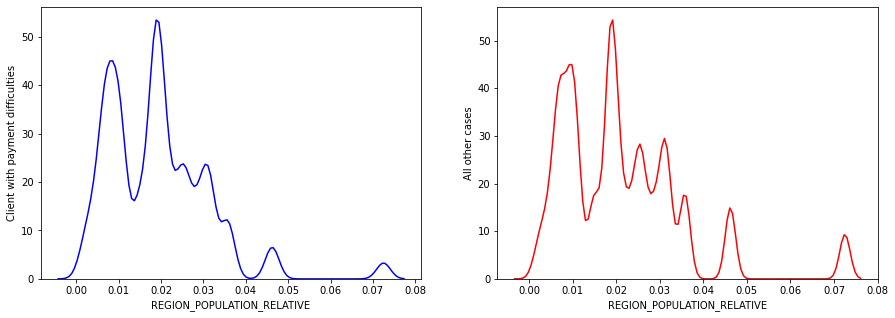

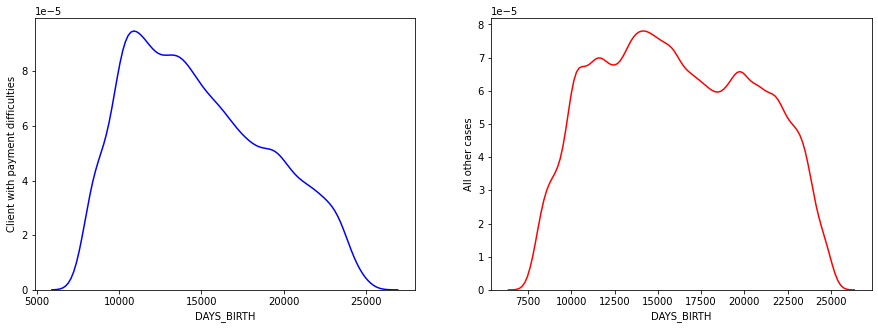

In [49]:
for i in app_num_df.columns[4:7]:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(app_num_df_1[i], hist=False, color='blue')
    plt.xlabel(i)
    plt.ylabel('Client with payment difficulties')
    plt.subplot(1,2,2)
    sns.distplot(app_num_df_0[i], hist=False, color='red')
    plt.xlabel(i)
    plt.ylabel('All other cases')
    plt.show()

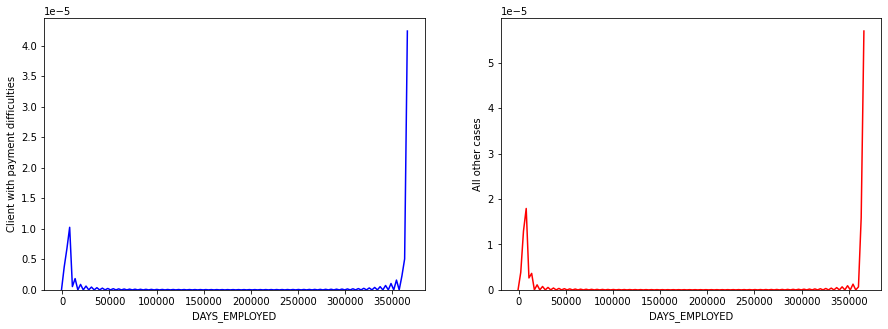

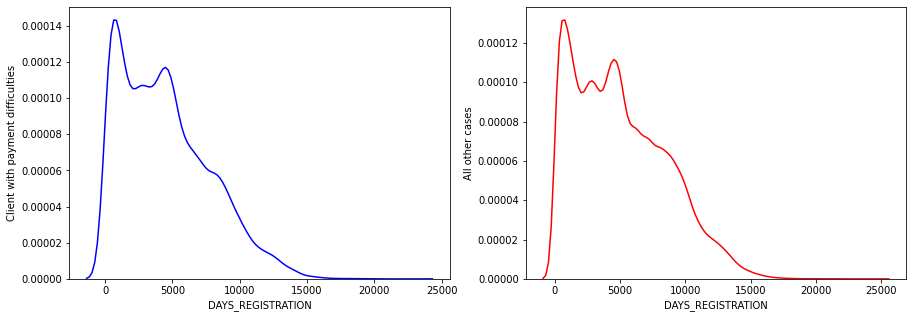

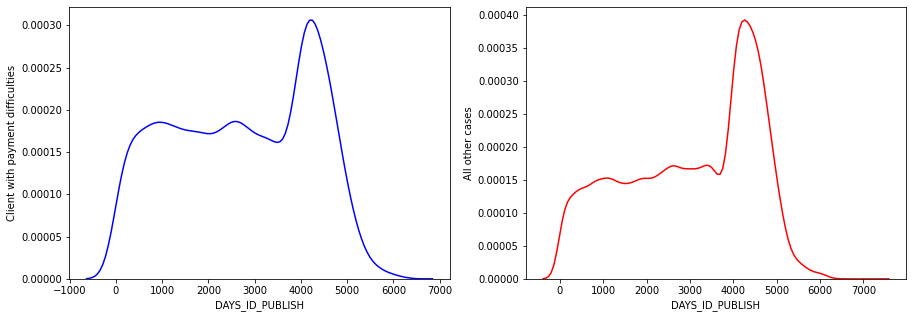

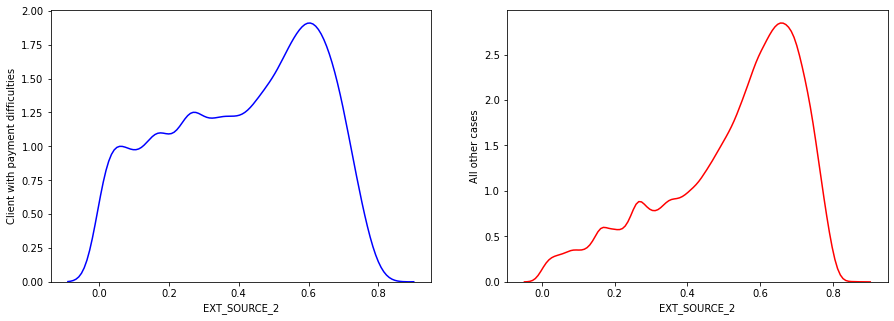

In [50]:
for i in app_num_df.columns[7:11]:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(app_num_df_1[i], hist=False, color='blue')
    plt.xlabel(i)
    plt.ylabel('Client with payment difficulties')
    plt.subplot(1,2,2)
    sns.distplot(app_num_df_0[i], hist=False, color='red')
    plt.xlabel(i)
    plt.ylabel('All other cases')
    plt.show()

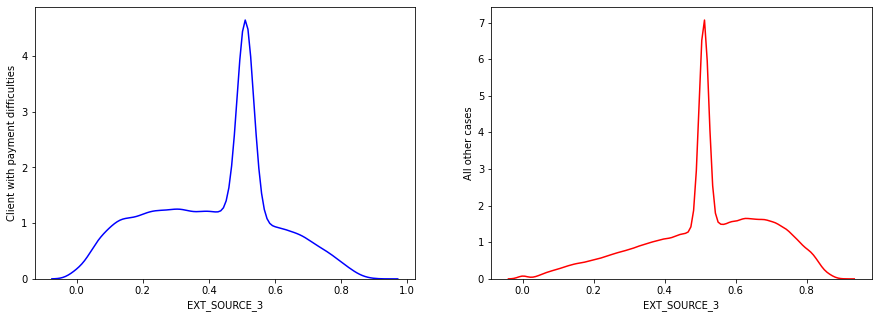

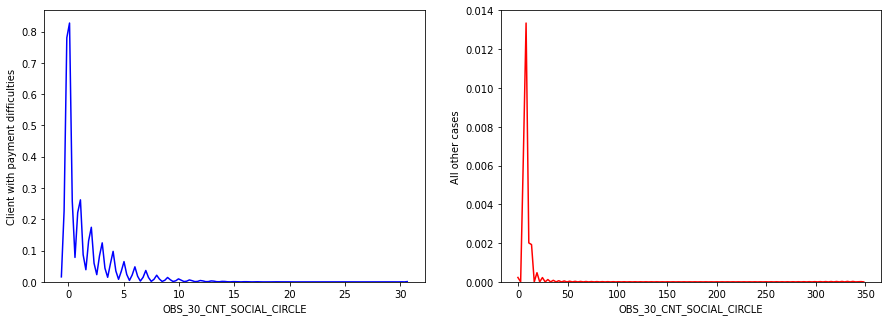

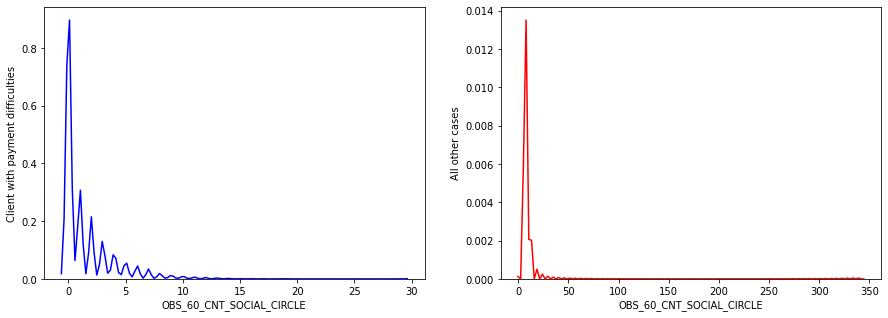

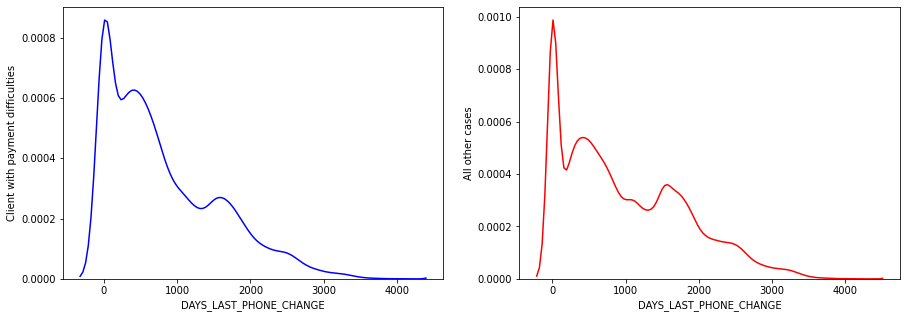

In [51]:
for i in app_num_df.columns[11:]:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(app_num_df_1[i], hist=False, color='blue')
    plt.xlabel(i)
    plt.ylabel('Client with payment difficulties')
    plt.subplot(1,2,2)
    sns.distplot(app_num_df_0[i], hist=False, color='red')
    plt.xlabel(i)
    plt.ylabel('All other cases')
    plt.show()

## Univariate (Numerical data Observations)

* Client with payment difficulties income have majorly distributed between 50000 and 200000
* Credit amount of the loan dist plot seems similar observation between client with payment difficulties and not.
* From below box plot, it is observed that an outlier in the Target 1 data distribution get skewed and unbale to get any insights from that.
* So it’s better to visualize using binning method for amount income, amount credit and amount goods price columns.

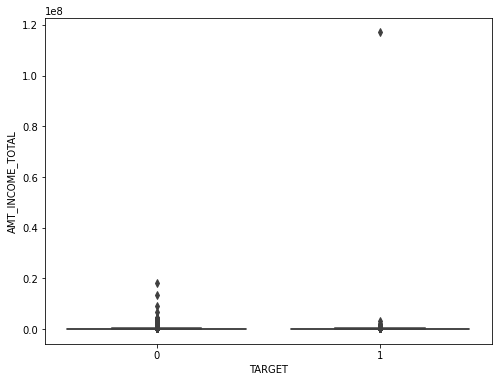

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['TARGET'], y=app_num_df['AMT_INCOME_TOTAL'])
plt.show()

In [53]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
labels = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

app_cat_df['Income Range'] = pd.cut(app_num_df['AMT_INCOME_TOTAL'],bins = bins, labels = labels)
app_cat_df['Credit Range'] = pd.cut(app_num_df['AMT_CREDIT'],bins = bins, labels = labels)
app_cat_df['Goods Price Range'] = pd.cut(app_num_df['AMT_GOODS_PRICE'],bins = bins, labels = labels)

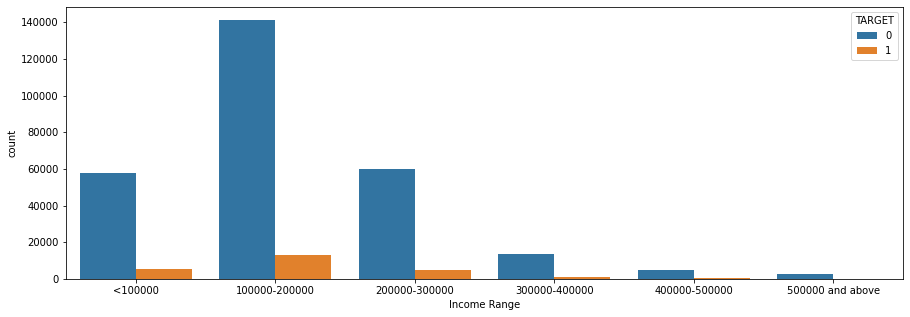

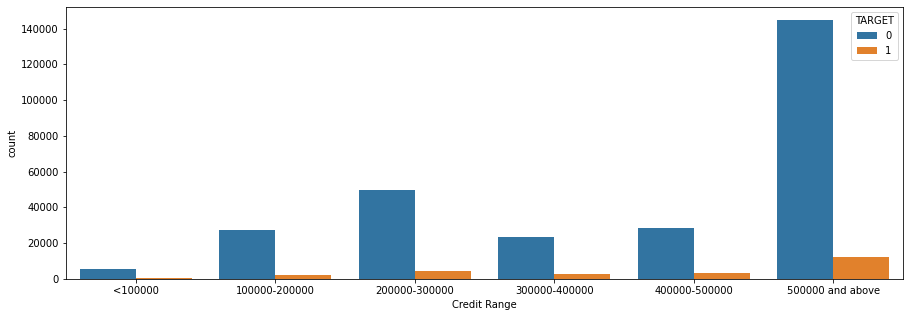

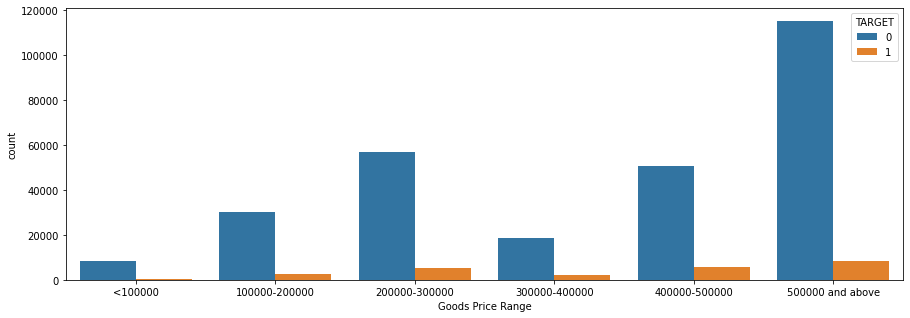

In [54]:
new_cols = ['Income Range', 'Credit Range','Goods Price Range' ]
for i in new_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(app_cat_df[i], hue=df['TARGET'])
    plt.xlabel(i)
    plt.show()

### Insights from Income and credit columns after applying binning method

* Amount Income - '<100000', '100000-200000' contributes for more loan applications and more likely to default
* Amount Income - Clients who have above 300000 less likely to loan repay default
* Amount Credit - Maximum clients have credit range above 500000.


## Bivariate / Multivariate Data analysis of Numerical columns data

* Correlation and heatmap plots



In [55]:
app_num_df.columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

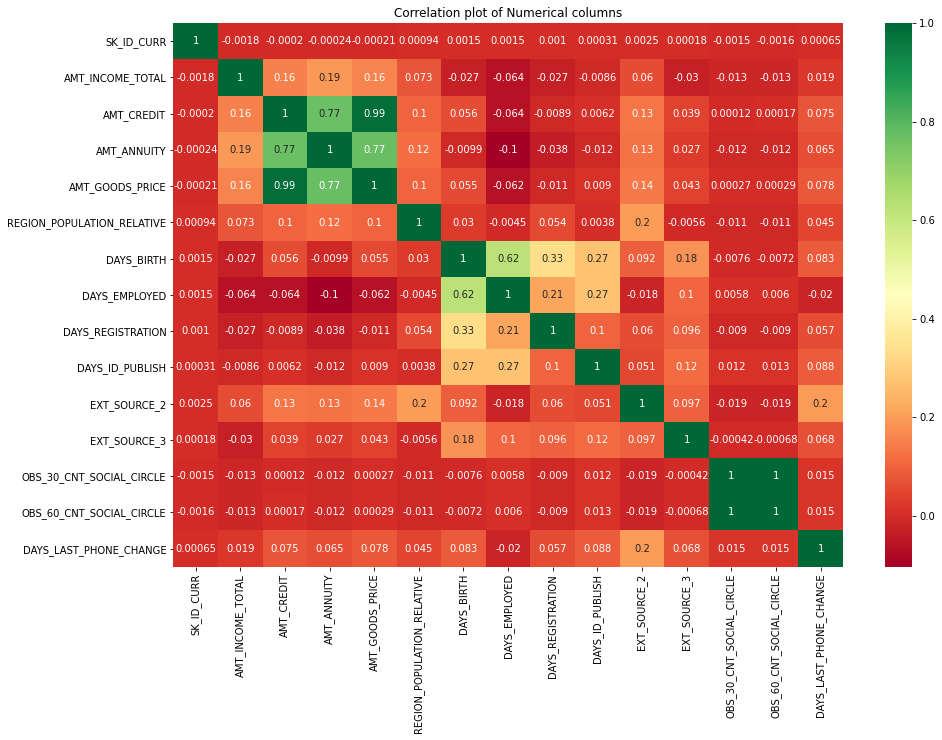

In [56]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(app_num_df.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation plot of Numerical columns')
plt.show()

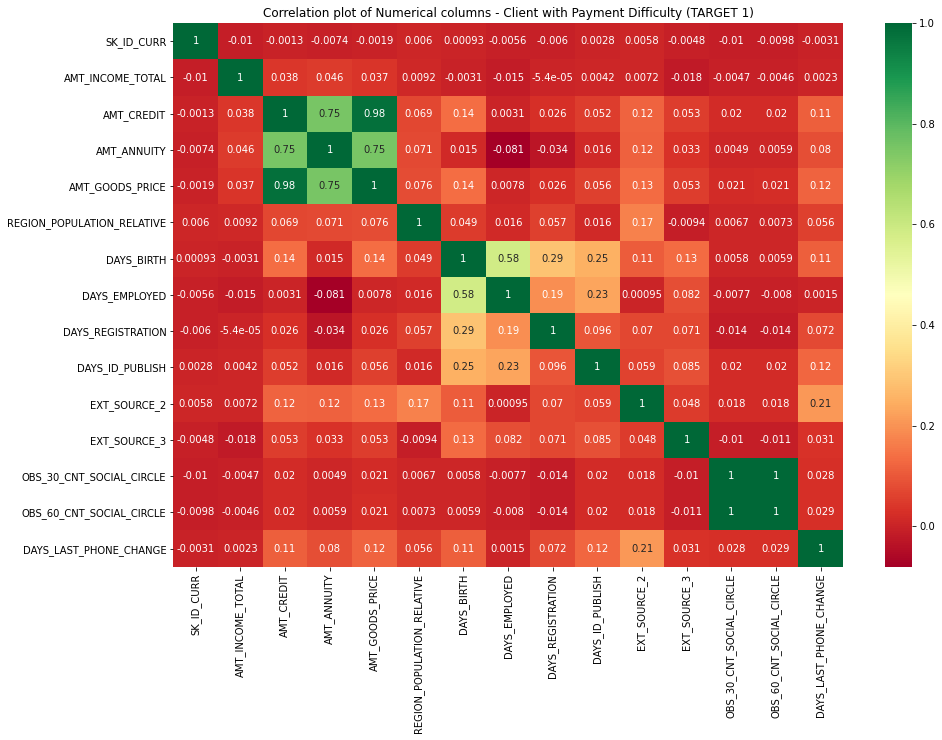

In [57]:
#Target 1 data correlation
plt.figure(figsize=(15,10))
ax = sns.heatmap(app_num_df_1.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation plot of Numerical columns - Client with Payment Difficulty (TARGET 1)')
plt.show()

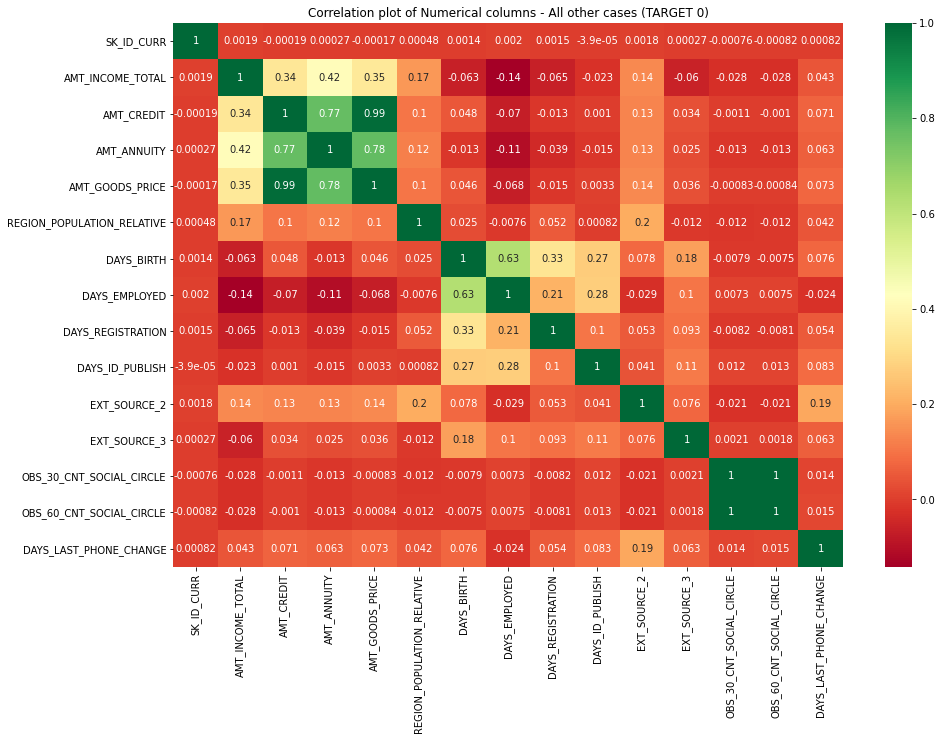

In [58]:
#Target 0 data correlation
plt.figure(figsize=(15,10))
ax = sns.heatmap(app_num_df_0.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation plot of Numerical columns - All other cases (TARGET 0)')
plt.show()

In [59]:
#finding Top 10 Correlated values for client with payment difficulties (Target 1)
corr1 = round(app_num_df_1.corr(),2)
c1 = corr1.abs().unstack().reset_index()
c1.columns = ['col1', 'col2', 'Correlation_Target_1']
var = c1.sort_values(by='Correlation_Target_1', ascending = False)
corr_target_1 = var[var['Correlation_Target_1'] < 1.0].head(20)[::2]

In [60]:
corr_target_1

col1                        col2  Correlation_Target_1
62          AMT_GOODS_PRICE                  AMT_CREDIT                  0.98
49              AMT_ANNUITY             AMT_GOODS_PRICE                  0.75
63          AMT_GOODS_PRICE                 AMT_ANNUITY                  0.75
111           DAYS_EMPLOYED                  DAYS_BIRTH                  0.58
98               DAYS_BIRTH           DAYS_REGISTRATION                  0.29
99               DAYS_BIRTH             DAYS_ID_PUBLISH                  0.25
114           DAYS_EMPLOYED             DAYS_ID_PUBLISH                  0.23
220  DAYS_LAST_PHONE_CHANGE                EXT_SOURCE_2                  0.21
127       DAYS_REGISTRATION               DAYS_EMPLOYED                  0.19
155            EXT_SOURCE_2  REGION_POPULATION_RELATIVE                  0.17

In [61]:
#finding Top 10 Correlated values for client with no payment difficulties / non-defaulters (Target 0)
corr0 = round(app_num_df_0.corr(),2)
c1 = corr0.abs().unstack().reset_index()
c1.columns = ['col1', 'col2', 'Correlation_Target_0']
var = c1.sort_values(by='Correlation_Target_0', ascending = False)
corr_target_0 = var[var['Correlation_Target_0'] < 1.0].head(20)[::2]

In [62]:
corr_target_0

col1               col2  Correlation_Target_0
62   AMT_GOODS_PRICE         AMT_CREDIT                  0.99
63   AMT_GOODS_PRICE        AMT_ANNUITY                  0.78
33        AMT_CREDIT        AMT_ANNUITY                  0.77
111    DAYS_EMPLOYED         DAYS_BIRTH                  0.63
46       AMT_ANNUITY   AMT_INCOME_TOTAL                  0.42
61   AMT_GOODS_PRICE   AMT_INCOME_TOTAL                  0.35
31        AMT_CREDIT   AMT_INCOME_TOTAL                  0.34
98        DAYS_BIRTH  DAYS_REGISTRATION                  0.33
142  DAYS_ID_PUBLISH      DAYS_EMPLOYED                  0.28
99        DAYS_BIRTH    DAYS_ID_PUBLISH                  0.27

## Bivariate / Multivariate Numerical data insights from EDA (Numerical vs Numerical)
* Positive correlation between Credit amount of the loan (AMT_CREDIT) and for consumer loans it is the price of the goods for which the loan is given (AMT_GOODS_PRICE)
* Positive correlation between Credit amount of the loan (AMT CREDIT) and Loan annuity (AMT_ANNUITY)
* AMT_INCOME_TOTAL have better positive correlation with AMT CREDIT, AMT ANNUTIY and AMT GOODS PRICE for the applicants who dont have payment issues than clients with payment difficulties
* Positive correlation between Days employed and Days birth

### Visualization of highly correlated columns using scatter plot

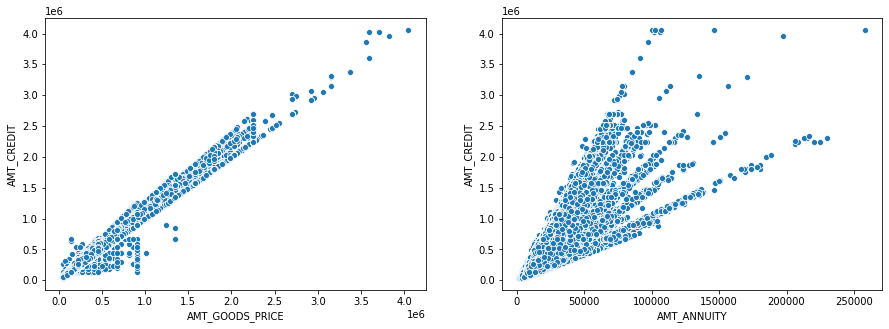

In [63]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=app_num_df, x='AMT_GOODS_PRICE', y='AMT_CREDIT')
plt.subplot(1,2,2)
sns.scatterplot(data=app_num_df, x='AMT_ANNUITY', y='AMT_CREDIT')
plt.show()

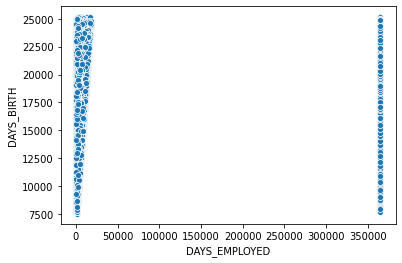

In [64]:
sns.scatterplot(data=app_num_df, x='DAYS_EMPLOYED', y='DAYS_BIRTH')
plt.show()

## Categorical data analysis

In [65]:
app_cat_df

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0            1         Cash loans           M            N               Y   
1            0         Cash loans           F            N               N   
2            0    Revolving loans           M            Y               Y   
3            0         Cash loans           F            N               Y   
4            0         Cash loans           M            N               Y   
...        ...                ...         ...          ...             ...   
307506       0         Cash loans           M            N               N   
307507       0         Cash loans           F            N               Y   
307508       0         Cash loans           F            N               Y   
307509       1         Cash loans           F            N               Y   
307510       0         Cash loans           F            N               N   

        CNT_CHILDREN NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0                  0   Unaccompanied               Working   
1                  0          Family         State servant   
2                  0   Unaccompanied               Working   
3                  0   Unaccompanied               Working   
4                  0   Unaccompanied               Working   
...              ...             ...                   ...   
307506             0   Unaccompanied               Working   
307507             0   Unaccompanied             Pensioner   
307508             0   Unaccompanied               Working   
307509             0   Unaccompanied  Commercial associate   
307510             0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  ...  \
0       Secondary / secondary special  Single / not married  ...   
1                    Higher education               Married  ...   
2       Secondary / secondary special  Single / not married  ...   
3       Secondary / secondary special        Civil marriage  ...   
4       Secondary / secondary special  Single / not married  ...   
...                               ...                   ...  ...   
307506  Secondary / secondary special             Separated  ...   
307507  Secondary / secondary special                 Widow  ...   
307508               Higher education             Separated  ...   
307509  Secondary / secondary special               Married  ...   
307510               Higher education               Married  ...   

       DEF_60_CNT_SOCIAL_CIRCLE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                           2.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
307506                      0.0                        0.0   
307507                      0.0                        0.0   
307508                      0.0                        1.0   
307509                      0.0                        0.0   
307510                      0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
307506                        0.0                         0.0   
307507                        0.0                         0.0   
307508                        0.0                         0.0   
307509                        0.0                         0.0   
307510                        0.0                

In [66]:
app_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304531 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   TARGET                       304531 non-null  int64   
 1   NAME_CONTRACT_TYPE           304531 non-null  object  
 2   CODE_GENDER                  304531 non-null  object  
 3   FLAG_OWN_CAR                 304531 non-null  object  
 4   FLAG_OWN_REALTY              304531 non-null  object  
 5   CNT_CHILDREN                 304531 non-null  int64   
 6   NAME_TYPE_SUITE              304531 non-null  object  
 7   NAME_INCOME_TYPE             304531 non-null  object  
 8   NAME_EDUCATION_TYPE          304531 non-null  object  
 9   NAME_FAMILY_STATUS           304531 non-null  object  
 10  NAME_HOUSING_TYPE            304531 non-null  object  
 11  OCCUPATION_TYPE              304531 non-null  object  
 12  CNT_FAM_MEMBERS              304531 non-null  flo

In [67]:
#run a for loop in applications dataframe and find out categorical columns which dtype are int or float
convert_to_category = []
for i in app_cat_df.columns:
    if app_cat_df[i].dtype == 'int64' or 'float64':
        convert_to_category.append(i)  

In [68]:
print(convert_to_category)

['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'Income Range', 'Credit Range', 'Goods Price Range']


In [69]:
#Type cast all categorical columns into category type
app_cat_df[convert_to_category] = app_cat_df[convert_to_category].astype('category')

In [70]:
app_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304531 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   TARGET                       304531 non-null  category
 1   NAME_CONTRACT_TYPE           304531 non-null  category
 2   CODE_GENDER                  304531 non-null  category
 3   FLAG_OWN_CAR                 304531 non-null  category
 4   FLAG_OWN_REALTY              304531 non-null  category
 5   CNT_CHILDREN                 304531 non-null  category
 6   NAME_TYPE_SUITE              304531 non-null  category
 7   NAME_INCOME_TYPE             304531 non-null  category
 8   NAME_EDUCATION_TYPE          304531 non-null  category
 9   NAME_FAMILY_STATUS           304531 non-null  category
 10  NAME_HOUSING_TYPE            304531 non-null  category
 11  OCCUPATION_TYPE              304531 non-null  category
 12  CNT_FAM_MEMBERS              304531 non-null  cat

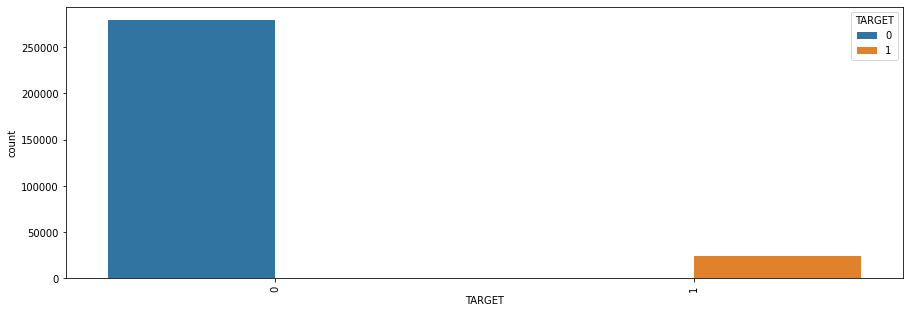

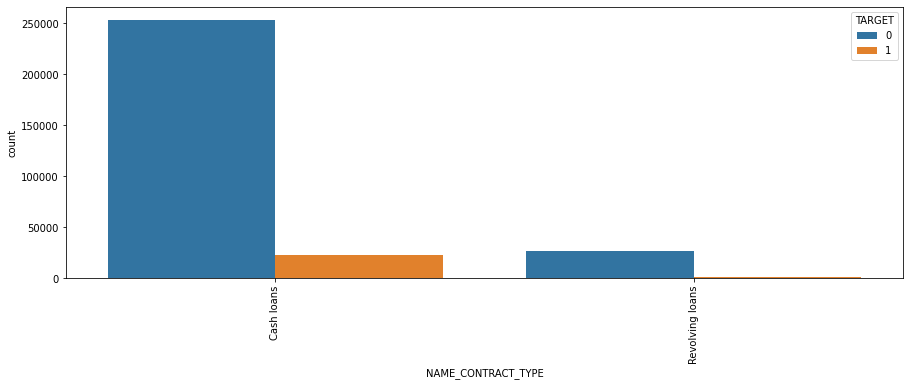

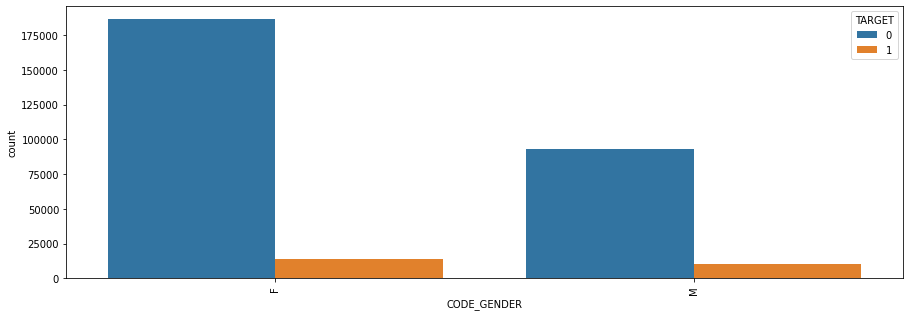

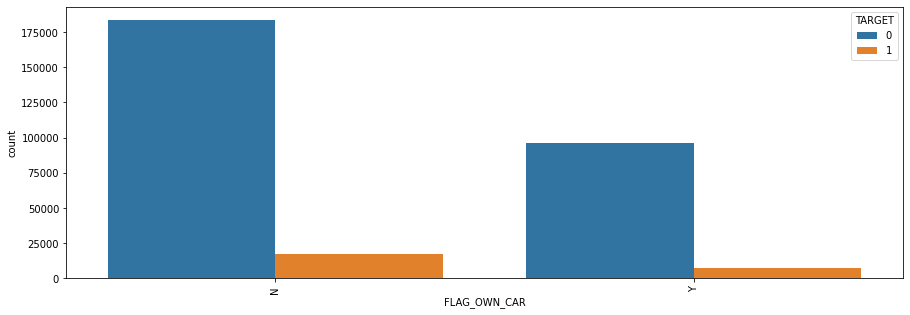

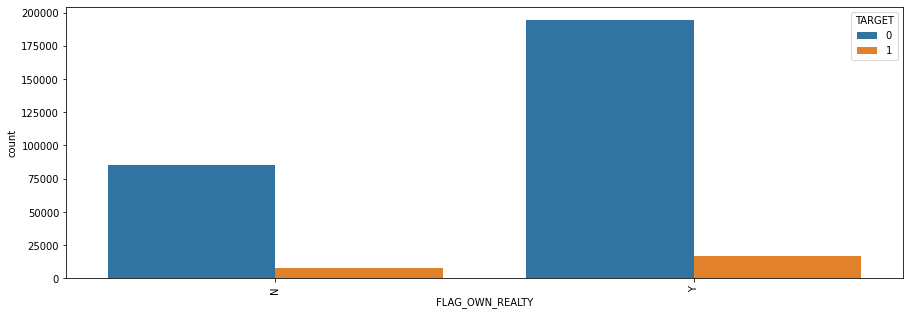

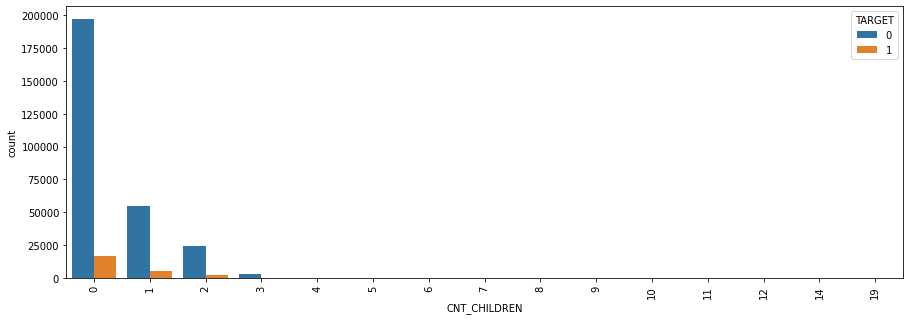

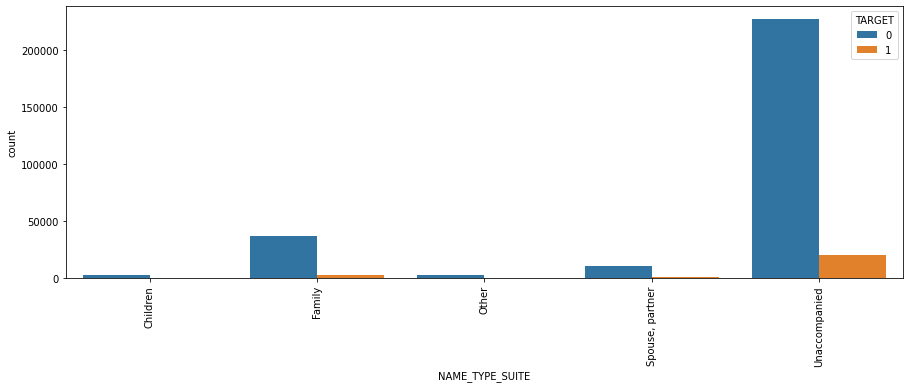

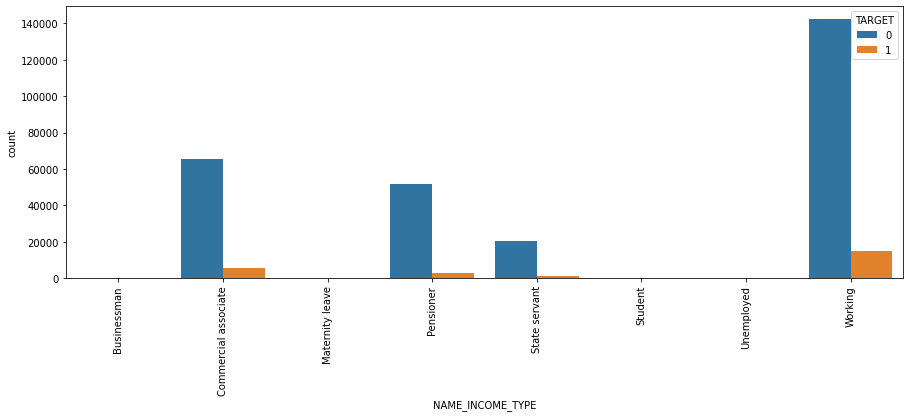

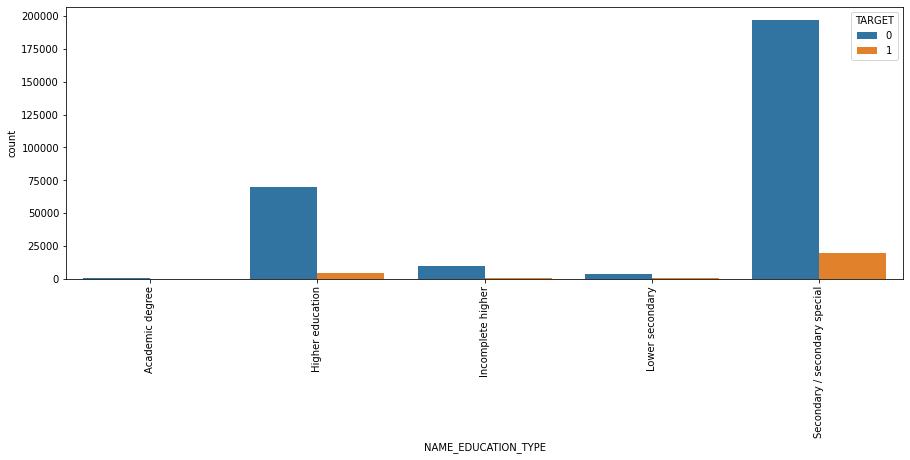

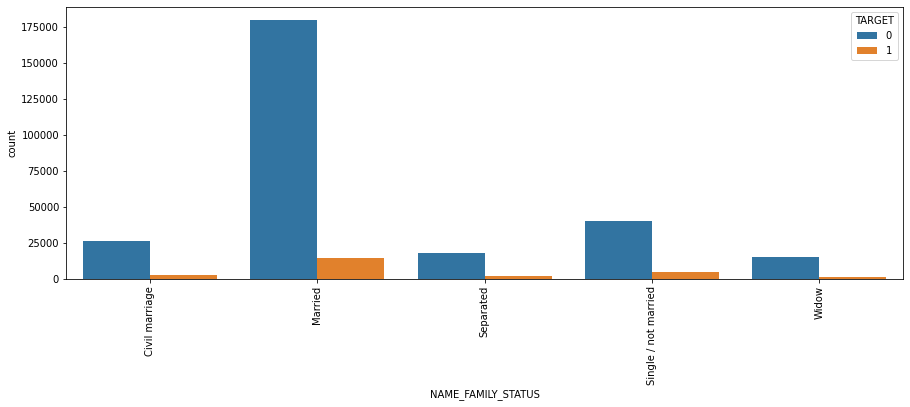

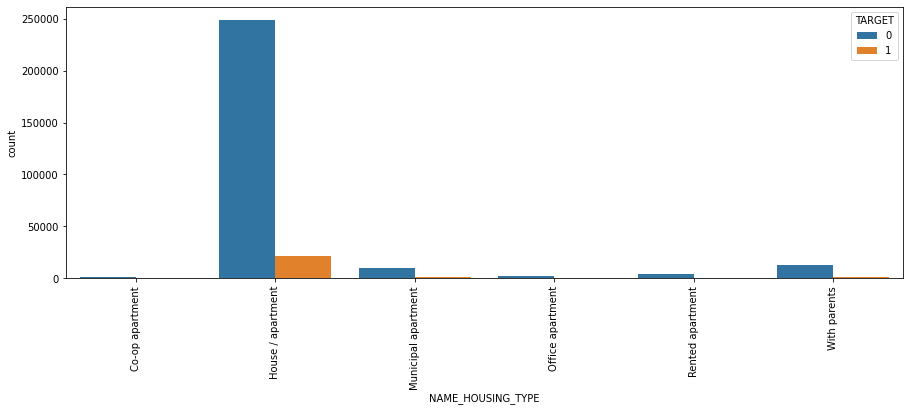

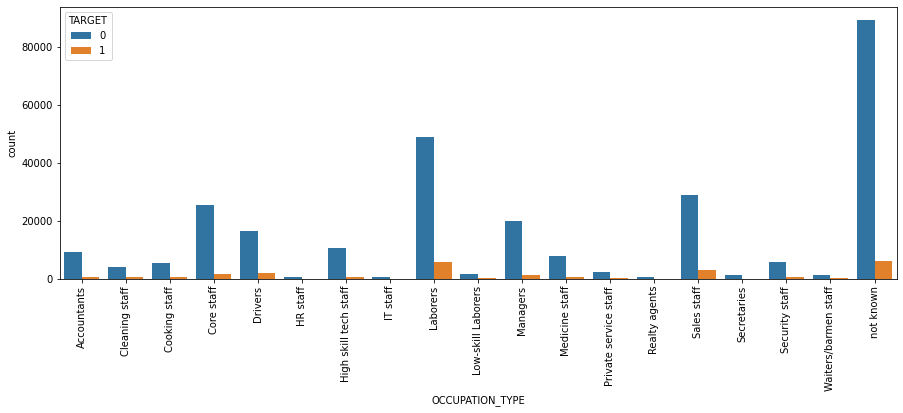

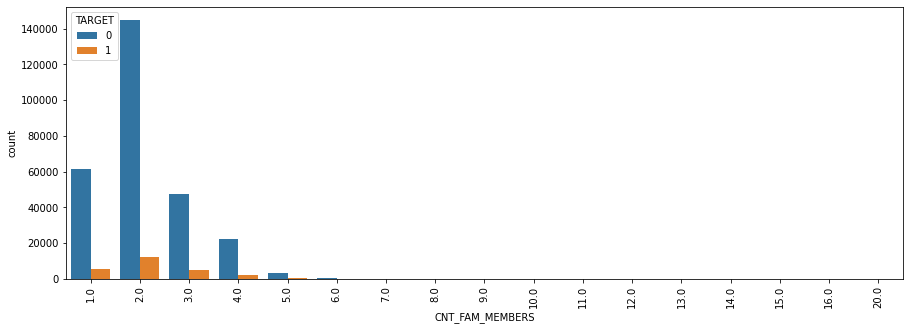

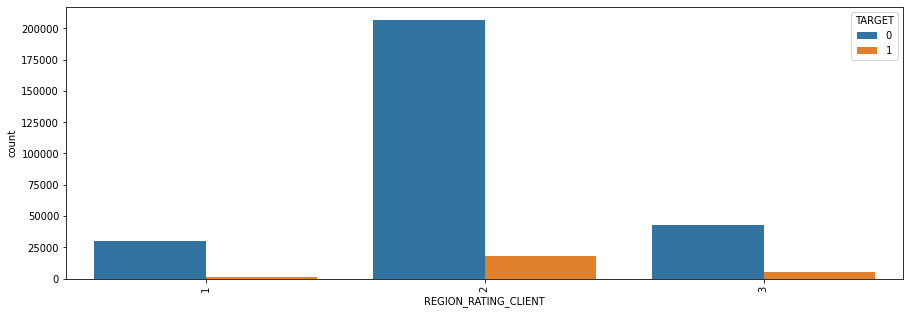

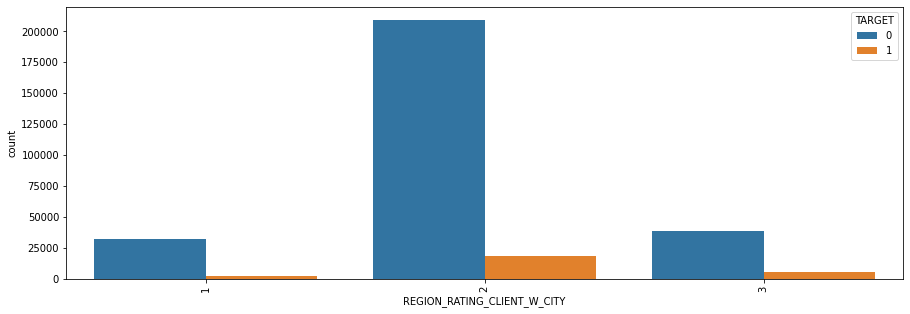

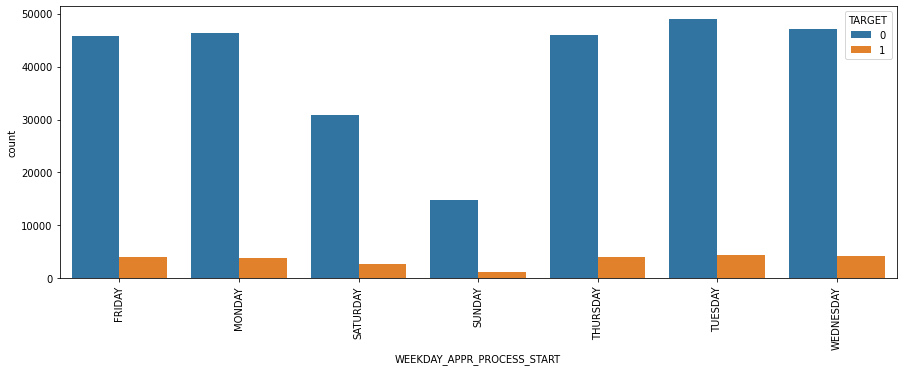

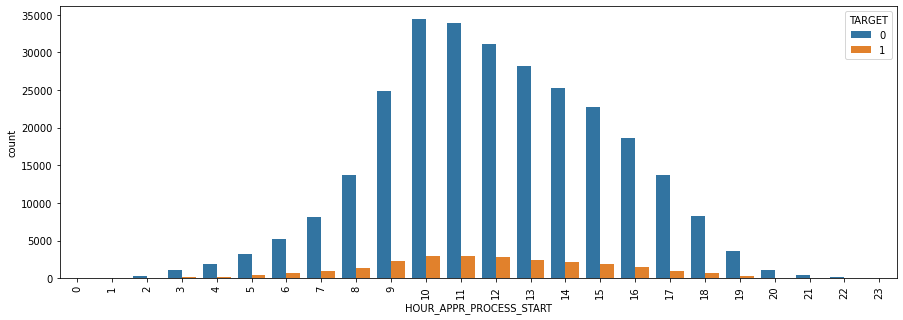

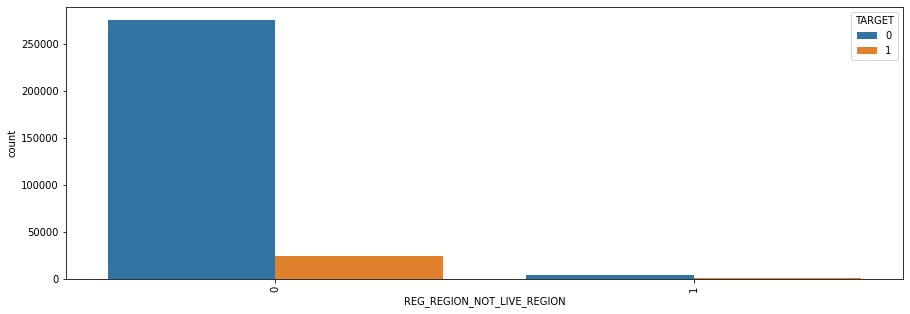

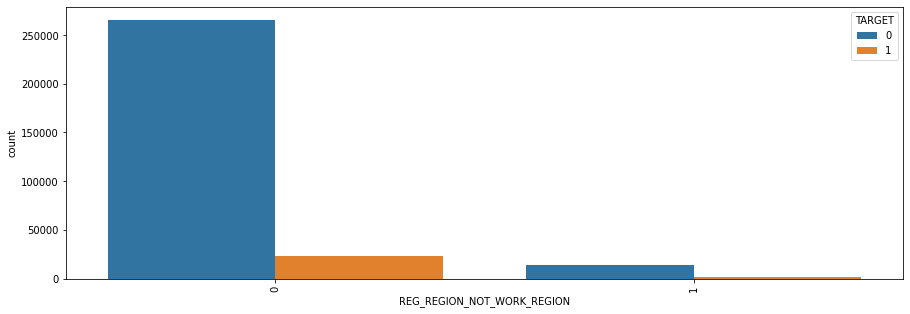

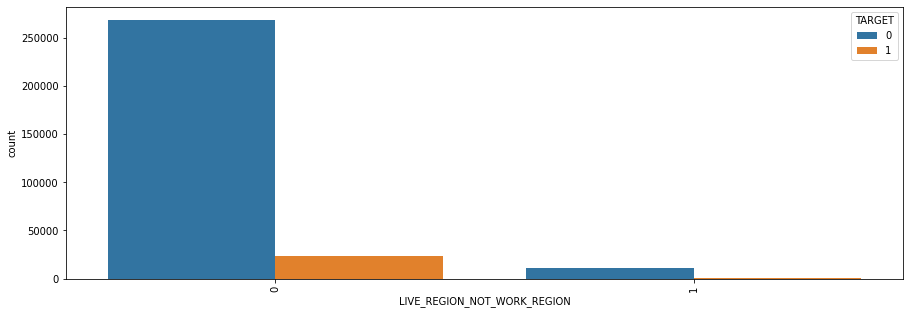

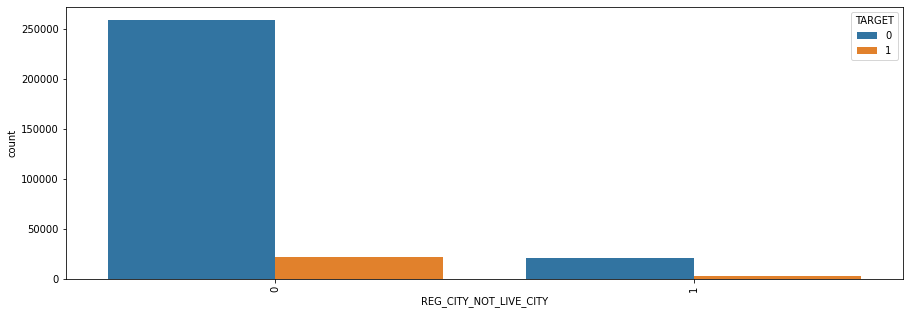

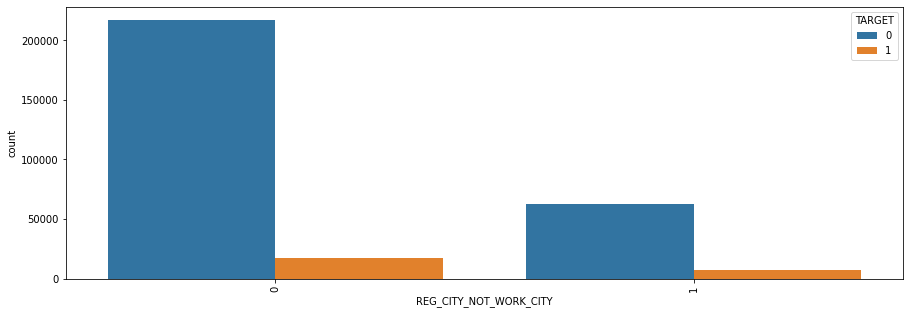

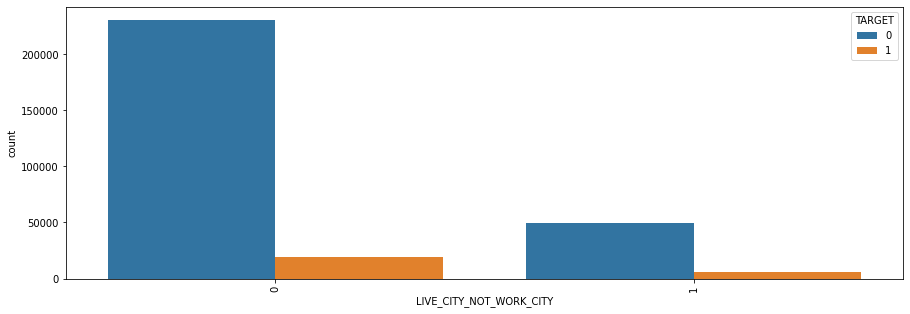

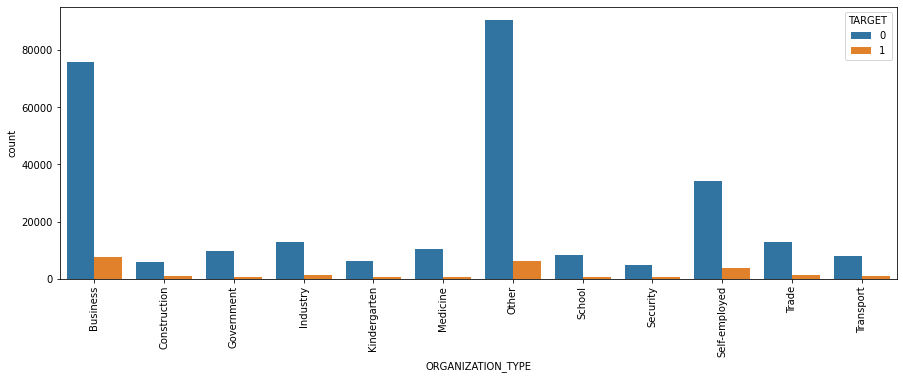

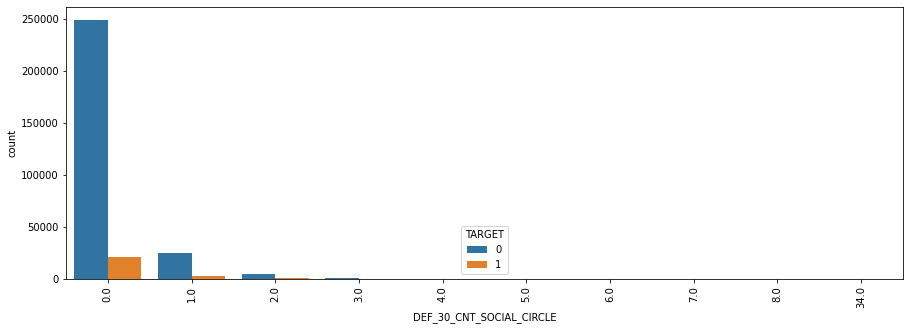

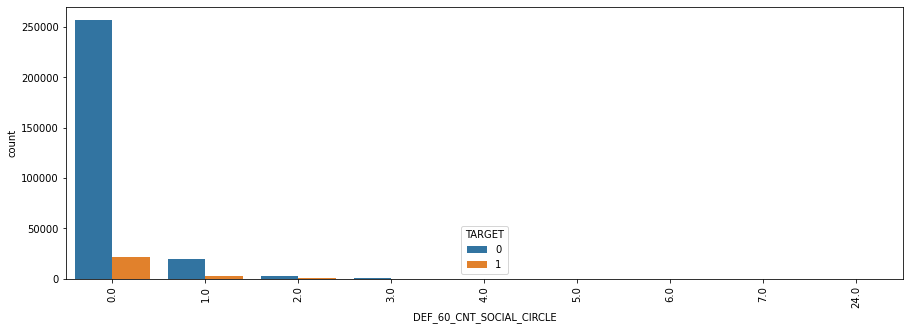

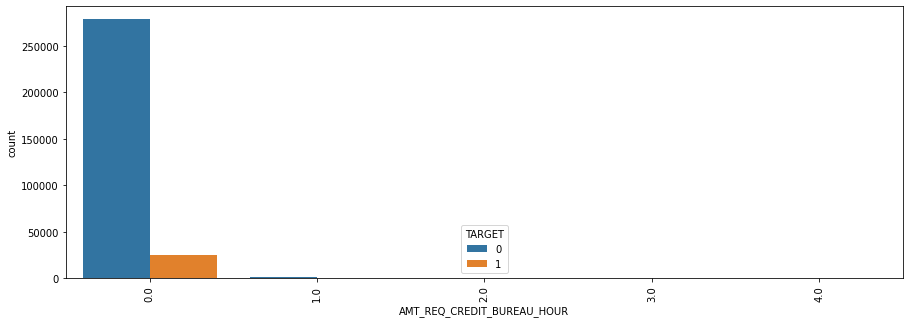

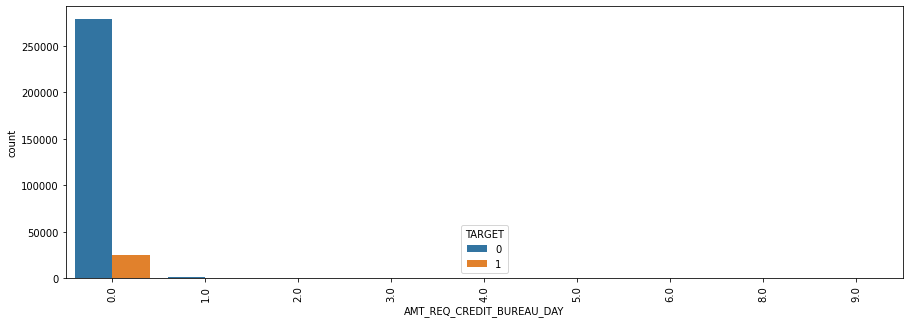

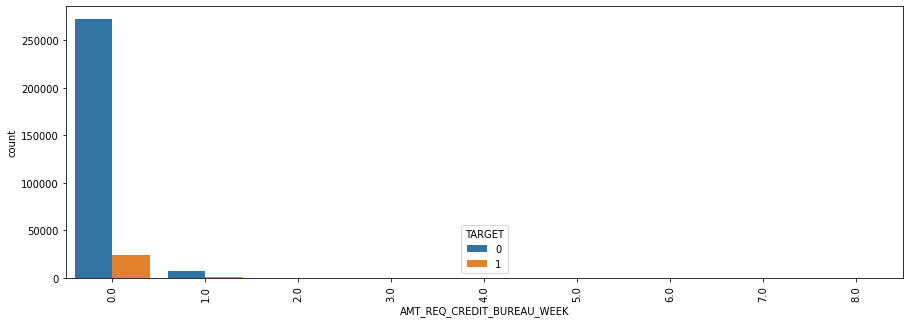

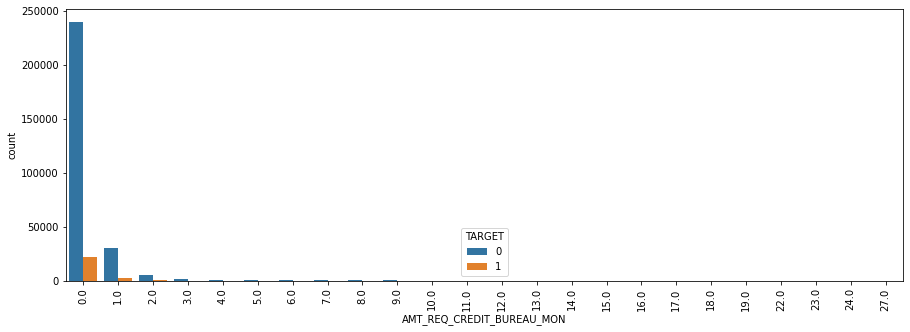

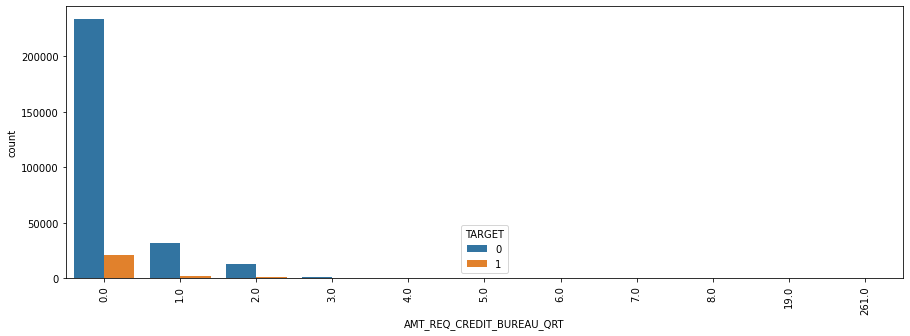

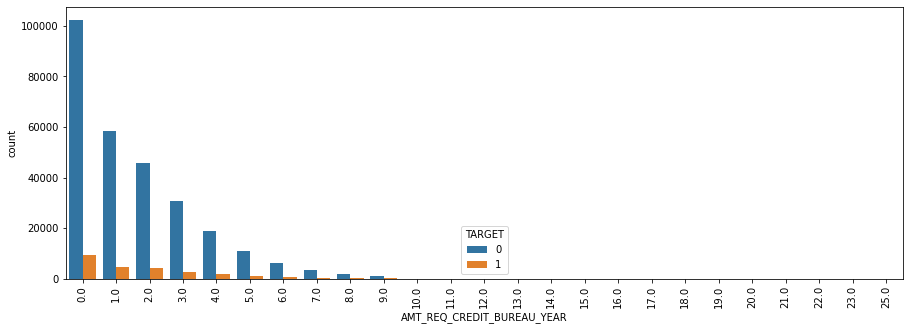

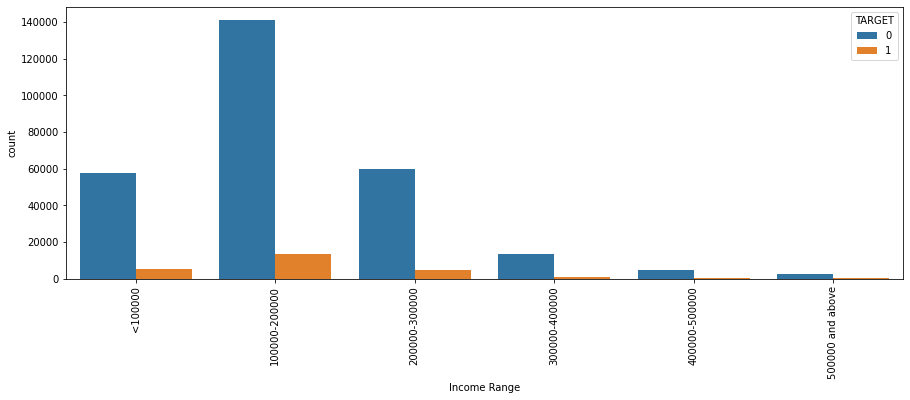

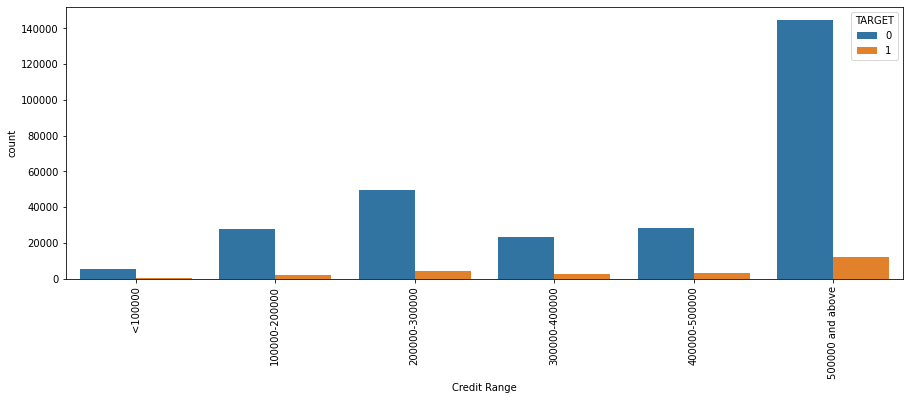

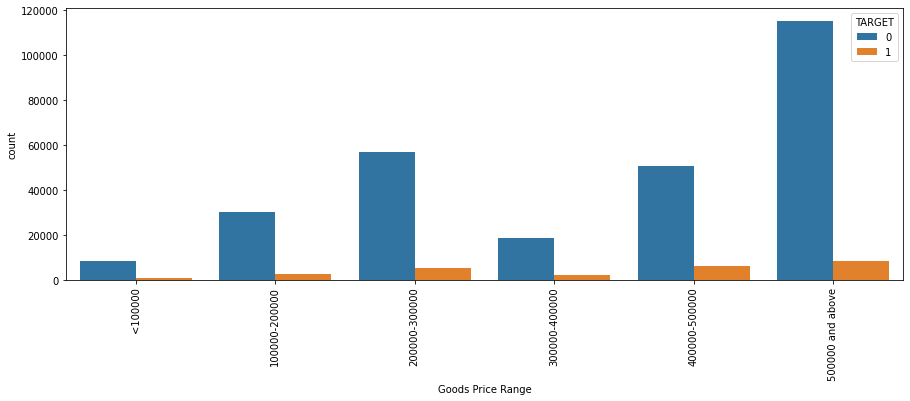

In [71]:
# Countplot for all categorical columns with respect to Target column
for i in app_cat_df.columns:
    plt.figure(figsize=(15,5))
    sns.countplot(app_cat_df[i], hue=app_cat_df['TARGET'])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

In [73]:
pd.set_option('display.max_rows', 500)

In [74]:
df.groupby(['TARGET','OCCUPATION_TYPE'])[['AMT_INCOME_TOTAL','AMT_CREDIT']].corr()


AMT_INCOME_TOTAL  AMT_CREDIT
TARGET OCCUPATION_TYPE                                                     
0      Accountants           AMT_INCOME_TOTAL          1.000000    0.362063
                             AMT_CREDIT                0.362063    1.000000
       Cleaning staff        AMT_INCOME_TOTAL          1.000000    0.369329
                             AMT_CREDIT                0.369329    1.000000
       Cooking staff         AMT_INCOME_TOTAL          1.000000    0.367767
                             AMT_CREDIT                0.367767    1.000000
       Core staff            AMT_INCOME_TOTAL          1.000000    0.354048
                             AMT_CREDIT                0.354048    1.000000
       Drivers               AMT_INCOME_TOTAL          1.000000    0.330674
                             AMT_CREDIT                0.330674    1.000000
       HR staff              AMT_INCOME_TOTAL          1.000000    0.353569
                             AMT_CREDIT                0.353569    1.000000
       High skill tech staff AMT_INCOME_TOTAL          1.000000    0.359971
                             AMT_CREDIT                0.359971    1.000000
       IT staff              AMT_INCOME_TOTAL          1.000000    0.323226
                             AMT_CREDIT                0.323226    1.000000
       Laborers              AMT_INCOME_TOTAL          1.000000    0.311138
                             AMT_CREDIT                0.311138    1.000000
       Low-skill Laborers    AMT_INCOME_TOTAL          1.000000    0.349820
                             AMT_CREDIT                0.349820    1.000000
       Managers              AMT_INCOME_TOTAL          1.000000    0.291503
                             AMT_CREDIT                0.291503    1.000000
       Medicine staff        AMT_INCOME_TOTAL          1.000000    0.385211
                             AMT_CREDIT                0.385211    1.000000
       Private service staff AMT_INCOME_TOTAL          1.000000    0.417749
                             AMT_CREDIT                0.417749    1.000000
       Realty agents         AMT_INCOME_TOTAL          1.000000    0.329464
                             AMT_CREDIT                0.329464    1.000000
       Sales staff           AMT_INCOME_TOTAL          1.000000    0.367802
                             AMT_CREDIT                0.367802    1.000000
       Secretaries           AMT_INCOME_TOTAL          1.000000    0.252543
                             AMT_CREDIT                0.252543    1.000000
       Security staff        AMT_INCOME_TOTAL          1.000000    0.366790
                             AMT_CREDIT                0.366790    1.000000
       Waiters/barmen staff  AMT_INCOME_TOTAL          1.000000    0.357877
                             AMT_CREDIT                0.357877    1.000000
       not known             AMT_INCOME_TOTAL          1.000000    0.315353
                             AMT_CREDIT                0.315353    1.000000
1      Accountants           AMT_INCOME_TOTAL          1.000000    0.371983
                             AMT_CREDIT                0.371983    1.000000
       Cleaning staff        AMT_INCOME_TOTAL          1.000000    0.247906
                             AMT_CREDIT                0.247906    1.000000
       Cooking staff         AMT_INCOME_TOTAL          1.000000    0.258544
                             AMT_CREDIT                0.258544    1.000000
       Core staff            AMT_INCOME_TOTAL          1.000000    0.275689
                             AMT_CREDIT                0.275689    1.000000
       Drivers               AMT_INCOME_TOTAL          1.000000    0.302697
                             AMT_CREDIT                0.302697    1.000000
       HR staff              AMT_INCOME_TOTAL          1.000000    0.605135
                             AMT_CREDIT                0.605135    1.000000
       High skill tech staff AMT_INCOME_TOTAL          1.000000    0.343256
                   

## Observations from Application categorical data countplot 
* Cash loans disbursed more than revolving loans
* Occupation Type - not known is the highest category out of all
* Occupation Type - Laborers, Sales staff, core staff and drivers are high loan repay defaulters.
* Overall more female taken loan than male and ratio of all other cases and client with payment difficulties seems more for male than female
* Most of the clients dont own a car
* Income Type - Working and commercial associate availed loans than any other category
* Secondary education applicants were greater than any other category of education type
* Most of the applicants were married 
* Most of the applicants live in a house or apartment 
* Two or less family members were dominat for the applicants
* Business and other organization applicants are more.


## Categorical vs. Numerical Data Analysis

### From numerical to numerical and categorical univariate analysis, some of the below columns found highly correlated or provided insights.

In [75]:
# created two lists one with numerical and other with categorical columns
# Using groupby pandas function and aggregate to see any fidings
critical_num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_EMPLOYED']
critical_cat_cols = ['TARGET','CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','ORGANIZATION_TYPE', 'OCCUPATION_TYPE']
for i in critical_cat_cols:
    for j in critical_num_cols:
        print(df.groupby(i)[j].mean())

TARGET
0    168919.474745
1    165758.628512
Name: AMT_INCOME_TOTAL, dtype: float64
TARGET
0    603180.969916
1    558468.214355
Name: AMT_CREDIT, dtype: float64
TARGET
0    27200.664249
1    26530.360319
Name: AMT_ANNUITY, dtype: float64
TARGET
0    542828.142575
1    489331.760814
Name: AMT_GOODS_PRICE, dtype: float64
TARGET
0    69701.545501
1    45529.480723
Name: DAYS_EMPLOYED, dtype: float64
CODE_GENDER
F    155985.541820
M    193092.706349
Name: AMT_INCOME_TOTAL, dtype: float64
CODE_GENDER
F    593588.645646
M    611064.070325
Name: AMT_CREDIT, dtype: float64
CODE_GENDER
F    26350.982031
M    28679.014984
Name: AMT_ANNUITY, dtype: float64
CODE_GENDER
F    532779.813970
M    549507.502081
Name: AMT_GOODS_PRICE, dtype: float64
CODE_GENDER
F    83716.396706
M    36965.385372
Name: DAYS_EMPLOYED, dtype: float64
NAME_INCOME_TYPE
Businessman             652500.000000
Commercial associate    202646.897801
Maternity leave         140400.000000
Pensioner               136207.739061
Stat

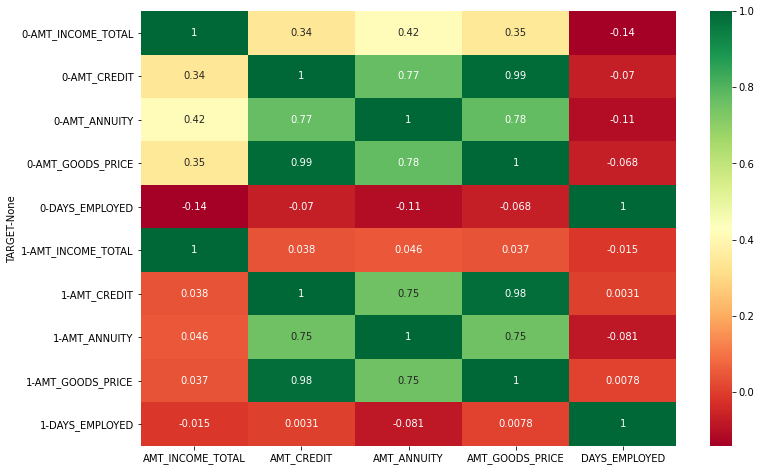

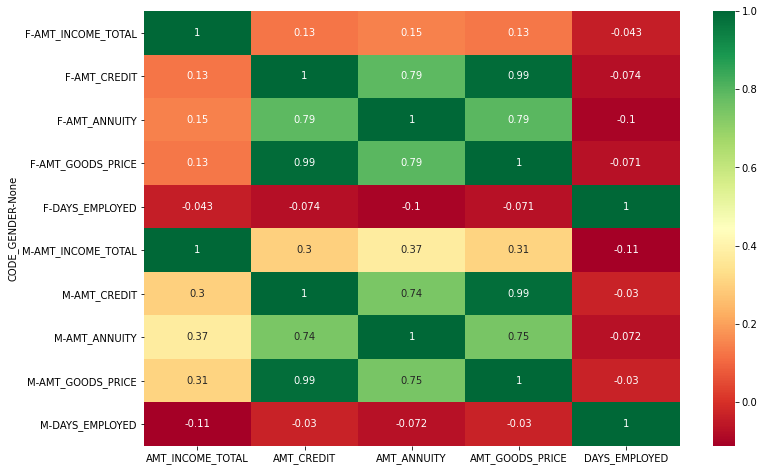

In [76]:
# Heatmap plot with respect to each categorical column to identified critical numerical columns

critical_cat_cols = ['TARGET','CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE']
for i in critical_cat_cols[:2]:
    plt.figure(figsize=(12,8))
    ax = sns.heatmap(df.groupby(i)[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_EMPLOYED']].corr(), annot=True, cmap='RdYlGn')
    plt.show()

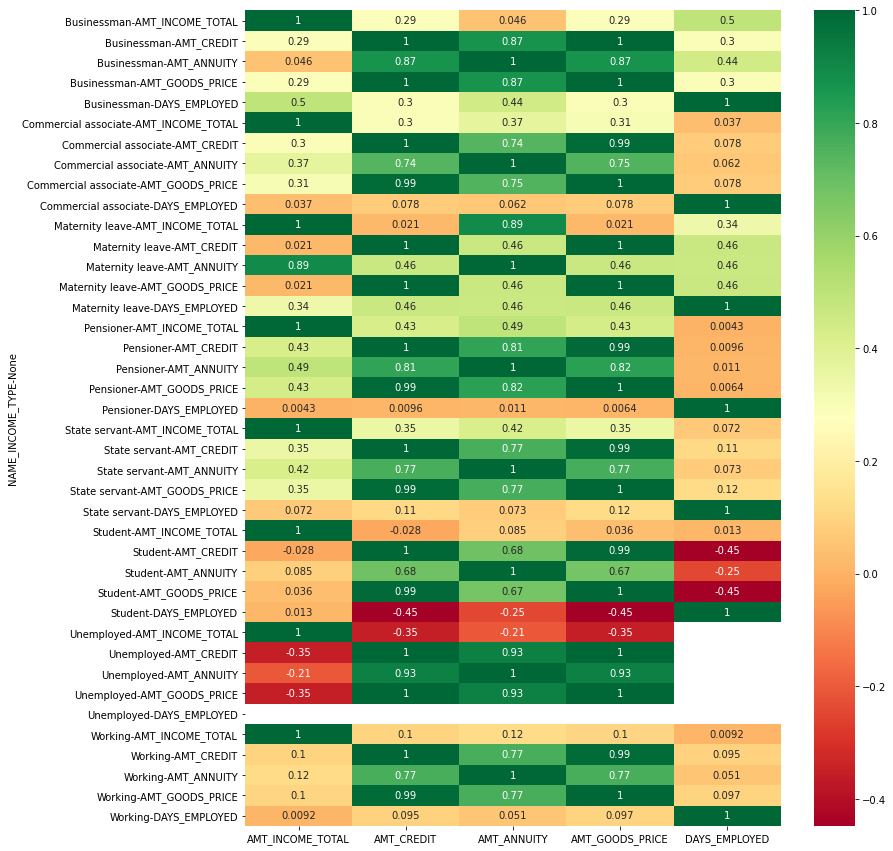

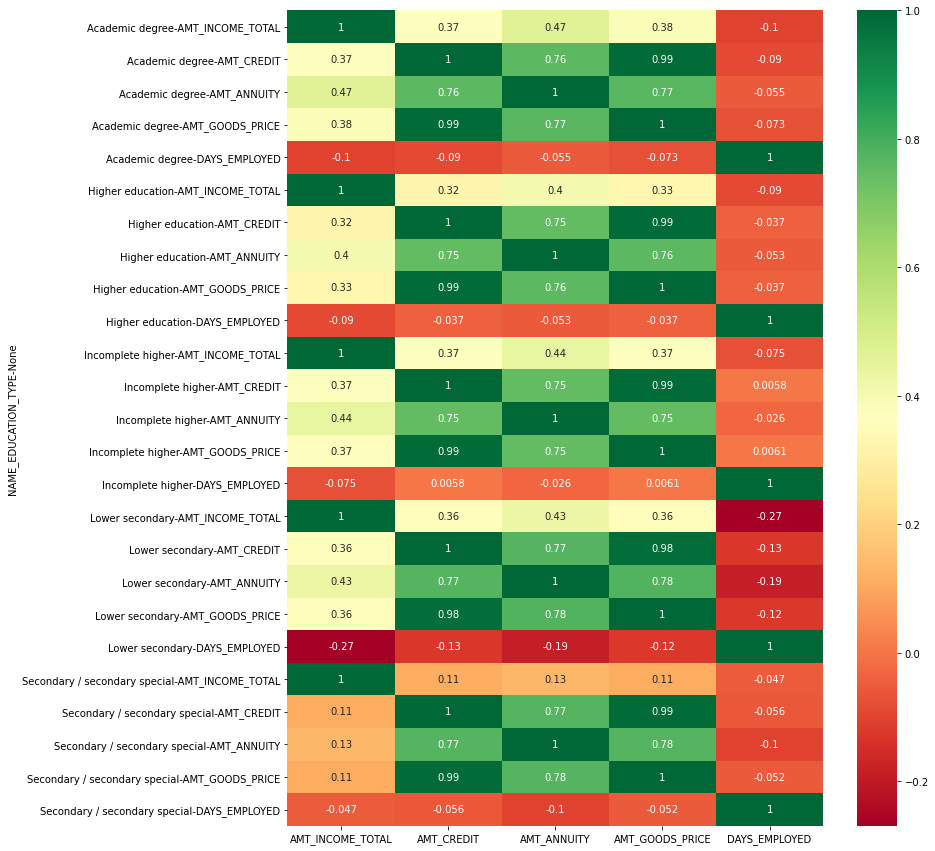

In [77]:
# Heatmap plot with respect to each categorical column to identified critical numerical columns
critical_cat_cols = ['TARGET','CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE']
for i in critical_cat_cols[2:4]:
    plt.figure(figsize=(12,15))
    ax = sns.heatmap(df.groupby(i)[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_EMPLOYED']].corr(), annot=True, cmap='RdYlGn')
    plt.show()

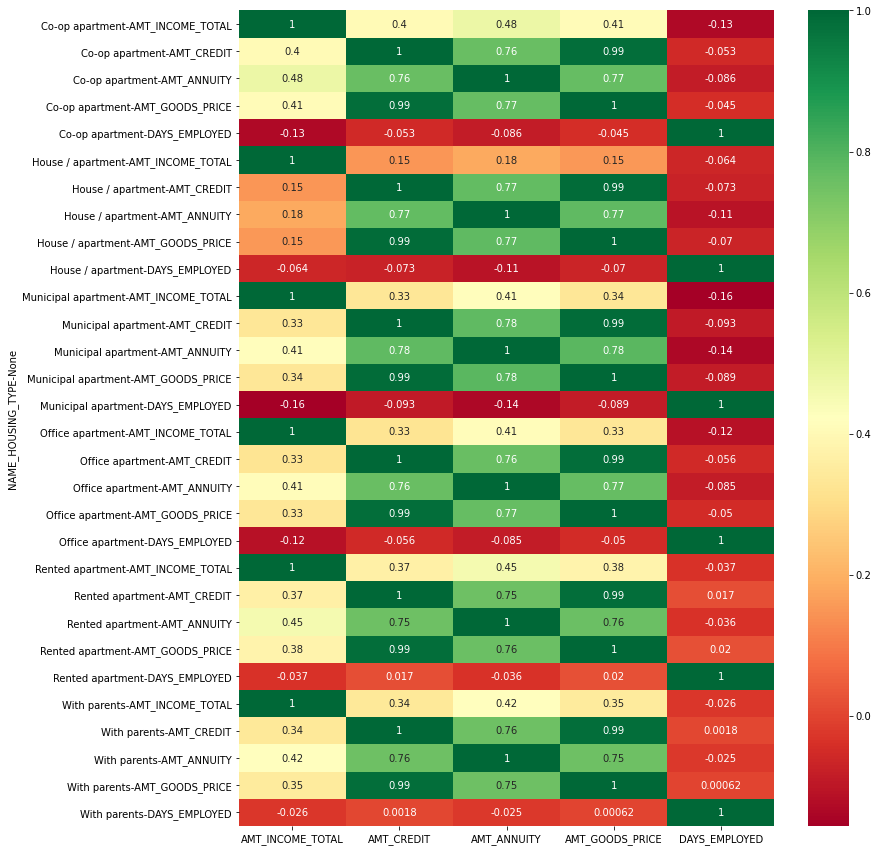

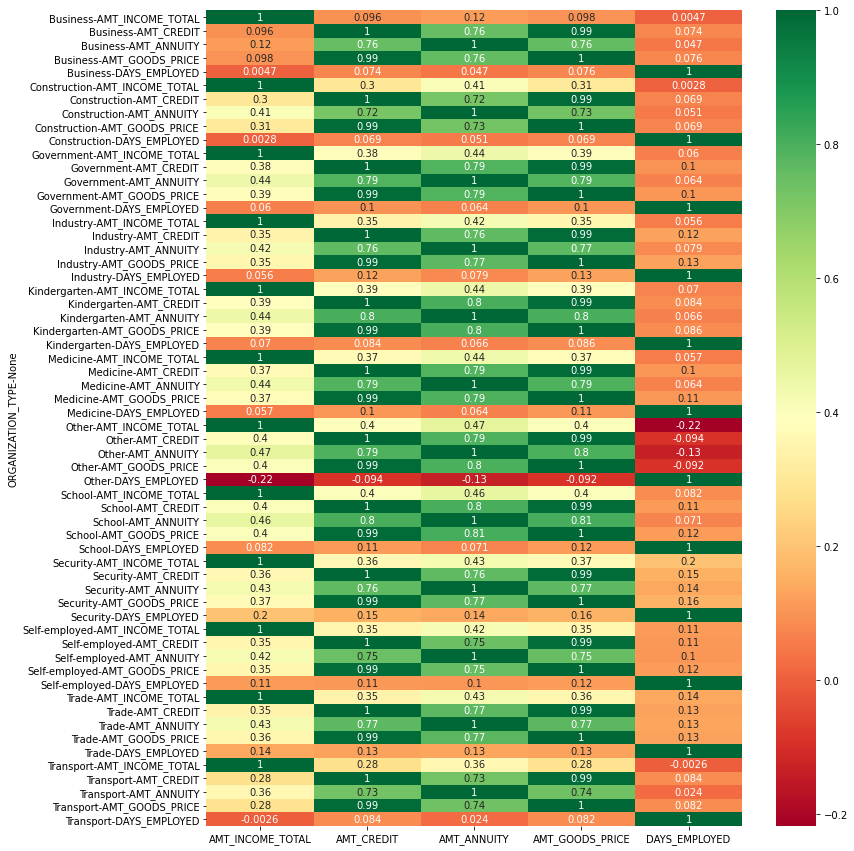

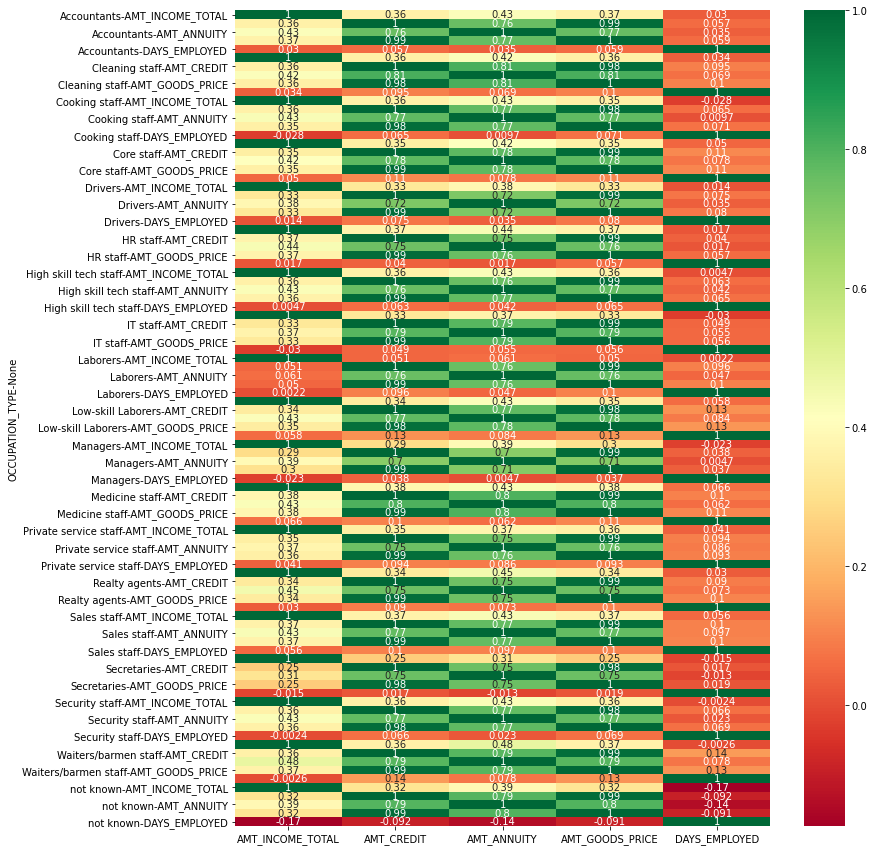

In [78]:
# Heatmap plot with respect to each categorical column to identified critical numerical columns
critical_cat_cols = ['TARGET','CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE']
for i in critical_cat_cols[4:]:
    plt.figure(figsize=(12,15))
    ax = sns.heatmap(df.groupby(i)[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_EMPLOYED']].corr(), annot=True, cmap='RdYlGn')
    plt.show()

In [79]:
df.groupby(['TARGET','NAME_INCOME_TYPE' ])[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_EMPLOYED']].corr()

AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET NAME_INCOME_TYPE                                                      
0      Businessman          AMT_INCOME_TOTAL          1.000000    0.291452   
                            AMT_CREDIT                0.291452    1.000000   
                            AMT_ANNUITY               0.046381    0.868947   
                            AMT_GOODS_PRICE           0.291452    1.000000   
                            DAYS_EMPLOYED             0.495360    0.297361   
       Commercial associate AMT_INCOME_TOTAL          1.000000    0.294884   
                            AMT_CREDIT                0.294884    1.000000   
                            AMT_ANNUITY               0.370885    0.741966   
                            AMT_GOODS_PRICE           0.304031    0.987150   
                            DAYS_EMPLOYED             0.034757    0.074002   
       Maternity leave      AMT_INCOME_TOTAL          1.000000    0.562564   
                            AMT_CREDIT                0.562564    1.000000   
                            AMT_ANNUITY               0.966156    0.756793   
                            AMT_GOODS_PRICE           0.562564    1.000000   
                            DAYS_EMPLOYED             0.962471    0.317084   
       Pensioner            AMT_INCOME_TOTAL          1.000000    0.430173   
                            AMT_CREDIT                0.430173    1.000000   
                            AMT_ANNUITY               0.496256    0.811343   
                            AMT_GOODS_PRICE           0.434910    0.989564   
                            DAYS_EMPLOYED             0.004371    0.009815   
       State servant        AMT_INCOME_TOTAL          1.000000    0.353557   
                            AMT_CREDIT                0.353557    1.000000   
                            AMT_ANNUITY               0.430234    0.766313   
                            AMT_GOODS_PRICE           0.355287    0.987897   
                            DAYS_EMPLOYED             0.072163    0.111213   
       Student              AMT_INCOME_TOTAL          1.000000   -0.027787   
                            AMT_CREDIT               -0.027787    1.000000   
                            AMT_ANNUITY               0.085327    0.684011   
                            AMT_GOODS_PRICE           0.035984    0.993255   
                            DAYS_EMPLOYED             0.013495   -0.447865   
       Unemployed           AMT_INCOME_TOTAL          1.000000   -0.496502   
                            AMT_CREDIT               -0.496502    1.000000   
                            AMT_ANNUITY              -0.323343    0.932513   
                            AMT_GOODS_PRICE          -0.496502    1.000000   
                            DAYS_EMPLOYED                  NaN         NaN   
       Working              AMT_INCOME_TOTAL          1.000000    0.332813   
                            AMT_CREDIT                0.332813    1.000000   
                            AMT_ANNUITY               0.404888    0.767675   
                            AMT_GOODS_PRICE           0.339490    0.985977   
                            DAYS_EMPLOYED             0.033965    0.091215   
1      Commercial associate AMT_INCOME_TOTAL          1.000000    0.333686   
                            AMT_CREDIT                0.333686    1.000000   
                            AMT_ANNUITY               0.385449    0.743599   
                            AMT_GOODS_PRICE           0.338012    0.984381   
                            DAYS_EMPLOYED             0.049522    0.095893   
       Maternity leave      AMT_INCOME_TOTAL          1.000000    1.000000   
                            AMT_CREDIT                1.000000    1.000000   
                            AMT_ANNUITY               1.000000    1.000000   
                            AMT_GOODS_PRICE           1.000000    1.000000   
                            DAYS_EMPLOYED             1.000000    1.

In [80]:
df.groupby(['TARGET','NAME_EDUCATION_TYPE' ])[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_EMPLOYED']].corr()

AMT_INCOME_TOTAL  \
TARGET NAME_EDUCATION_TYPE                                                
0      Academic degree               AMT_INCOME_TOTAL          1.000000   
                                     AMT_CREDIT                0.374017   
                                     AMT_ANNUITY               0.469823   
                                     AMT_GOODS_PRICE           0.387820   
                                     DAYS_EMPLOYED            -0.099132   
       Higher education              AMT_INCOME_TOTAL          1.000000   
                                     AMT_CREDIT                0.321726   
                                     AMT_ANNUITY               0.404680   
                                     AMT_GOODS_PRICE           0.329383   
                                     DAYS_EMPLOYED            -0.090844   
       Incomplete higher             AMT_INCOME_TOTAL          1.000000   
                                     AMT_CREDIT                0.358908   
                                     AMT_ANNUITY               0.433583   
                                     AMT_GOODS_PRICE           0.360063   
                                     DAYS_EMPLOYED            -0.074829   
       Lower secondary               AMT_INCOME_TOTAL          1.000000   
                                     AMT_CREDIT                0.361552   
                                     AMT_ANNUITY               0.426041   
                                     AMT_GOODS_PRICE           0.363347   
                                     DAYS_EMPLOYED            -0.275530   
       Secondary / secondary special AMT_INCOME_TOTAL          1.000000   
                                     AMT_CREDIT                0.330149   
                                     AMT_ANNUITY               0.398472   
                                     AMT_GOODS_PRICE           0.331789   
                                     DAYS_EMPLOYED            -0.138497   
1      Academic degree               AMT_INCOME_TOTAL          1.000000   
                                     AMT_CREDIT               -0.999992   
                                     AMT_ANNUITY              -0.422635   
                                     AMT_GOODS_PRICE          -0.999986   
                                     DAYS_EMPLOYED             0.485821   
       Higher education              AMT_INCOME_TOTAL          1.000000   
                                     AMT_CREDIT                0.295543   
                                     AMT_ANNUITY               0.359095   
                                     AMT_GOODS_PRICE           0.299309   
                                     DAYS_EMPLOYED            -0.076188   
       Incomplete higher             AMT_INCOME_TOTAL          1.000000   
                                     AMT_CREDIT                0.470268   
                                     AMT_ANNUITY               0.495316   
                                     AMT_GOODS_PRICE           0.470670   
                                     DAYS_EMPLOYED            -0.087958   
       Lower secondary               AMT_INCOME_TOTAL          1.000000   
                                     AMT_CREDIT                0.316255   
                                     AMT_ANNUITY               0.426175   
                                     AMT_GOODS_PRICE           0.319769   
                                     DAYS_EMPLOYED            -0.226676   
       Secondary / secondary special AMT_INCOME_TOTAL          1.000000   
                                     AMT_CREDIT                0.028632   
                                     AMT_ANNUITY               0.035857   
                                     AMT_GOODS_PRICE           0.027627   
                                     DAYS_EMPLOYED            -0.012359   

                                                       AMT_CREDIT  \
TARGET NAME_EDUCATION_TYPE                                          
0      Academic 

In [81]:
df.groupby(['TARGET','NAME_HOUSING_TYPE' ])[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_EMPLOYED']].corr()

AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET NAME_HOUSING_TYPE                                                    
0      Co-op apartment     AMT_INCOME_TOTAL          1.000000    0.407317   
                           AMT_CREDIT                0.407317    1.000000   
                           AMT_ANNUITY               0.485784    0.762273   
                           AMT_GOODS_PRICE           0.413786    0.985951   
                           DAYS_EMPLOYED            -0.133670   -0.059166   
       House / apartment   AMT_INCOME_TOTAL          1.000000    0.341128   
                           AMT_CREDIT                0.341128    1.000000   
                           AMT_ANNUITY               0.416772    0.770710   
                           AMT_GOODS_PRICE           0.347560    0.987321   
                           DAYS_EMPLOYED            -0.146762   -0.078416   
       Municipal apartment AMT_INCOME_TOTAL          1.000000    0.337280   
                           AMT_CREDIT                0.337280    1.000000   
                           AMT_ANNUITY               0.419723    0.777472   
                           AMT_GOODS_PRICE           0.341580    0.986811   
                           DAYS_EMPLOYED            -0.159902   -0.096852   
       Office apartment    AMT_INCOME_TOTAL          1.000000    0.318943   
                           AMT_CREDIT                0.318943    1.000000   
                           AMT_ANNUITY               0.404470    0.763070   
                           AMT_GOODS_PRICE           0.326644    0.986388   
                           DAYS_EMPLOYED            -0.114309   -0.061039   
       Rented apartment    AMT_INCOME_TOTAL          1.000000    0.368057   
                           AMT_CREDIT                0.368057    1.000000   
                           AMT_ANNUITY               0.458915    0.754133   
                           AMT_GOODS_PRICE           0.378464    0.986301   
                           DAYS_EMPLOYED            -0.035686    0.017299   
       With parents        AMT_INCOME_TOTAL          1.000000    0.339626   
                           AMT_CREDIT                0.339626    1.000000   
                           AMT_ANNUITY               0.420491    0.758252   
                           AMT_GOODS_PRICE           0.348314    0.986303   
                           DAYS_EMPLOYED            -0.026514   -0.000101   
1      Co-op apartment     AMT_INCOME_TOTAL          1.000000    0.369047   
                           AMT_CREDIT                0.369047    1.000000   
                           AMT_ANNUITY               0.366368    0.755495   
                           AMT_GOODS_PRICE           0.342452    0.985958   
                           DAYS_EMPLOYED            -0.103962    0.023386   
       House / apartment   AMT_INCOME_TOTAL          1.000000    0.035482   
                           AMT_CREDIT                0.035482    1.000000   
                           AMT_ANNUITY               0.043479    0.752511   
                           AMT_GOODS_PRICE           0.034843    0.983251   
                           DAYS_EMPLOYED            -0.015231   -0.002816   
       Municipal apartment AMT_INCOME_TOTAL          1.000000    0.234730   
                           AMT_CREDIT                0.234730    1.000000   
                           AMT_ANNUITY               0.316967    0.741225   
                           AMT_GOODS_PRICE           0.227168    0.981311   
                           DAYS_EMPLOYED            -0.124420   -0.053974   
       Office apartment    AMT_INCOME_TOTAL          1.000000    0.497531   
                           AMT_CREDIT                0.497531    1.000000   
                           AMT_ANNUITY               0.554106    0.783857   
                           AMT_GOODS_PRICE           0.493980    0.985127   
                           DAYS_EMPLOYED            -0.158013    0.021778   
       Rented apartment    AMT_INCOME_TOT

In [82]:
df.groupby(['TARGET','OCCUPATION_TYPE' ])[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_EMPLOYED']].corr()

AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET OCCUPATION_TYPE                                                        
0      Accountants           AMT_INCOME_TOTAL          1.000000    0.362063   
                             AMT_CREDIT                0.362063    1.000000   
                             AMT_ANNUITY               0.425517    0.760827   
                             AMT_GOODS_PRICE           0.366143    0.988142   
                             DAYS_EMPLOYED             0.028833    0.053809   
       Cleaning staff        AMT_INCOME_TOTAL          1.000000    0.369329   
                             AMT_CREDIT                0.369329    1.000000   
                             AMT_ANNUITY               0.430433    0.809307   
                             AMT_GOODS_PRICE           0.368055    0.983255   
                             DAYS_EMPLOYED             0.034489    0.089169   
       Cooking staff         AMT_INCOME_TOTAL          1.000000    0.367767   
                             AMT_CREDIT                0.367767    1.000000   
                             AMT_ANNUITY               0.436964    0.771988   
                             AMT_GOODS_PRICE           0.363700    0.984616   
                             DAYS_EMPLOYED            -0.033241    0.061303   
       Core staff            AMT_INCOME_TOTAL          1.000000    0.354048   
                             AMT_CREDIT                0.354048    1.000000   
                             AMT_ANNUITY               0.419219    0.778448   
                             AMT_GOODS_PRICE           0.357713    0.987370   
                             DAYS_EMPLOYED             0.049805    0.106431   
       Drivers               AMT_INCOME_TOTAL          1.000000    0.330674   
                             AMT_CREDIT                0.330674    1.000000   
                             AMT_ANNUITY               0.388226    0.723712   
                             AMT_GOODS_PRICE           0.331239    0.985809   
                             DAYS_EMPLOYED             0.010694    0.069804   
       HR staff              AMT_INCOME_TOTAL          1.000000    0.353569   
                             AMT_CREDIT                0.353569    1.000000   
                             AMT_ANNUITY               0.425055    0.741492   
                             AMT_GOODS_PRICE           0.355775    0.987867   
                             DAYS_EMPLOYED             0.025555    0.049477   
       High skill tech staff AMT_INCOME_TOTAL          1.000000    0.359971   
                             AMT_CREDIT                0.359971    1.000000   
                             AMT_ANNUITY               0.431082    0.760708   
                             AMT_GOODS_PRICE           0.365589    0.987415   
                             DAYS_EMPLOYED             0.003336    0.061087   
       IT staff              AMT_INCOME_TOTAL          1.000000    0.323226   
                             AMT_CREDIT                0.323226    1.000000   
                             AMT_ANNUITY               0.368132    0.790524   
                             AMT_GOODS_PRICE           0.329807    0.989507   
                             DAYS_EMPLOYED            -0.033133    0.053185   
       Laborers              AMT_INCOME_TOTAL          1.000000    0.311138   
                             AMT_CREDIT                0.311138    1.000000   
                             AMT_ANNUITY               0.376670    0.763340   
                             AMT_GOODS_PRICE           0.312335    0.985589   
                             DAYS_EMPLOYED             0.026987    0.093335   
       Low-skill Laborers    AMT_INCOME_TOTAL          1.000000    0.349820   
                             AMT_CREDIT                0.349820    1.000000   
                             AMT_ANNUITY               0.432133    0.771350   
                             AMT_GOODS_PRICE           0.350570    0.981400   
                  

In [83]:
df.groupby(['TARGET','OCCUPATION_TYPE'])[['AMT_INCOME_TOTAL','AMT_CREDIT']].corr()

AMT_INCOME_TOTAL  AMT_CREDIT
TARGET OCCUPATION_TYPE                                                     
0      Accountants           AMT_INCOME_TOTAL          1.000000    0.362063
                             AMT_CREDIT                0.362063    1.000000
       Cleaning staff        AMT_INCOME_TOTAL          1.000000    0.369329
                             AMT_CREDIT                0.369329    1.000000
       Cooking staff         AMT_INCOME_TOTAL          1.000000    0.367767
                             AMT_CREDIT                0.367767    1.000000
       Core staff            AMT_INCOME_TOTAL          1.000000    0.354048
                             AMT_CREDIT                0.354048    1.000000
       Drivers               AMT_INCOME_TOTAL          1.000000    0.330674
                             AMT_CREDIT                0.330674    1.000000
       HR staff              AMT_INCOME_TOTAL          1.000000    0.353569
                             AMT_CREDIT                0.353569    1.000000
       High skill tech staff AMT_INCOME_TOTAL          1.000000    0.359971
                             AMT_CREDIT                0.359971    1.000000
       IT staff              AMT_INCOME_TOTAL          1.000000    0.323226
                             AMT_CREDIT                0.323226    1.000000
       Laborers              AMT_INCOME_TOTAL          1.000000    0.311138
                             AMT_CREDIT                0.311138    1.000000
       Low-skill Laborers    AMT_INCOME_TOTAL          1.000000    0.349820
                             AMT_CREDIT                0.349820    1.000000
       Managers              AMT_INCOME_TOTAL          1.000000    0.291503
                             AMT_CREDIT                0.291503    1.000000
       Medicine staff        AMT_INCOME_TOTAL          1.000000    0.385211
                             AMT_CREDIT                0.385211    1.000000
       Private service staff AMT_INCOME_TOTAL          1.000000    0.417749
                             AMT_CREDIT                0.417749    1.000000
       Realty agents         AMT_INCOME_TOTAL          1.000000    0.329464
                             AMT_CREDIT                0.329464    1.000000
       Sales staff           AMT_INCOME_TOTAL          1.000000    0.367802
                             AMT_CREDIT                0.367802    1.000000
       Secretaries           AMT_INCOME_TOTAL          1.000000    0.252543
                             AMT_CREDIT                0.252543    1.000000
       Security staff        AMT_INCOME_TOTAL          1.000000    0.366790
                             AMT_CREDIT                0.366790    1.000000
       Waiters/barmen staff  AMT_INCOME_TOTAL          1.000000    0.357877
                             AMT_CREDIT                0.357877    1.000000
       not known             AMT_INCOME_TOTAL          1.000000    0.315353
                             AMT_CREDIT                0.315353    1.000000
1      Accountants           AMT_INCOME_TOTAL          1.000000    0.371983
                             AMT_CREDIT                0.371983    1.000000
       Cleaning staff        AMT_INCOME_TOTAL          1.000000    0.247906
                             AMT_CREDIT                0.247906    1.000000
       Cooking staff         AMT_INCOME_TOTAL          1.000000    0.258544
                             AMT_CREDIT                0.258544    1.000000
       Core staff            AMT_INCOME_TOTAL          1.000000    0.275689
                             AMT_CREDIT                0.275689    1.000000
       Drivers               AMT_INCOME_TOTAL          1.000000    0.302697
                             AMT_CREDIT                0.302697    1.000000
       HR staff              AMT_INCOME_TOTAL          1.000000    0.605135
                             AMT_CREDIT                0.605135    1.000000
       High skill tech staff AMT_INCOME_TOTAL          1.000000    0.343256
                   

## Summary - Correlation data (Categorical vs Numerical)
* Clients with less median total income are more likely to default
* Clients with high Credit amount are less likely to have payment difficulty or default
* Clients with greater birth days are less likely to default
* Clients with amount annuity greater than 25000 are less likely to default
* People with house or apartment tend to take more loans
* Married tend to take more Loan as compared to other categories
* Secondary/special educated people are applying loans in high in number
* Occupation type (Laborers) who are loan repay defaulters have very less Amount Income and Amount Credit correlation (less than 2%) and Laborers who are not non-defaulters have better Amount income and Amount credit correlation (31%).

## Pre Processed application data set


In [84]:
app_num_df.head()

SK_ID_CURR  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      100002          202500.0    406597.5      24700.5         351000.0   
1      100003          270000.0   1293502.5      35698.5        1129500.0   
2      100004           67500.0    135000.0       6750.0         135000.0   
3      100006          135000.0    312682.5      29686.5         297000.0   
4      100007          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0             2120      0.262949      0.139376                       2.0   
1              291      0.622246      0.510853                       1.0   
2             2531      0.555912      0.729567                       0.0   
3             2437      0.650442      0.510853                       2.0   
4             3458      0.322738      0.510853                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  
0                       2.0                  1134.0  
1                       1.0                   828.0  
2                       0.0                   815.0  
3                       2.0                   617.0  
4                       0.0                  1106.0

In [85]:
app_cat_df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      1         Cash loans           M            N               Y   
1      0         Cash loans           F            N               N   
2      0    Revolving loans           M            Y               Y   
3      0         Cash loans           F            N               Y   
4      0         Cash loans           M            N               Y   

  CNT_CHILDREN NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0            0   Unaccompanied          Working   
1            0          Family    State servant   
2            0   Unaccompanied          Working   
3            0   Unaccompanied          Working   
4            0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  ...  \
0  Secondary / secondary special  Single / not married  ...   
1               Higher education               Married  ...   
2  Secondary / secondary special  Single / not married  ...   
3  Secondary / secondary special        Civil marriage  ...   
4  Secondary / secondary special  Single / not married  ...   

  DEF_60_CNT_SOCIAL_CIRCLE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        0.0   
3                      0.0                        0.0   
4                      0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR   Income Range      Credit Range  \
0                        1.0  200000-300000     400000-500000   
1                        0.0  200000-300000  500000 and above   
2                        0.0        <100000     100000-200000   
3                        0.0  100000-200000     300000-400000   
4                        0.0  100000-200000  500000 and above   

  Goods Price Range  
0     300000-400000  
1  500000 and above  
2     100000-200000  
3     200000-300000  
4  500000 and above  

[5 rows x 35 columns]

In [86]:
# Preprocessed application data seti
df_app = pd.concat([app_num_df,app_cat_df],axis='columns')

In [87]:
df_app.head()

SK_ID_CURR  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      100002          202500.0    406597.5      24700.5         351000.0   
1      100003          270000.0   1293502.5      35698.5        1129500.0   
2      100004           67500.0    135000.0       6750.0         135000.0   
3      100006          135000.0    312682.5      29686.5         297000.0   
4      100007          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  ...  DEF_60_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0             2120  ...                       2.0                         0.0   
1              291  ...                       0.0                         0.0   
2             2531  ...                       0.0                         0.0   
3             2437  ...                       0.0                         0.0   
4             3458  ...                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR   Income Range      Credit Range  \
0                        1.0  200000-300000     400000-500000   
1                        0.0  200000-300000  500000 and above   
2                        0.0        <100000     100000-200000   
3                        0.0  100000-200000     300000-400000   
4                        0.0  100000-200000  500000 and above   

  Goods Price Range  
0     300000-400000  
1  500000 and above  
2     100000-200000  
3     200000-300000  
4  500000 and above  

[5 rows x 50 columns]

# Previous Application Data Analysis

In [88]:
prev_app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [89]:
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [90]:
100*prev_app_data.isnull().mean()

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [91]:
cut_off = 50
cols_to_drop = list(prev_app_data.columns[100*prev_app_data.isnull().mean() > cut_off])

In [92]:
cols_to_drop

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED']

In [93]:
prev_app_data = prev_app_data.drop(cols_to_drop, axis=1)

In [94]:
prev_app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  \
0                       15                           Y  ...   
1                       11                           Y  ...   
2                       11                           Y  ...   
3                        7                           Y  ...   
4                        9                           Y  ...   

   NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0          Connectivity        12.0           middle   
1                   XNA        36.0       low_action   
2                   XNA        12.0             high   
3                   XNA        12.0           middle   
4                   XNA        24.0             high   

        PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0  POS mobile with interest           365243.0          -42.0   
1          Cash X-Sell: low           365243.0         -134.0   
2         Cash X-Sell: high           365243.0         -271.0   
3       Cash X-Sell: middle           365243.0         -482.0   
4         Cash Street: high                NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION  \
0                     300.0         -42.0            -37.0   
1                     916.0      365243.0         365243.0   
2                      59.0      365243.0         365243.0   
3                    -152.0        -182.0           -177.0   
4                       NaN           NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 33 columns]

In [95]:
# Automation of segmentation
prev_cat_cols = []
prev_num_cols = []

for i in prev_app_data.columns:
    if prev_app_data[i].nunique() > 30:
        prev_num_cols.append(i)
    else:
        prev_cat_cols.append(i)

In [96]:
print(prev_cat_cols)

['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [97]:
print(prev_num_cols)

['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']


In [98]:
prev_app_data[prev_num_cols]

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0           2030495      271877     1730.430          17145.0     17145.0   
1           2802425      108129    25188.615         607500.0    679671.0   
2           2523466      122040    15060.735         112500.0    136444.5   
3           2819243      176158    47041.335         450000.0    470790.0   
4           1784265      202054    31924.395         337500.0    404055.0   
...             ...         ...          ...              ...         ...   
1670209     2300464      352015    14704.290         267295.5    311400.0   
1670210     2357031      334635     6622.020          87750.0     64291.5   
1670211     2659632      249544    11520.855         105237.0    102523.5   
1670212     2785582      400317    18821.520         180000.0    191880.0   
1670213     2418762      261212    16431.300         360000.0    360000.0   

         AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
0                17145.0            -73                35         12.0   
1               607500.0           -164                -1         36.0   
2               112500.0           -301                -1         12.0   
3               450000.0           -512                -1         12.0   
4               337500.0           -781                -1         24.0   
...                  ...            ...               ...          ...   
1670209         267295.5           -544                43         30.0   
1670210          87750.0          -1694                43         12.0   
1670211         105237.0          -1488              1370         10.0   
1670212         180000.0          -1185                -1         12.0   
1670213         360000.0          -1193                -1         48.0   

         DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
0                  365243.0           -42.0                      300.0   
1                  365243.0          -134.0                      916.0   
2                  365243.0          -271.0                       59.0   
3                  365243.0          -482.0                     -152.0   
4                       NaN             NaN                        NaN   
...                     ...             ...                        ...   
1670209            365243.0          -508.0                      362.0   
1670210            365243.0         -1604.0                    -1274.0   
1670211            365243.0         -1457.0                    -1187.0   
1670212            365243.0         -1155.0                     -825.0   
1670213            365243.0         -1163.0                      247.0   

         DAYS_LAST_DUE  DAYS_TERMINATION  
0                -42.0             -37.0  
1             365243.0          365243.0  
2             365243.0          365243.0  
3               -182.0            -177.0  
4                  NaN               NaN  
...                ...               ...  
1670209         -358.0            -351.0  
1670210        -1304.0           -1297.0  
1670211        -1187.0           -1181.0  
1670212         -825.0            -817.0  
1670213         -443.0            -423.0  

[1670214 rows x 14 columns]

In [99]:
prev_app_data[['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']] = prev_app_data[['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']].abs()

In [100]:
prev_app_num_data = prev_app_data[prev_num_cols]

In [101]:
for i in prev_app_num_data.columns:
    if prev_app_num_data[i].isnull().mean() > 0:
        med = prev_app_num_data[i].median()
        prev_app_num_data[i] = prev_app_num_data[i].fillna(med)

In [102]:
100*prev_app_num_data.isnull().mean()

SK_ID_PREV                   0.0
SK_ID_CURR                   0.0
AMT_ANNUITY                  0.0
AMT_APPLICATION              0.0
AMT_CREDIT                   0.0
AMT_GOODS_PRICE              0.0
DAYS_DECISION                0.0
SELLERPLACE_AREA             0.0
CNT_PAYMENT                  0.0
DAYS_FIRST_DRAWING           0.0
DAYS_FIRST_DUE               0.0
DAYS_LAST_DUE_1ST_VERSION    0.0
DAYS_LAST_DUE                0.0
DAYS_TERMINATION             0.0
dtype: float64

### Outliers
* Found outliers in many of the numerical data columns, Outliers were identified as many data points are fall out of max range in box plot.
* And it is evident that by calculating upper and lower bound values using IQR - Refer the below code.
* Not fixing the outliers as suggested in the problem statement hint in upgrad platform.

In [103]:
# calculating outliers using IQR
for i in prev_app_num_data.columns[2:]:
    q1 = prev_app_num_data[i].describe()['25%']
    q3 = prev_app_num_data[i].describe()['75%']

    iqr = q3-q1
    
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    print(i,"---", upper_bound,'and', lower_bound)

AMT_ANNUITY --- 30739.421250000007 and -6368.298750000004
AMT_APPLICATION --- 422820.0 and -223740.0
AMT_CREDIT --- 504805.5 and -264226.5
AMT_GOODS_PRICE --- 349762.5 and -101857.5
DAYS_DECISION --- 2830.0 and -1250.0
SELLERPLACE_AREA --- 206.5 and -125.5
CNT_PAYMENT --- 25.0 and 1.0
DAYS_FIRST_DRAWING --- 365243.0 and 365243.0
DAYS_FIRST_DUE --- 1702.0 and 182.0
DAYS_LAST_DUE_1ST_VERSION --- 1686.0 and -154.0
DAYS_LAST_DUE --- 2485.5 and -94.5
DAYS_TERMINATION --- 2546.0 and -126.0


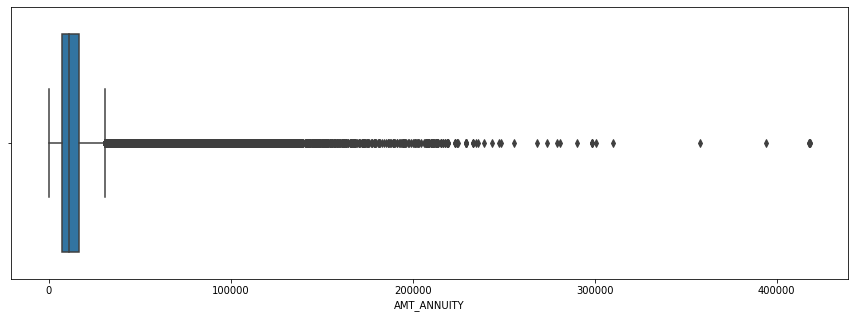

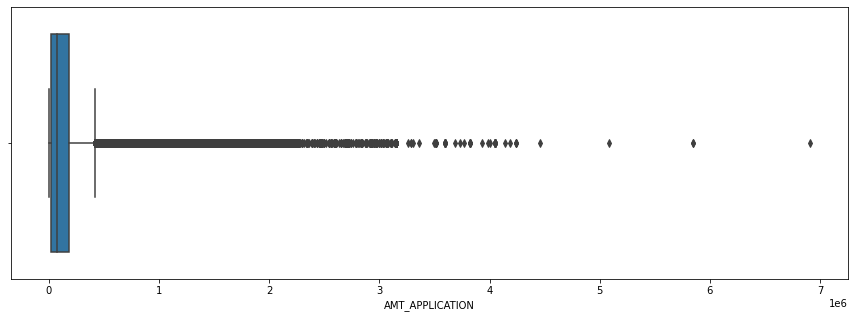

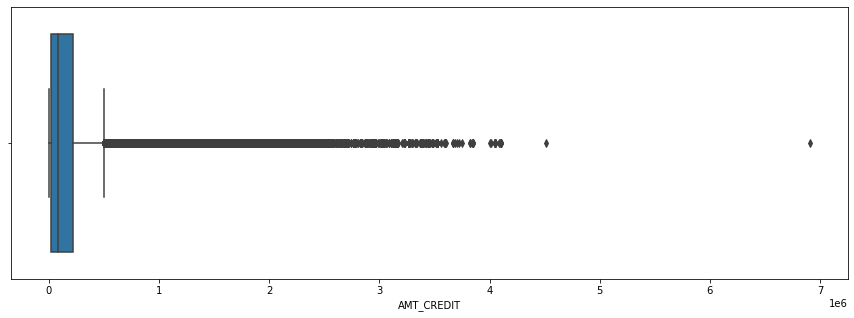

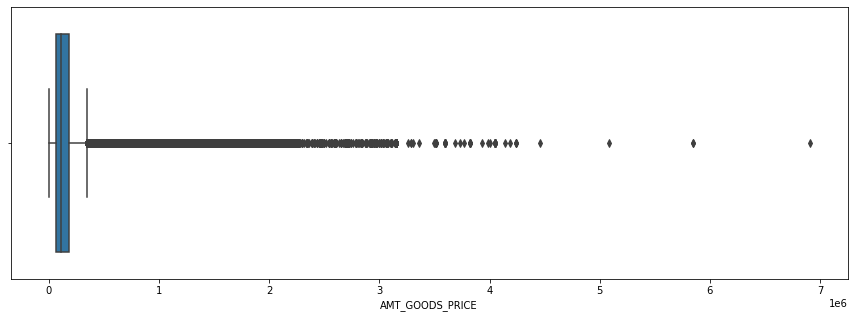

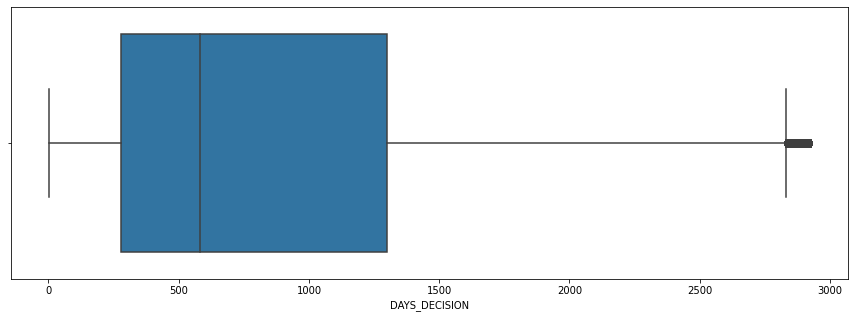

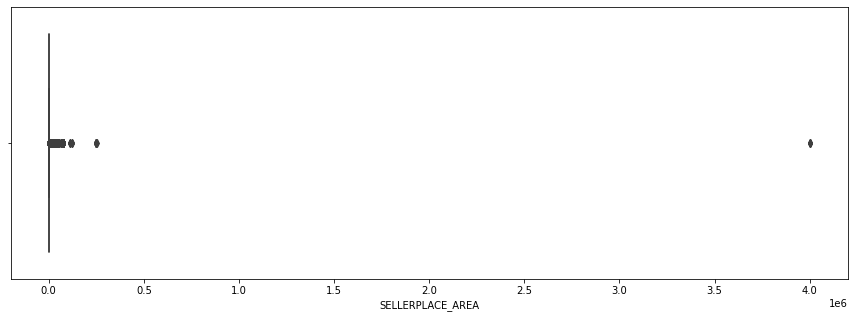

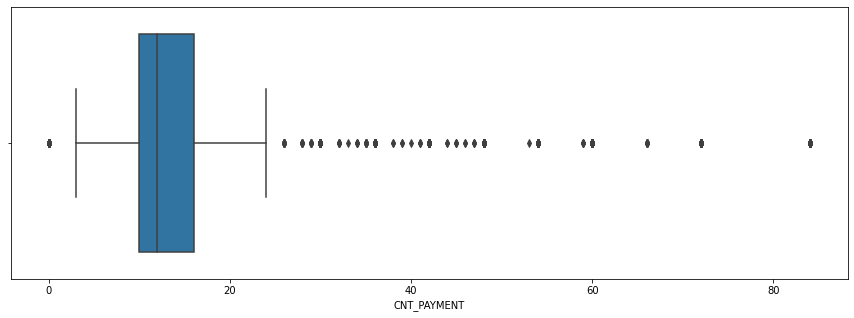

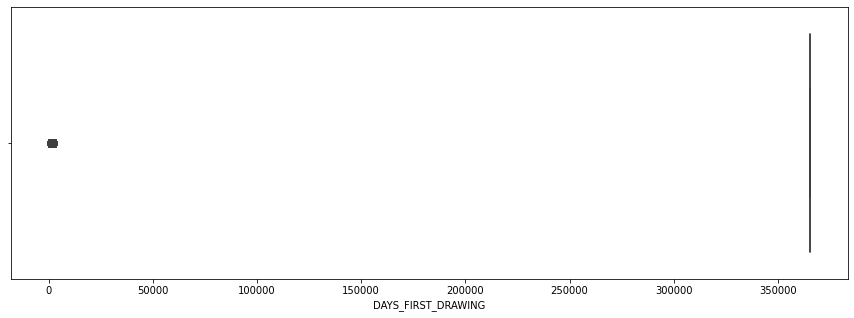

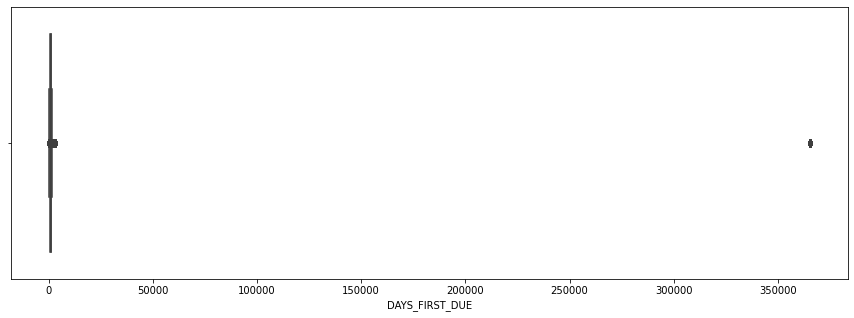

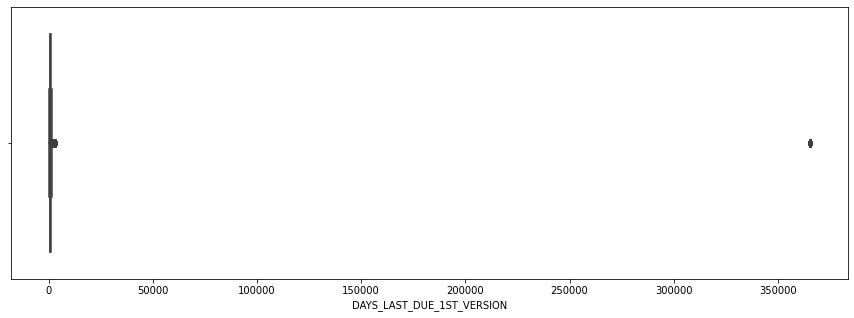

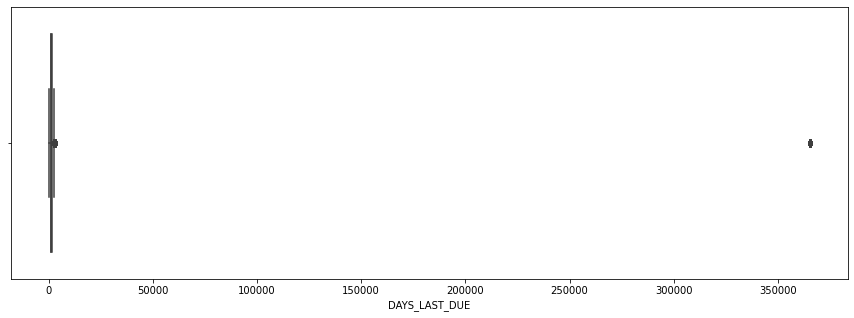

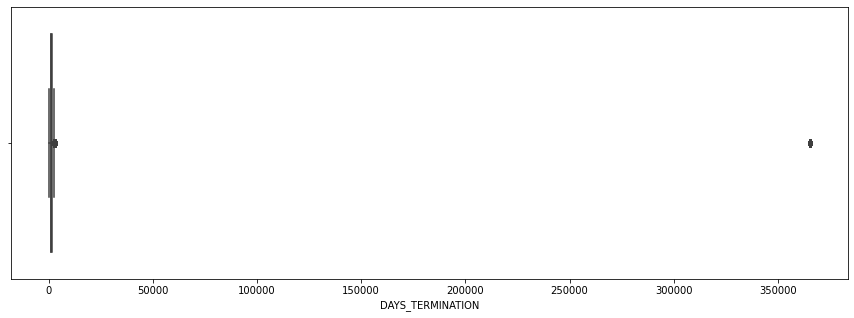

In [104]:
# Boxplot to check distribution
for i in prev_app_num_data.columns[2:]:
    plt.figure(figsize=(15,5))
    sns.boxplot(x=prev_app_num_data[i])
    plt.show()

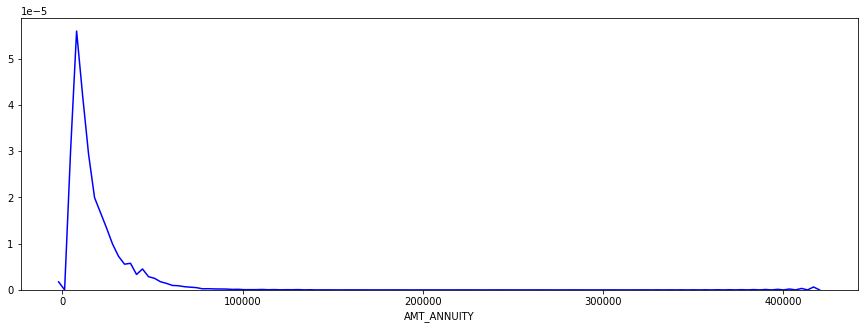

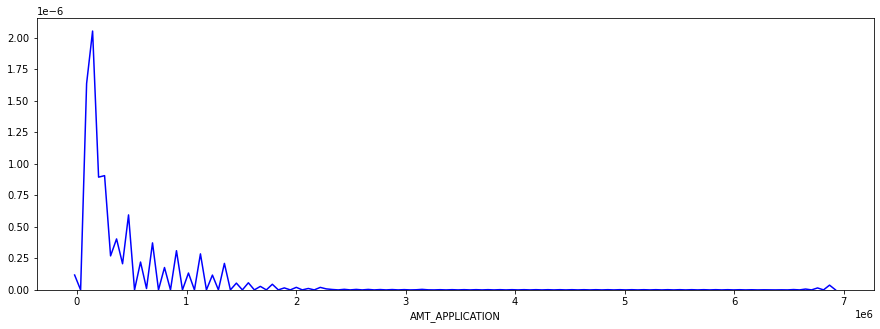

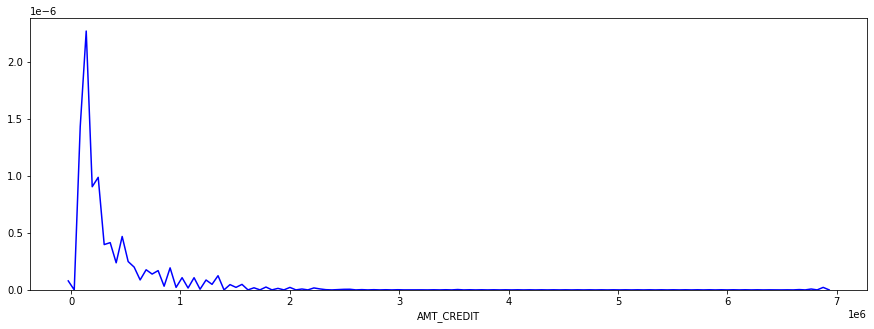

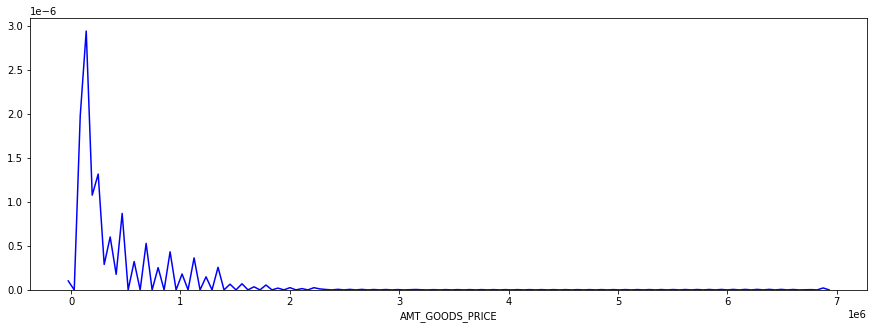

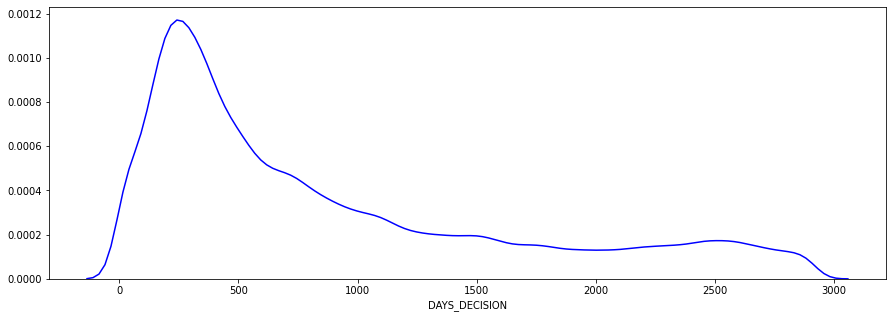

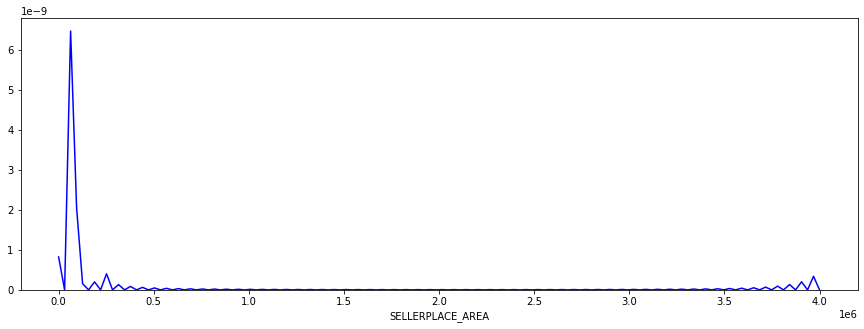

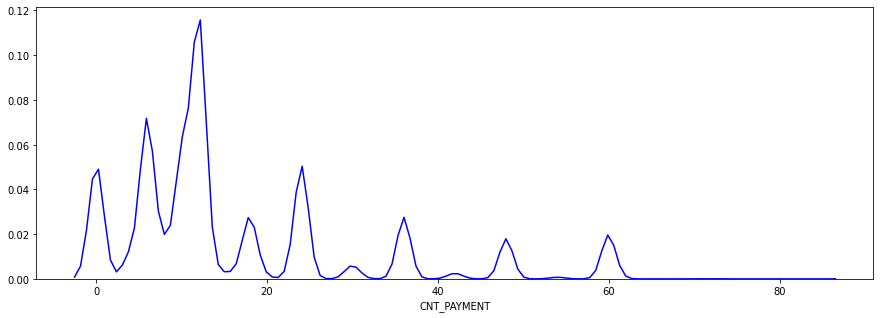

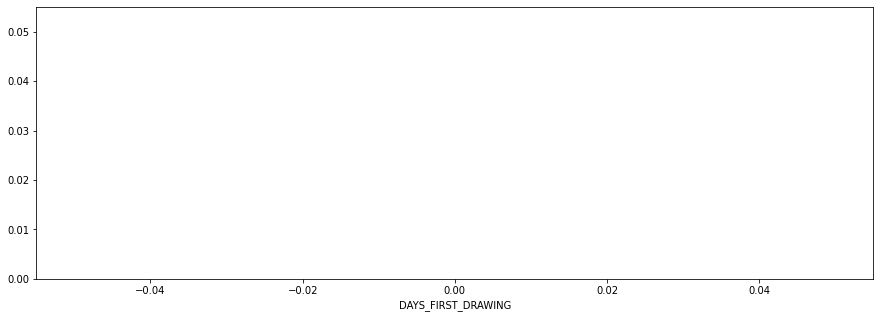

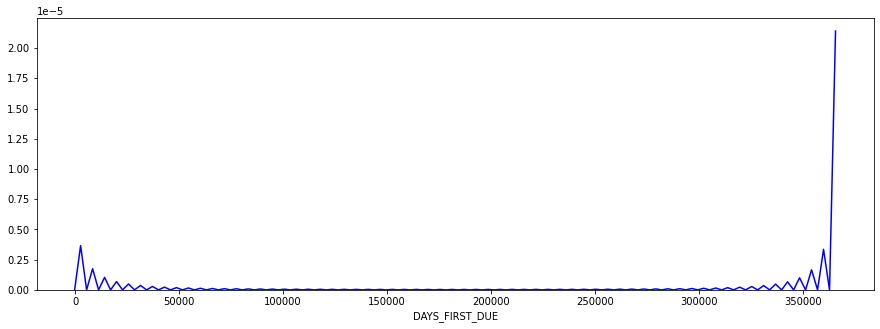

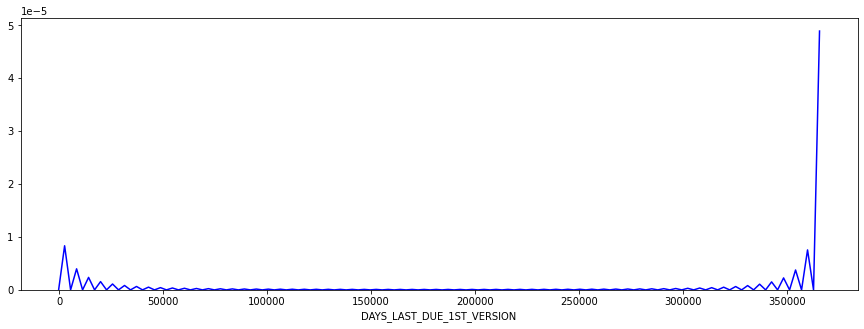

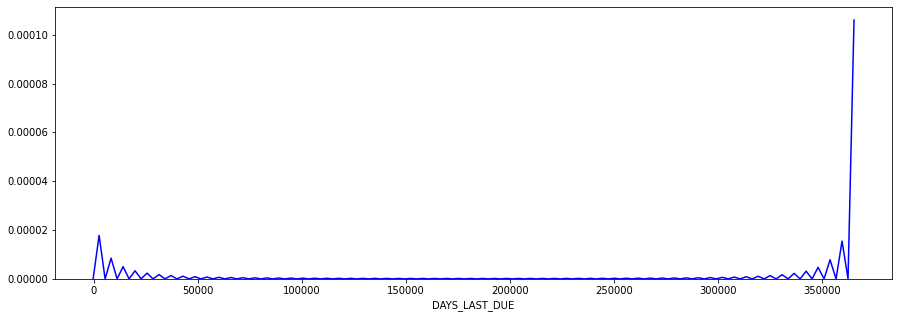

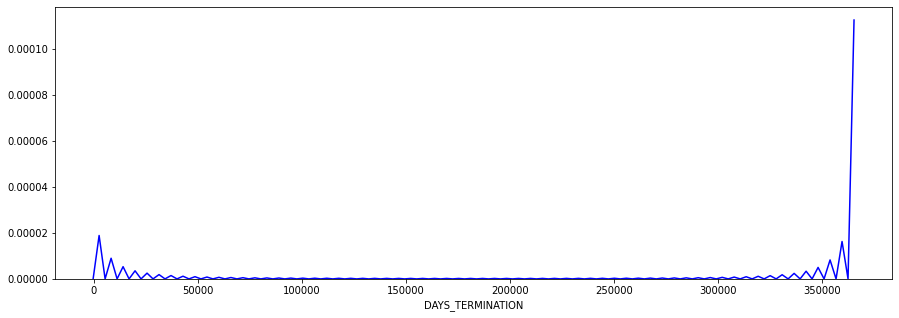

In [105]:
#distplot to see numerical columns distribution
for i in prev_num_cols[2:]:
    plt.figure(figsize=(15,5))
    sns.distplot(prev_app_data[prev_num_cols][i], hist=False, color='blue')
    plt.xlabel(i)  
    plt.show()

In [106]:
prev_app_cat_data = prev_app_data[prev_cat_cols]

In [107]:
prev_app_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 19 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   NAME_CONTRACT_TYPE           1670214 non-null  object 
 1   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 2   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 3   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 4   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 5   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 6   NAME_CONTRACT_STATUS         1670214 non-null  object 
 7   NAME_PAYMENT_TYPE            1670214 non-null  object 
 8   CODE_REJECT_REASON           1670214 non-null  object 
 9   NAME_TYPE_SUITE              849809 non-null   object 
 10  NAME_CLIENT_TYPE             1670214 non-null  object 
 11  NAME_GOODS_CATEGORY          1670214 non-null  object 
 12  NAME_PORTFOLIO               1670214 non-n

In [108]:
prev_app_cat_data[['HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY']] = prev_app_cat_data[['HOUR_APPR_PROCESS_START', 
                                                                        'NFLAG_LAST_APPL_IN_DAY']].astype('category')

In [109]:
for i in prev_app_cat_data.columns:
    if prev_app_cat_data[i].isnull().mean() > 0:
        mod = prev_app_cat_data[i].mode()[0]
        prev_app_cat_data[i] = prev_app_cat_data[i].fillna(mod)

In [110]:
100*prev_app_cat_data.isnull().mean()

NAME_CONTRACT_TYPE             0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_TYPE_SUITE                0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
NFLAG_INSURED_ON_APPROVAL      0.0
dtype: float64

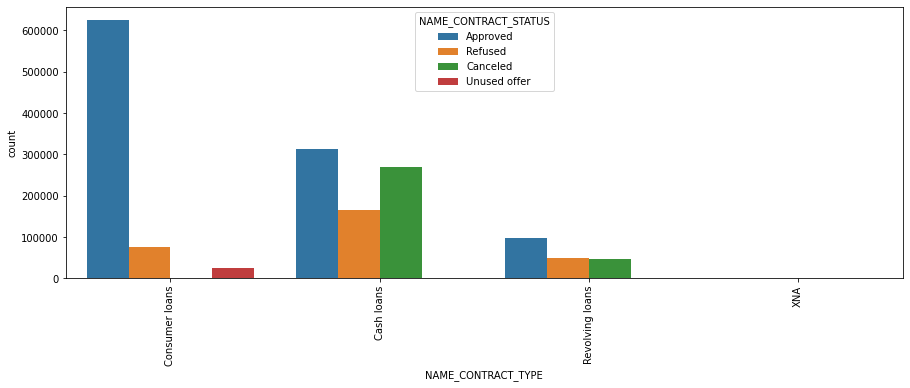

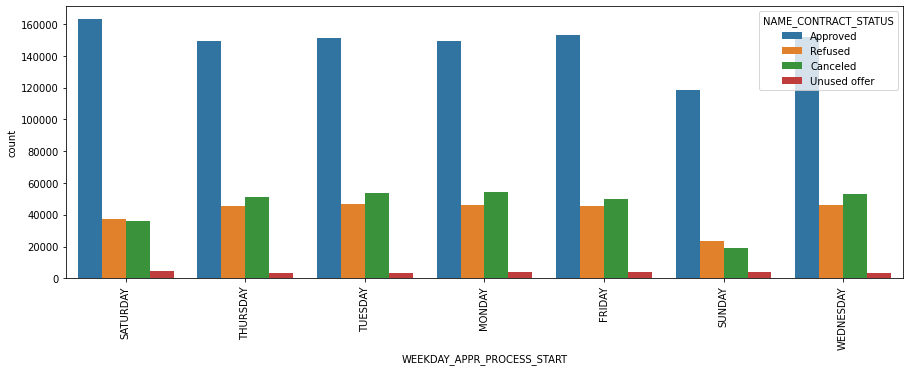

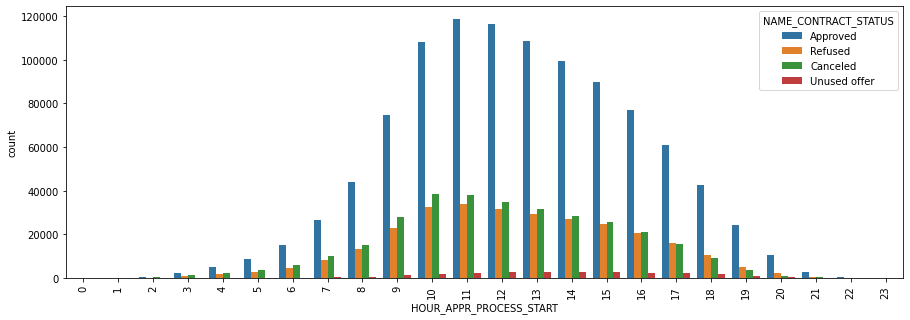

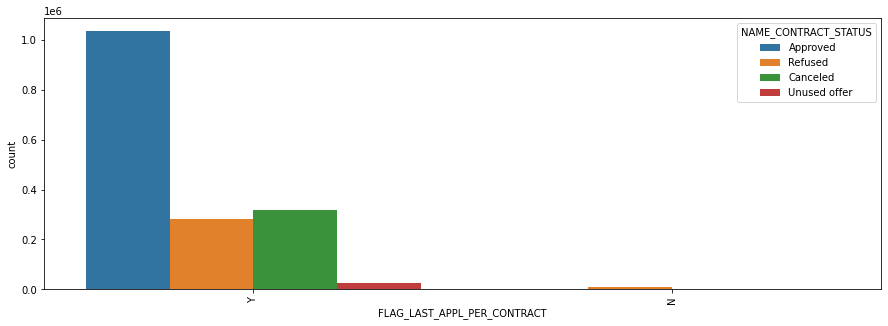

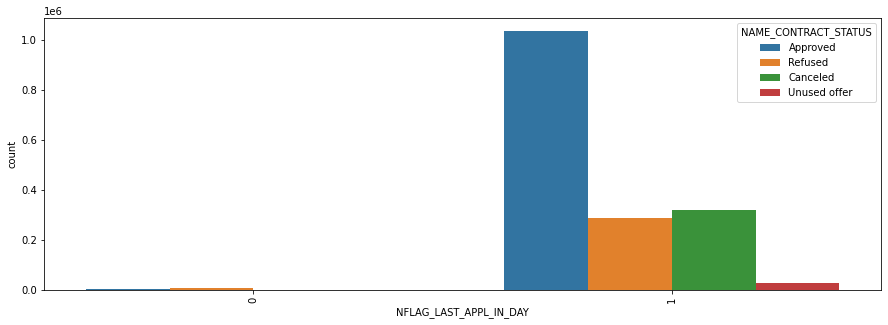

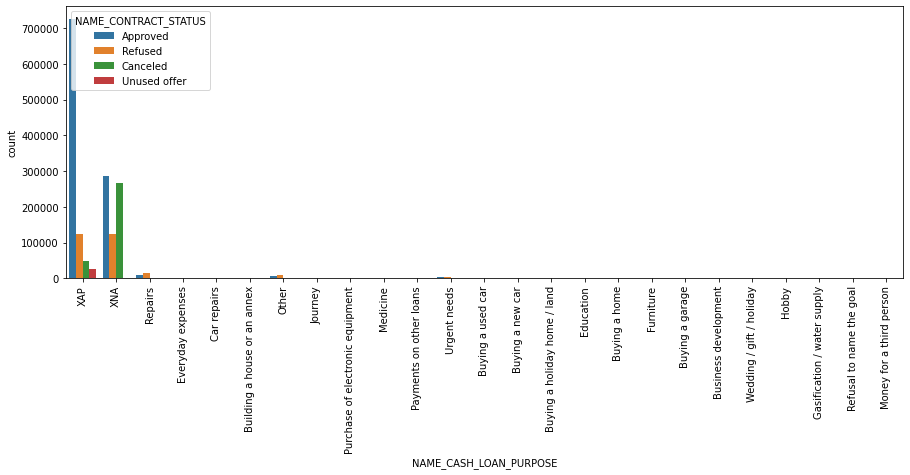

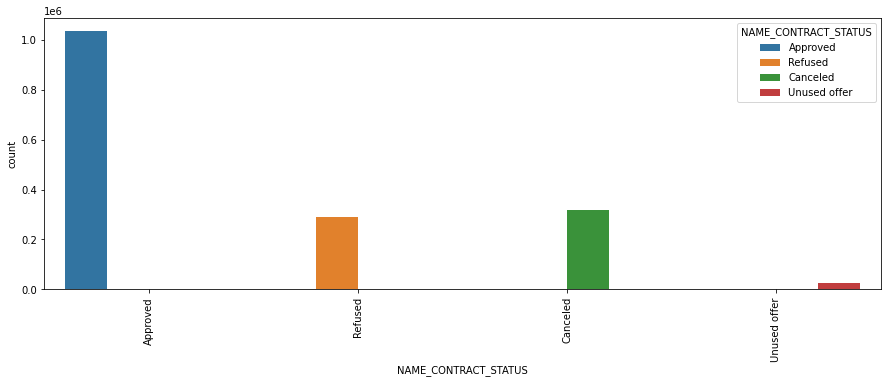

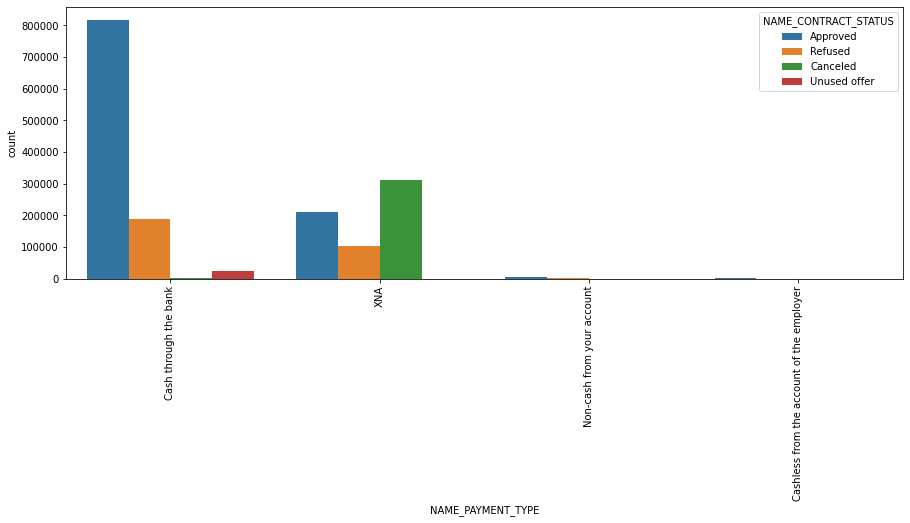

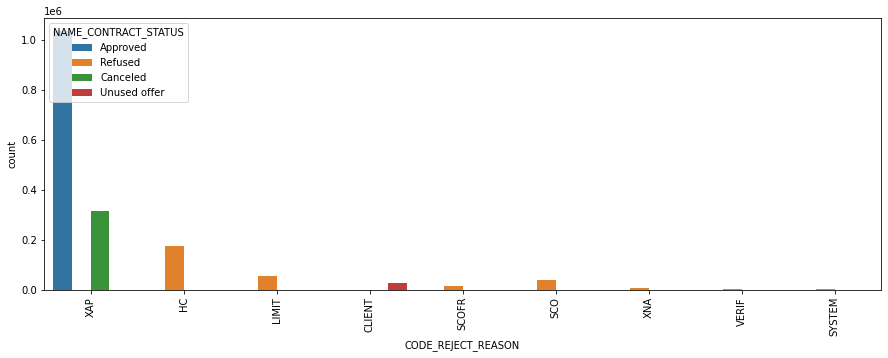

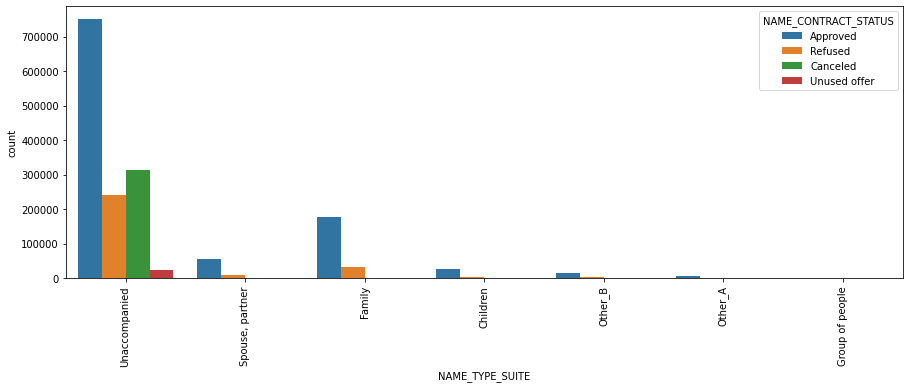

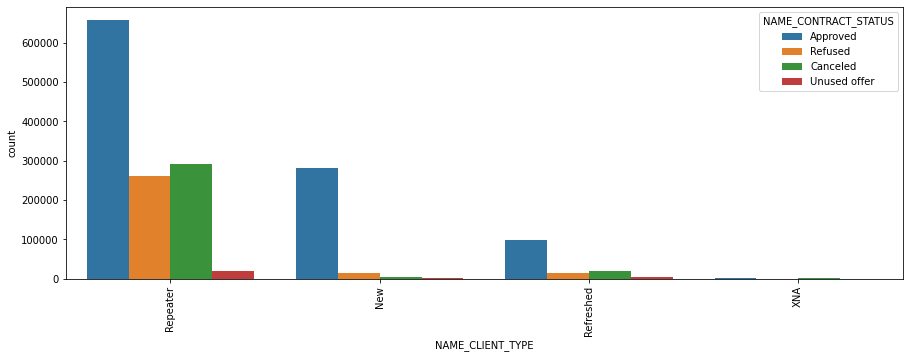

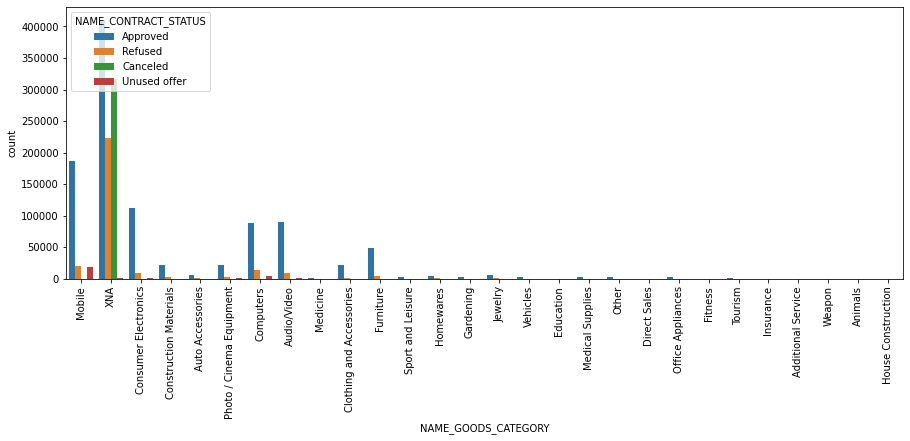

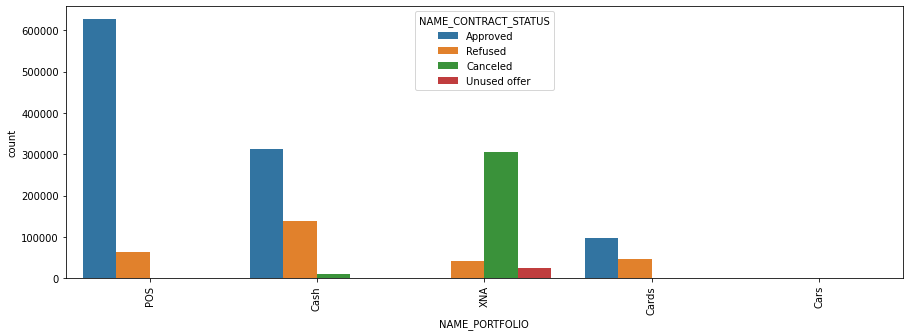

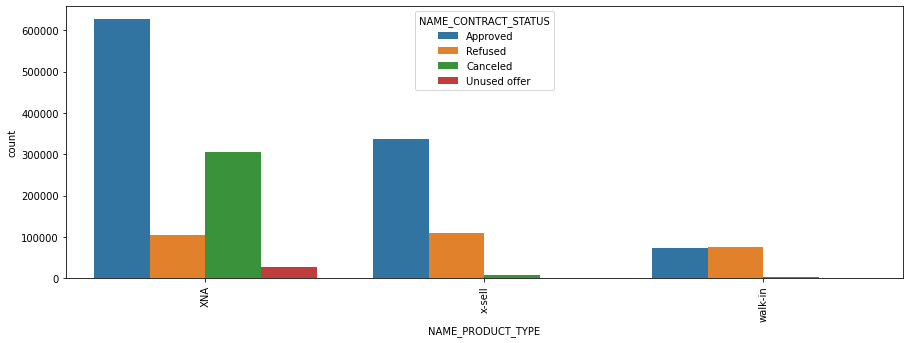

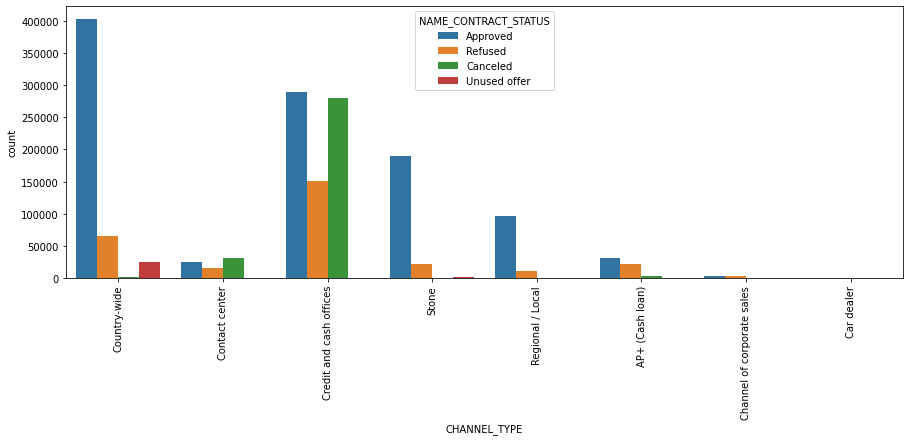

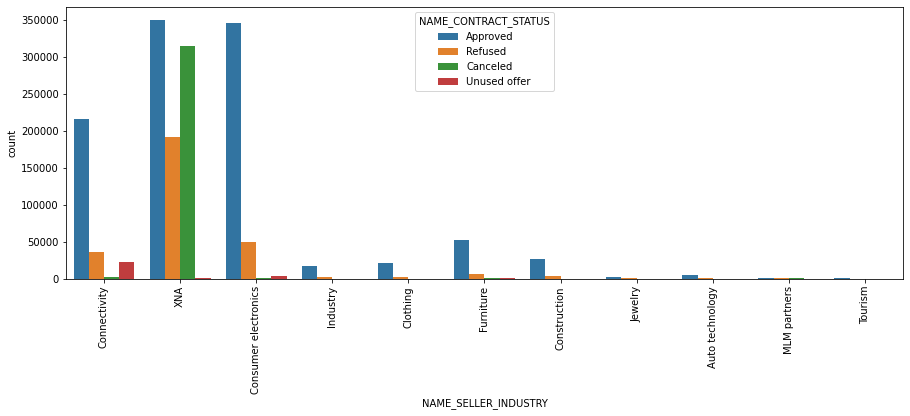

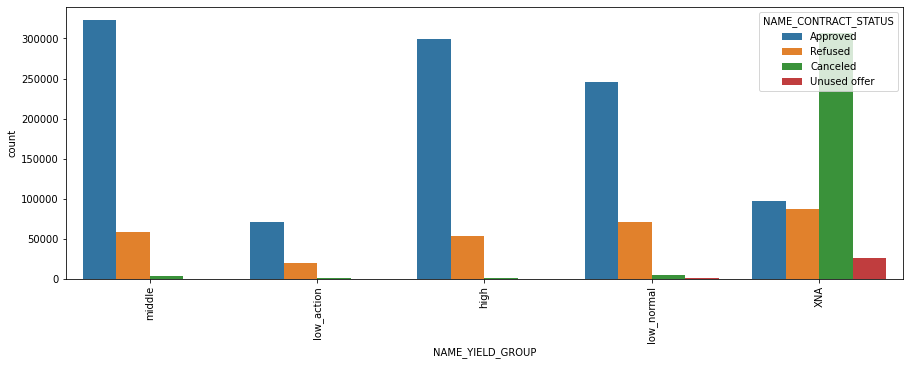

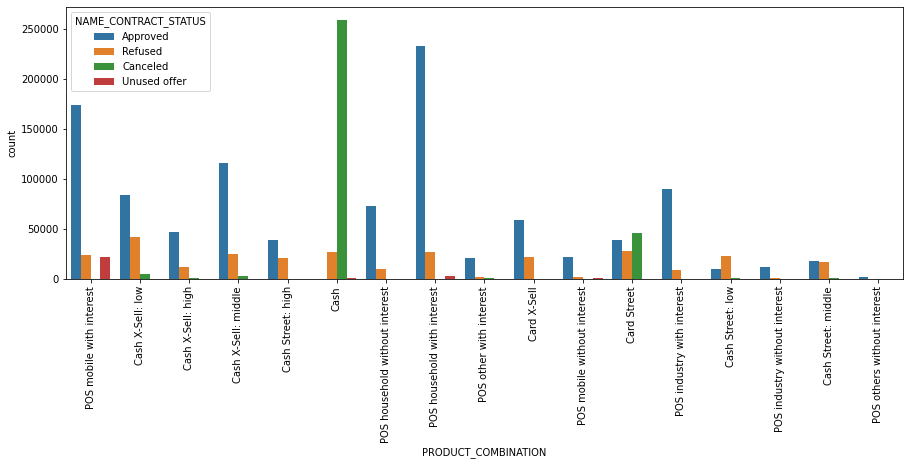

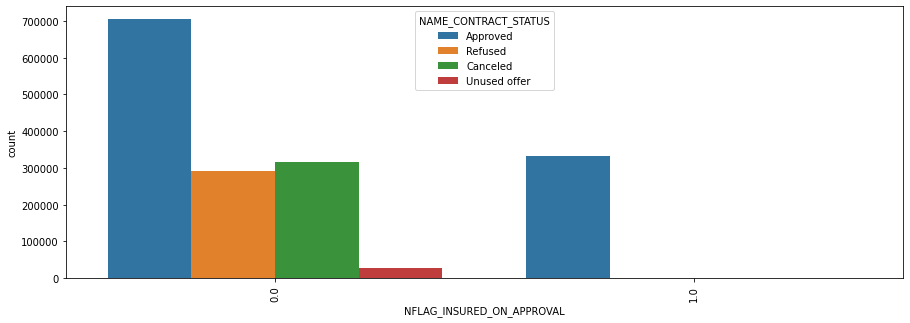

In [111]:
for i in prev_app_cat_data.columns:
    plt.figure(figsize=(15,5))
    sns.countplot(prev_app_cat_data[i], hue=prev_app_cat_data['NAME_CONTRACT_STATUS'])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

# Previous Application Data Analysis
* Consumer loans approved count is greater than other loans and followed by cash loans
* Cash through bank is the most used payment type (Payment method that client chose to pay for the previous application).
* Unaccompained clients are more likely get loan approval
* Repeater has highest number of approved loans.
* Middle NAME_YIELD_GROUP has highest approval.
* For Medium AMT_INCOME_TOTAL_bin the approval is highest.


In [112]:
prev_app_num_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
      dtype='object')

In [113]:
prev_app_cat_data.columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

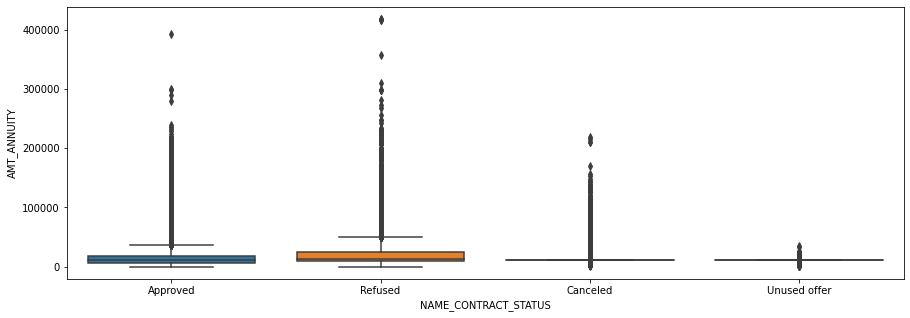

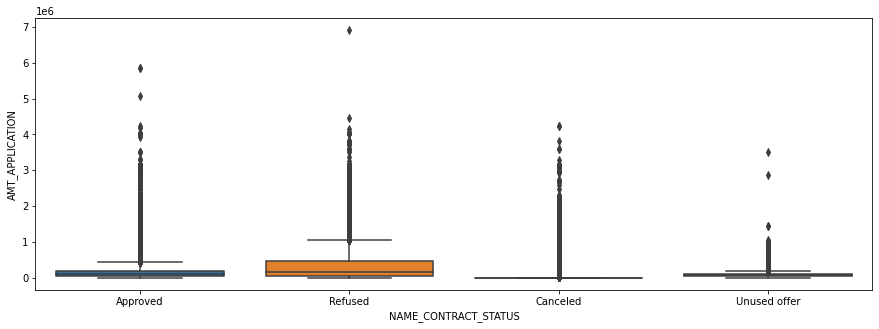

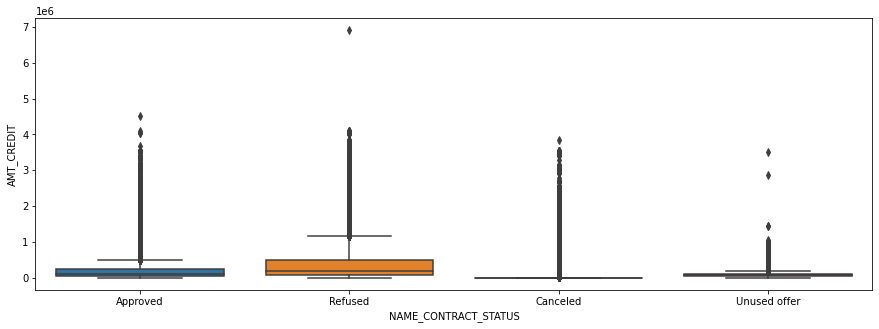

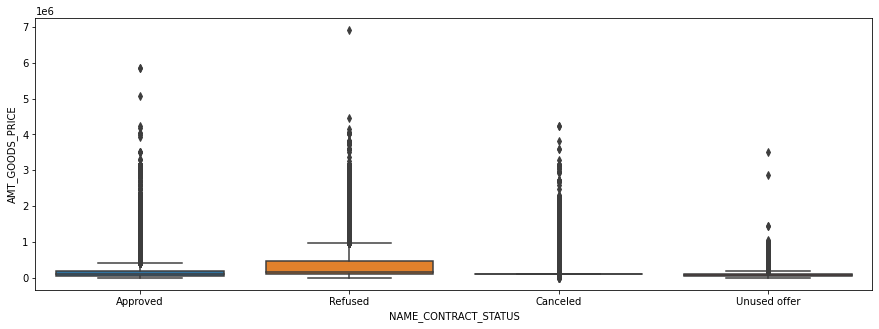

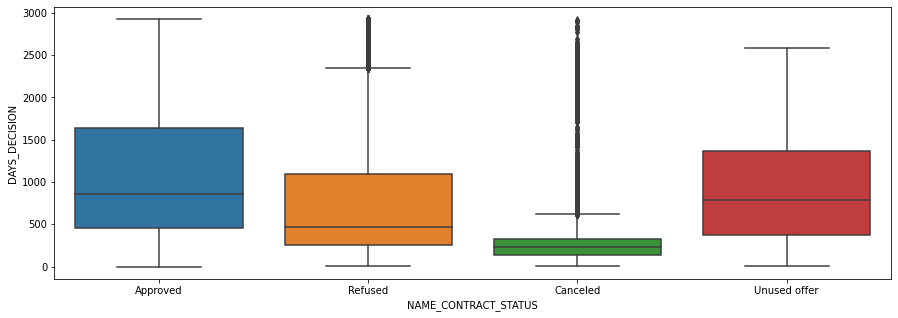

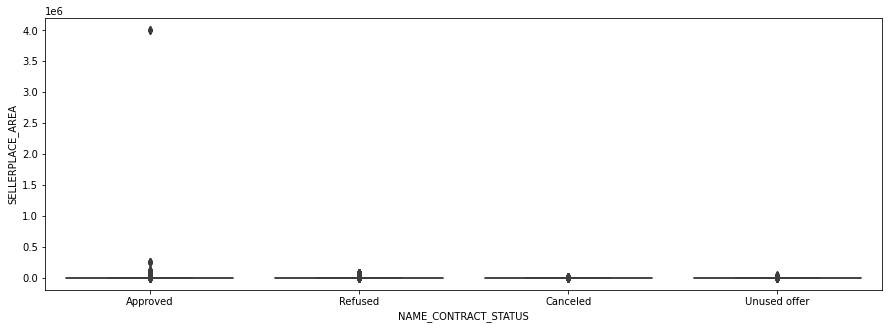

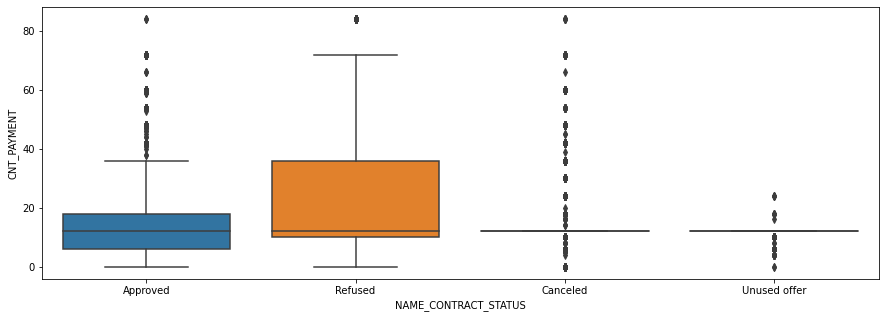

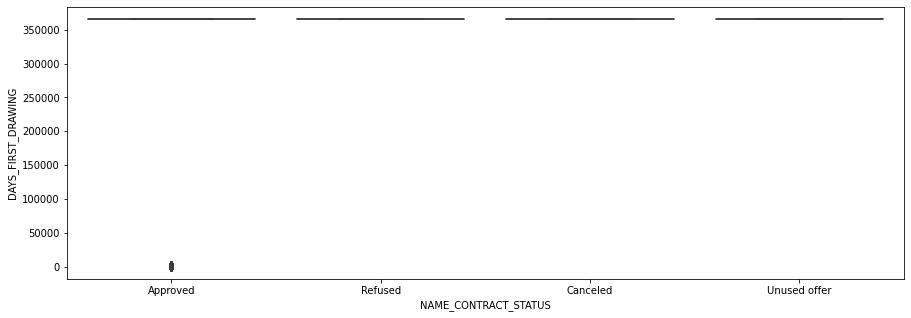

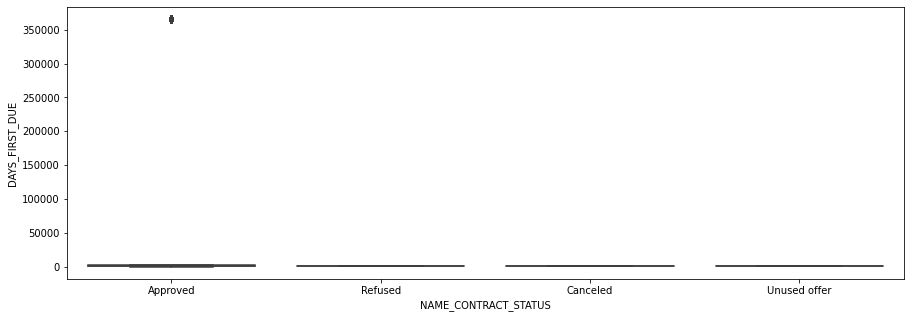

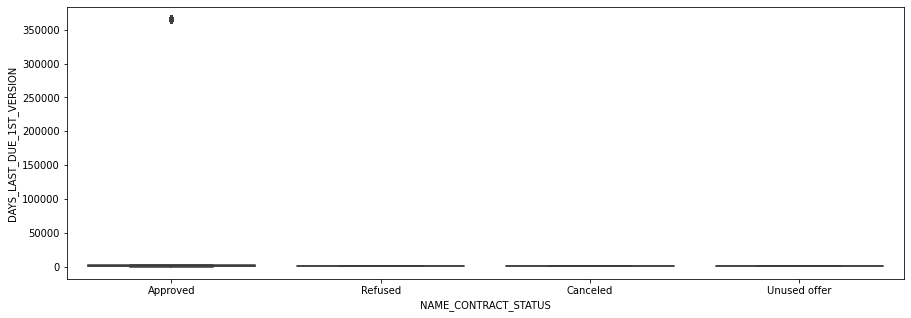

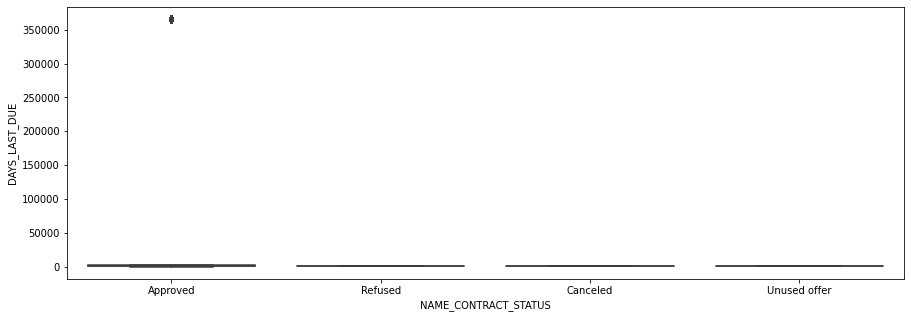

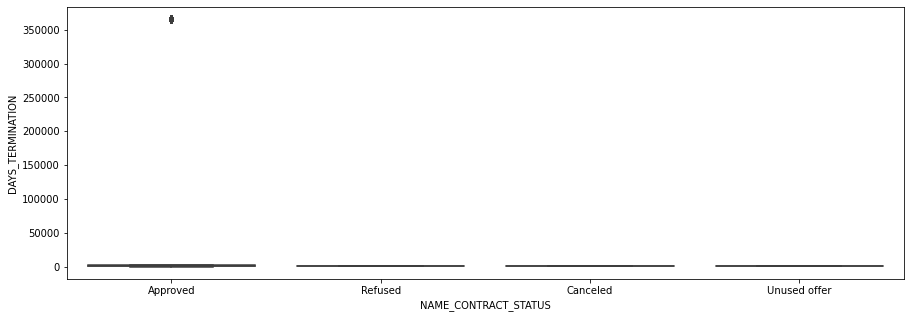

In [114]:
for i in prev_app_num_data.columns[2:]:
    plt.figure(figsize=(15,5))
    sns.boxplot(x=prev_app_cat_data['NAME_CONTRACT_STATUS'], y=prev_app_num_data[i])
    plt.show()

## Observations - Category vs Numerical data

* Amount annuity for previous applicants are less compared to refused loan applicants
* Clients who asked for lesser median credit on the previous application have more approval rate.
* Amount credit previous has highest refused cases and amount credit is similar for all 4 cases.
* Selling area of seller place of the previous application range (0 to 150) have higher loan approval.
* Time spent in unused offer is higher as compared to other categories. So bank should reduce time spent on unused offer.

# Data analysis of combining data sets (application and previous application data)

* Merging two data sets on SK_ID_CURR

In [115]:
# before merging previous and current application df. 
# lets megre preprocessed previous application data set
df_prev_app = pd.concat([prev_app_num_data,prev_app_cat_data],axis='columns')

In [116]:
df_prev_app.head()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     1730.430          17145.0     17145.0   
1     2802425      108129    25188.615         607500.0    679671.0   
2     2523466      122040    15060.735         112500.0    136444.5   
3     2819243      176158    47041.335         450000.0    470790.0   
4     1784265      202054    31924.395         337500.0    404055.0   

   AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
0          17145.0             73                35         12.0   
1         607500.0            164                -1         36.0   
2         112500.0            301                -1         12.0   
3         450000.0            512                -1         12.0   
4         337500.0            781                -1         24.0   

   DAYS_FIRST_DRAWING  ...  NAME_TYPE_SUITE  NAME_CLIENT_TYPE  \
0            365243.0  ...    Unaccompanied          Repeater   
1            365243.0  ...    Unaccompanied          Repeater   
2            365243.0  ...  Spouse, partner          Repeater   
3            365243.0  ...    Unaccompanied          Repeater   
4            365243.0  ...    Unaccompanied          Repeater   

   NAME_GOODS_CATEGORY  NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0               Mobile             POS               XNA   
1                  XNA            Cash            x-sell   
2                  XNA            Cash            x-sell   
3                  XNA            Cash            x-sell   
4                  XNA            Cash           walk-in   

              CHANNEL_TYPE NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  \
0             Country-wide         Connectivity           middle   
1           Contact center                  XNA       low_action   
2  Credit and cash offices                  XNA             high   
3  Credit and cash offices                  XNA           middle   
4  Credit and cash offices                  XNA             high   

        PRODUCT_COMBINATION NFLAG_INSURED_ON_APPROVAL  
0  POS mobile with interest                       0.0  
1          Cash X-Sell: low                       1.0  
2         Cash X-Sell: high                       1.0  
3       Cash X-Sell: middle                       1.0  
4         Cash Street: high                       0.0  

[5 rows x 33 columns]

In [117]:
# Preprocessed application data set
df_app.head()

SK_ID_CURR  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      100002          202500.0    406597.5      24700.5         351000.0   
1      100003          270000.0   1293502.5      35698.5        1129500.0   
2      100004           67500.0    135000.0       6750.0         135000.0   
3      100006          135000.0    312682.5      29686.5         297000.0   
4      100007          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  ...  DEF_60_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0             2120  ...                       2.0                         0.0   
1              291  ...                       0.0                         0.0   
2             2531  ...                       0.0                         0.0   
3             2437  ...                       0.0                         0.0   
4             3458  ...                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR   Income Range      Credit Range  \
0                        1.0  200000-300000     400000-500000   
1                        0.0  200000-300000  500000 and above   
2                        0.0        <100000     100000-200000   
3                        0.0  100000-200000     300000-400000   
4                        0.0  100000-200000  500000 and above   

  Goods Price Range  
0     300000-400000  
1  500000 and above  
2     100000-200000  
3     200000-300000  
4  500000 and above  

[5 rows x 50 columns]

In [118]:
# merging both application and previous application data on SK_ID_CURR

merged = df_app.merge(df_prev_app,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='inner')

In [119]:
merged.head()

SK_ID_CURR  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0      100002          202500.0      406597.5        24700.5   
1      100003          270000.0     1293502.5        35698.5   
2      100003          270000.0     1293502.5        35698.5   
3      100003          270000.0     1293502.5        35698.5   
4      100004           67500.0      135000.0         6750.0   

   AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0           351000.0                    0.018801        9461            637   
1          1129500.0                    0.003541       16765           1188   
2          1129500.0                    0.003541       16765           1188   
3          1129500.0                    0.003541       16765           1188   
4           135000.0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  NAME_TYPE_SUITE_y  \
0             3648.0             2120  ...      Unaccompanied   
1             1186.0              291  ...      Unaccompanied   
2             1186.0              291  ...             Family   
3             1186.0              291  ...             Family   
4             4260.0             2531  ...      Unaccompanied   

   NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  NAME_PORTFOLIO  NAME_PRODUCT_TYPE  \
0               New              Vehicles             POS                XNA   
1          Repeater                   XNA            Cash             x-sell   
2         Refreshed             Furniture             POS                XNA   
3         Refreshed  Consumer Electronics             POS                XNA   
4               New                Mobile             POS                XNA   

              CHANNEL_TYPE  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  \
0                    Stone       Auto technology       low_normal   
1  Credit and cash offices                   XNA       low_normal   
2                    Stone             Furniture           middle   
3             Country-wide  Consumer electronics           middle   
4         Regional / Local          Connectivity           middle   

           PRODUCT_COMBINATION NFLAG_INSURED_ON_APPROVAL  
0      POS other with interest                       0.0  
1             Cash X-Sell: low                       1.0  
2   POS industry with interest                       0.0  
3  POS household with interest                       1.0  
4  POS mobile without interest                       0.0  

[5 rows x 82 columns]

In [120]:
merged.shape

(1405123, 82)

In [121]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405123 entries, 0 to 1405122
Data columns (total 82 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1405123 non-null  int64   
 1   AMT_INCOME_TOTAL              1405123 non-null  float64 
 2   AMT_CREDIT_x                  1405123 non-null  float64 
 3   AMT_ANNUITY_x                 1405123 non-null  float64 
 4   AMT_GOODS_PRICE_x             1405123 non-null  float64 
 5   REGION_POPULATION_RELATIVE    1405123 non-null  float64 
 6   DAYS_BIRTH                    1405123 non-null  int64   
 7   DAYS_EMPLOYED                 1405123 non-null  int64   
 8   DAYS_REGISTRATION             1405123 non-null  float64 
 9   DAYS_ID_PUBLISH               1405123 non-null  int64   
 10  EXT_SOURCE_2                  1405123 non-null  float64 
 11  EXT_SOURCE_3                  1405123 non-null  float64 
 12  OBS_30_CNT_SOC

In [122]:
merged.isnull().sum()

SK_ID_CURR                      0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
OBS_30_CNT_SOCIAL_CIRCLE        0
OBS_60_CNT_SOCIAL_CIRCLE        0
DAYS_LAST_PHONE_CHANGE          0
TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_

## Merged data - Categorical univarite and multivariate analysis

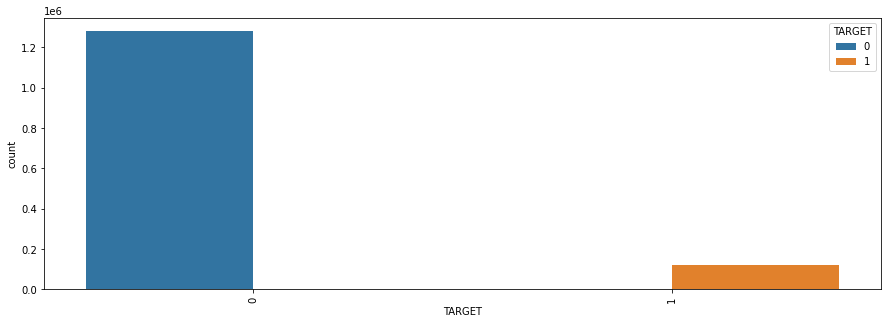

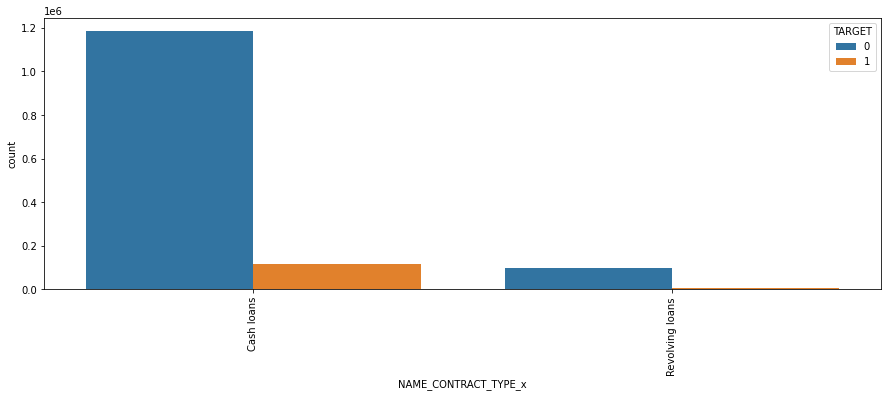

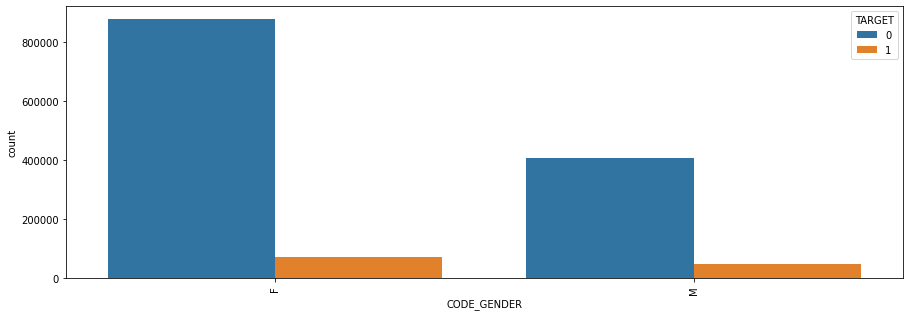

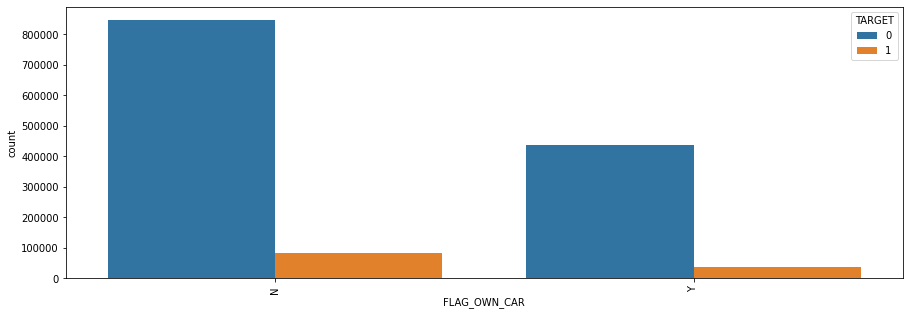

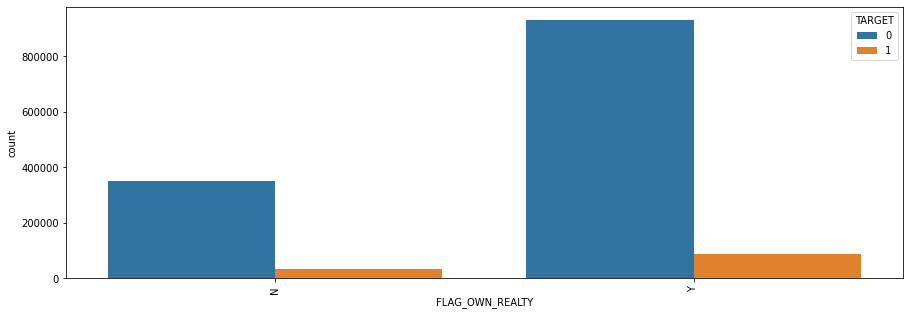

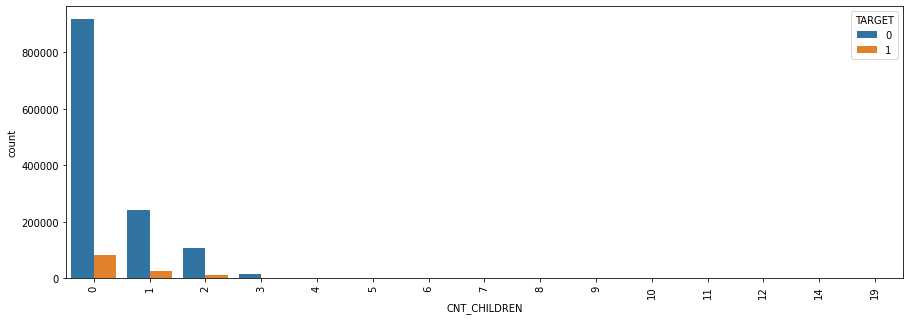

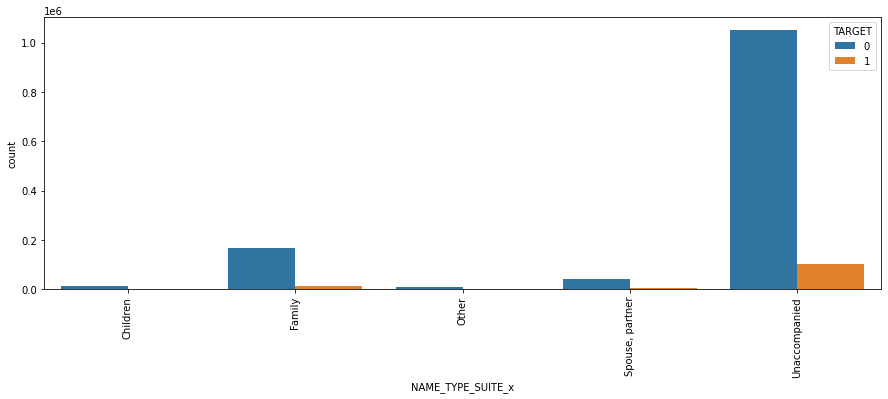

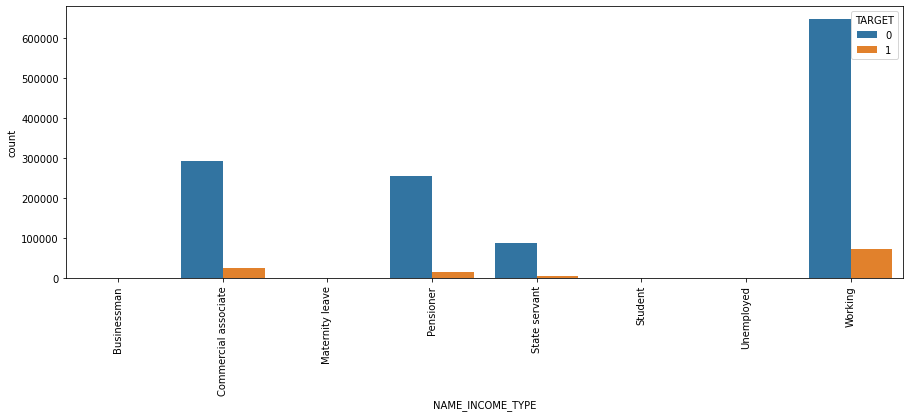

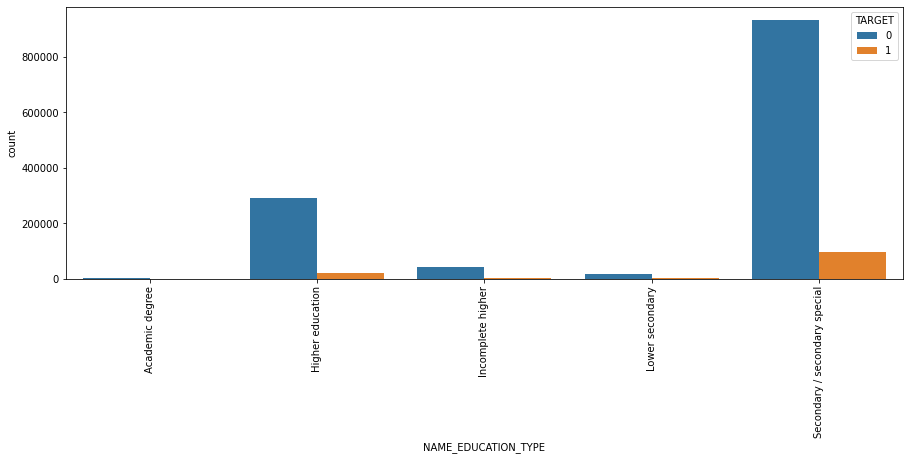

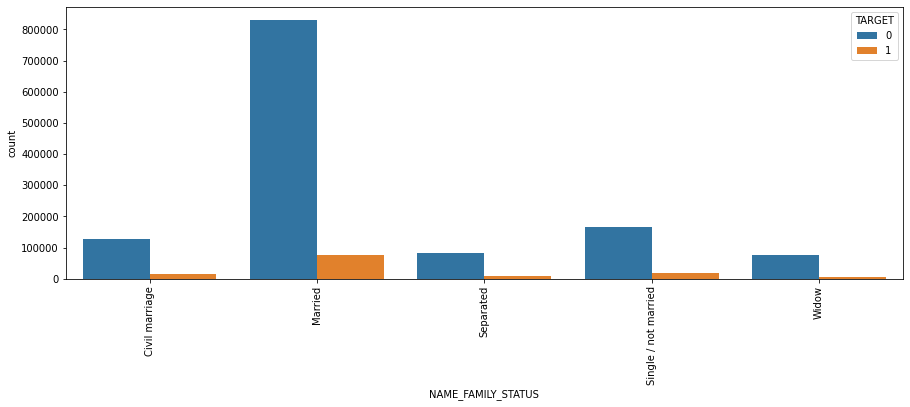

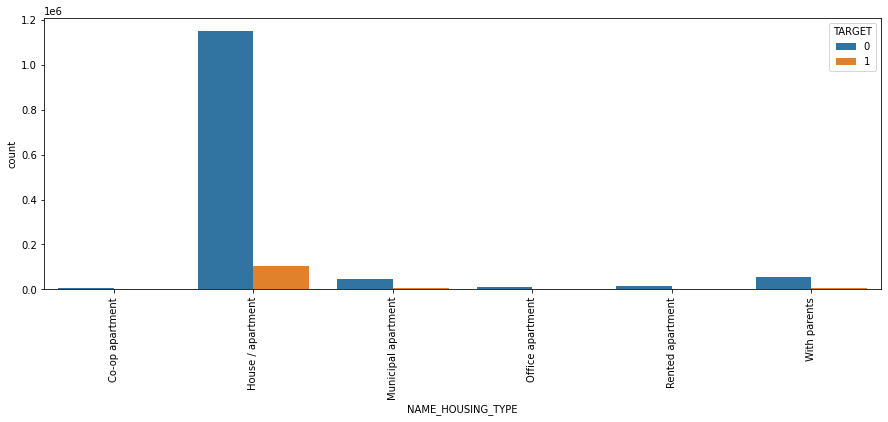

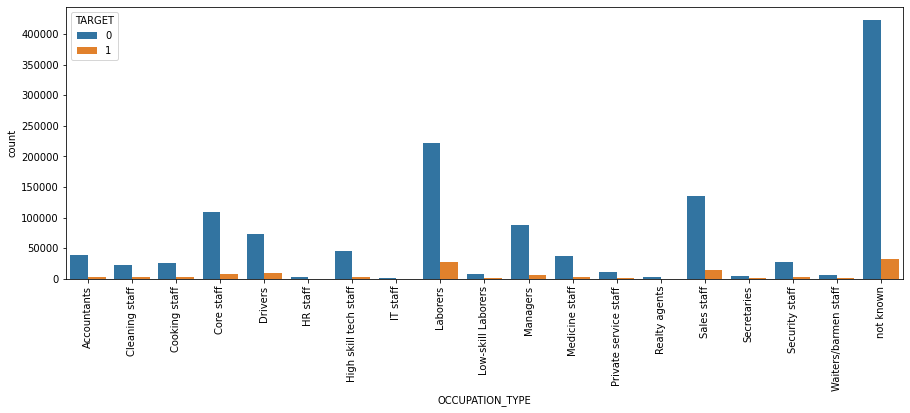

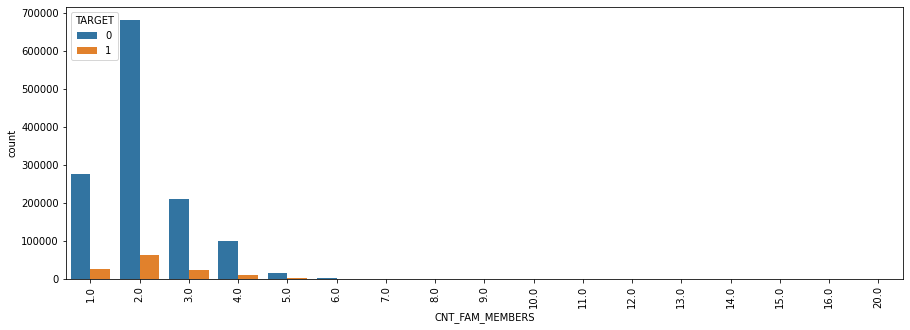

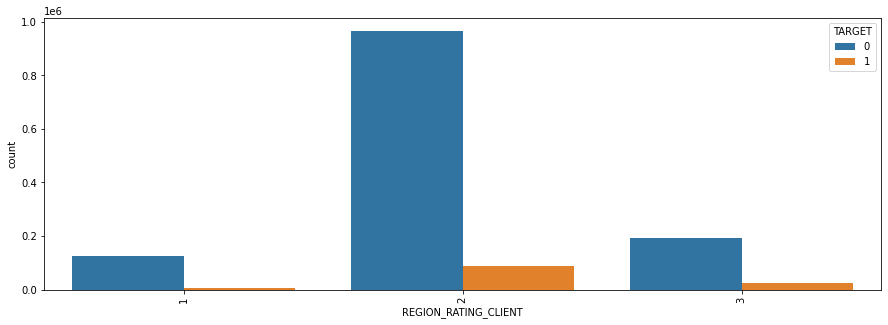

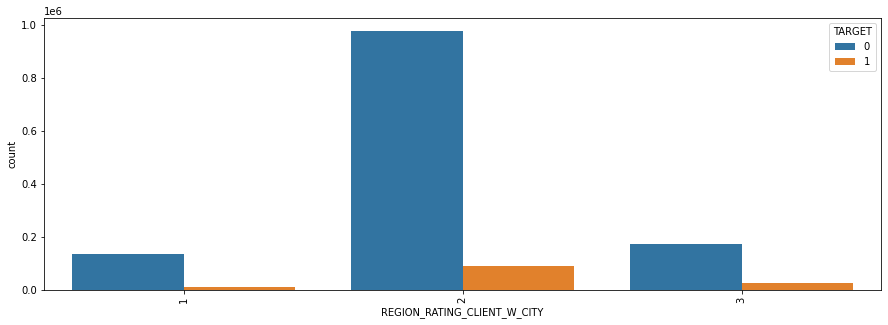

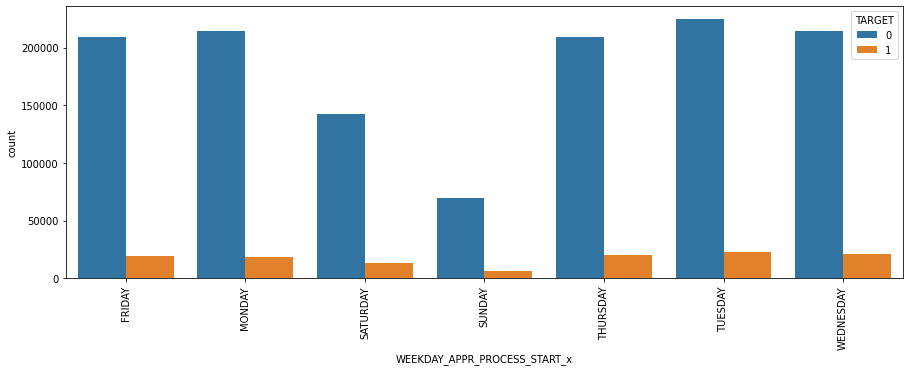

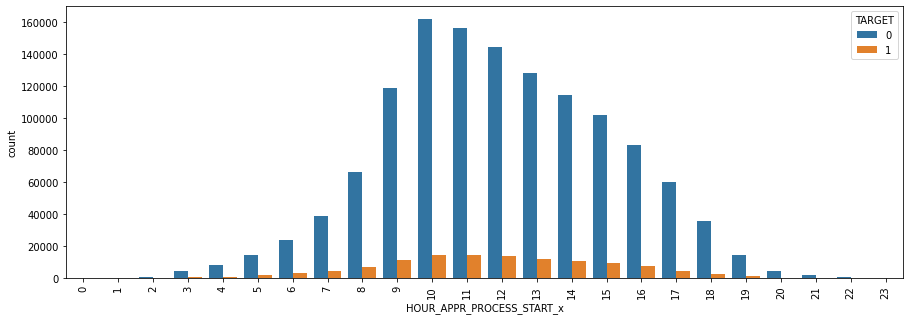

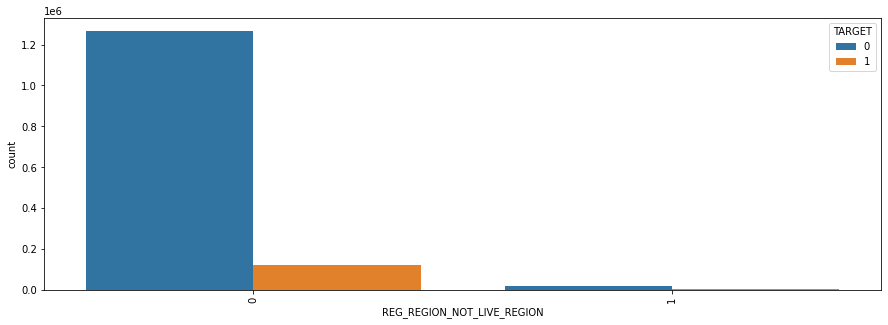

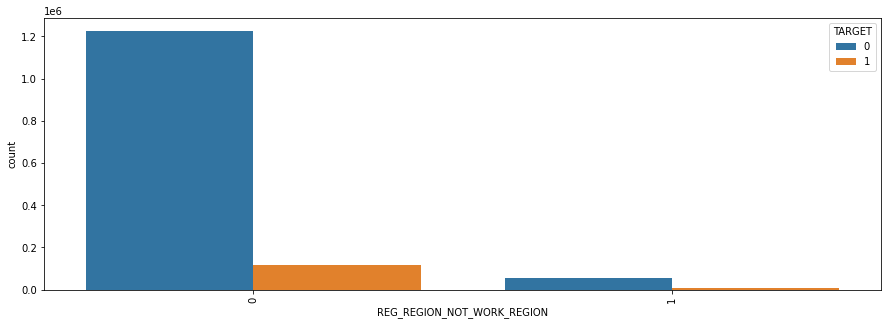

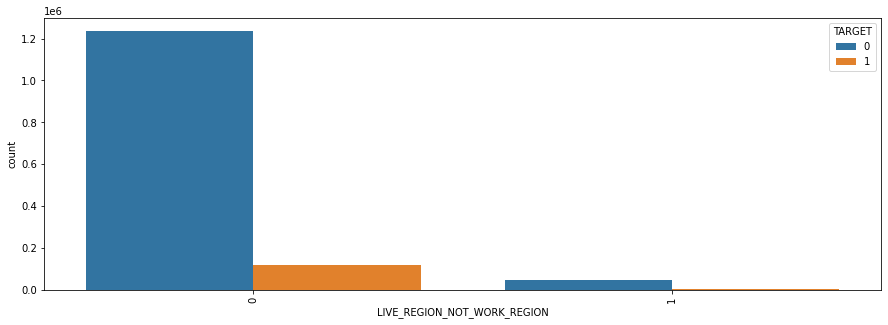

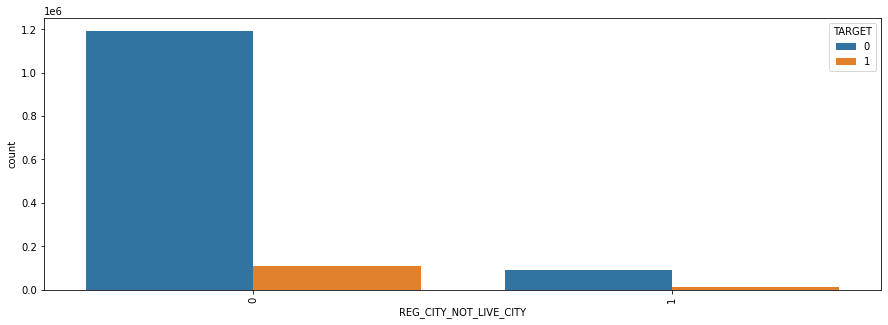

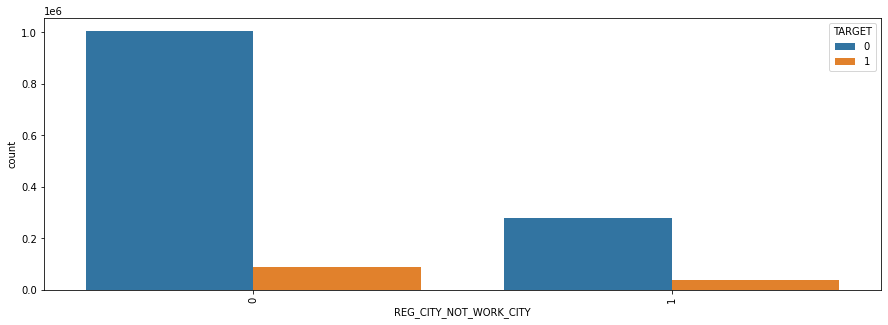

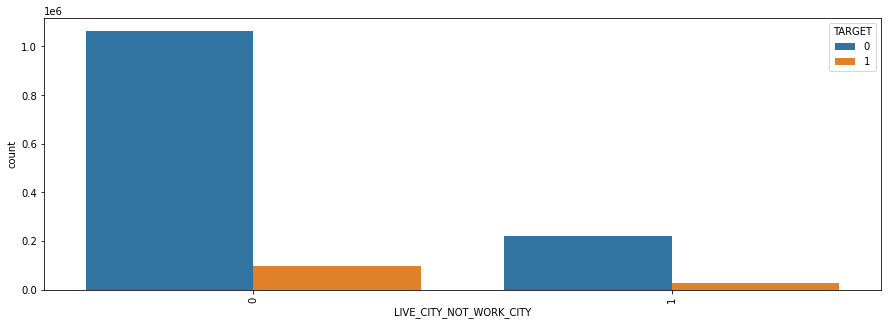

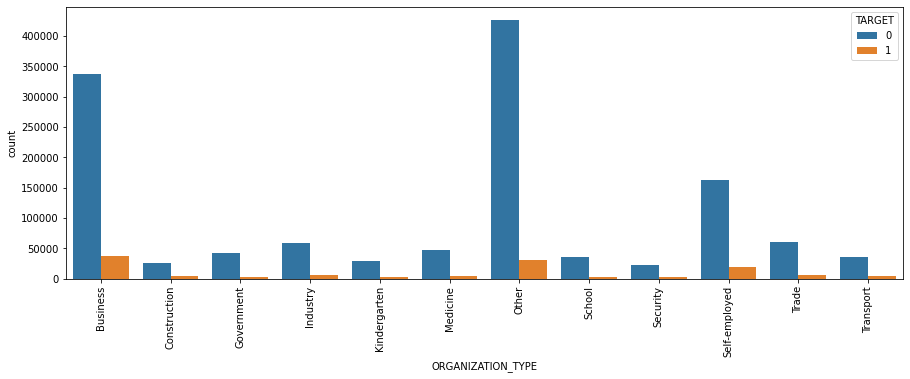

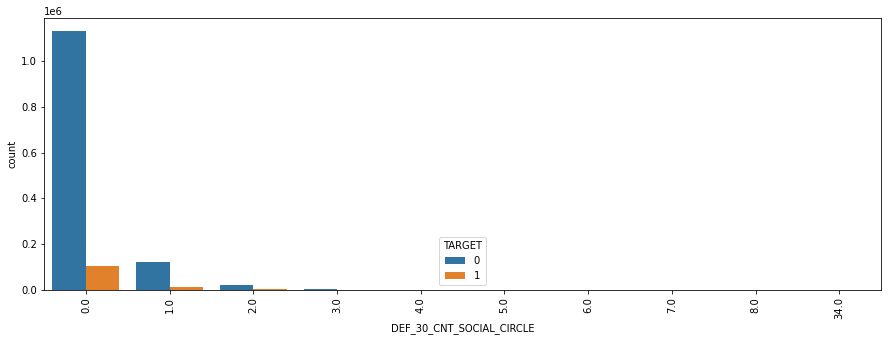

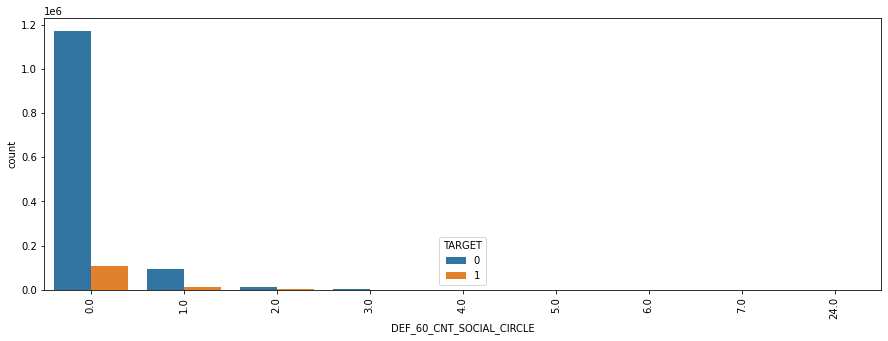

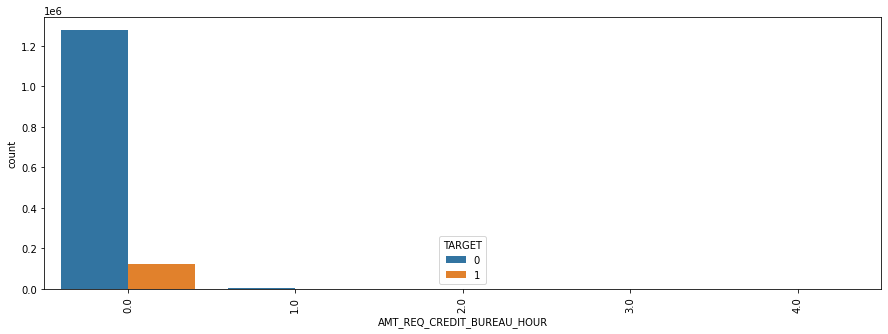

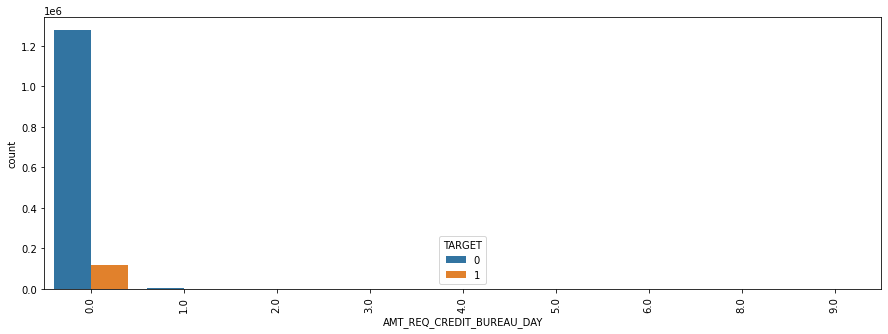

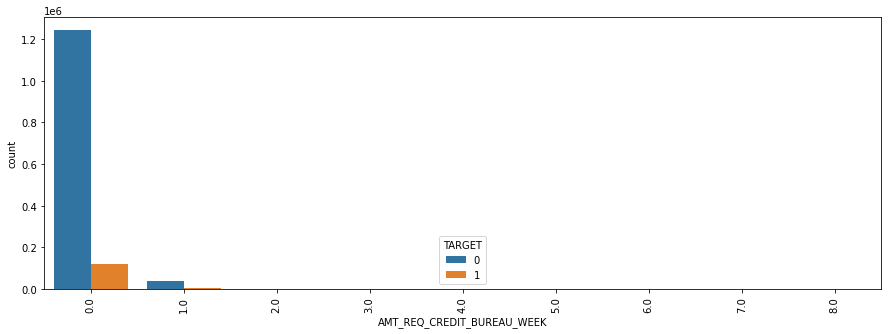

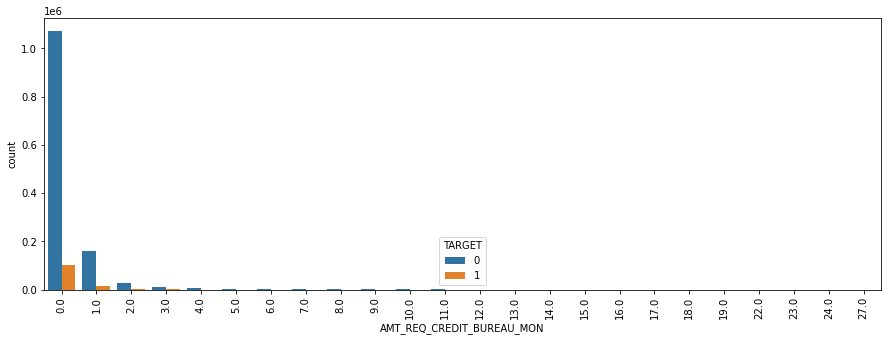

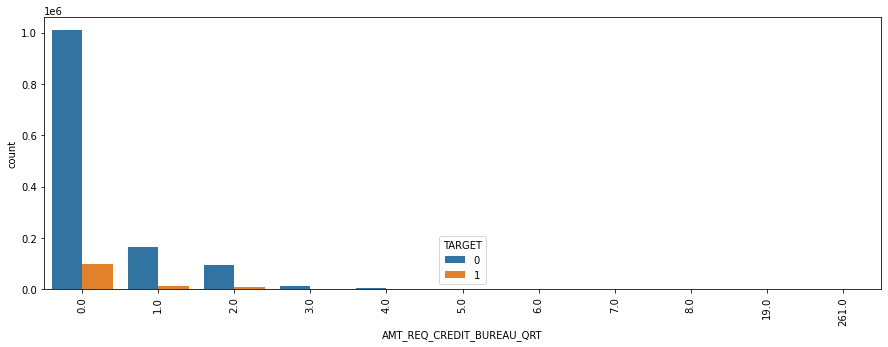

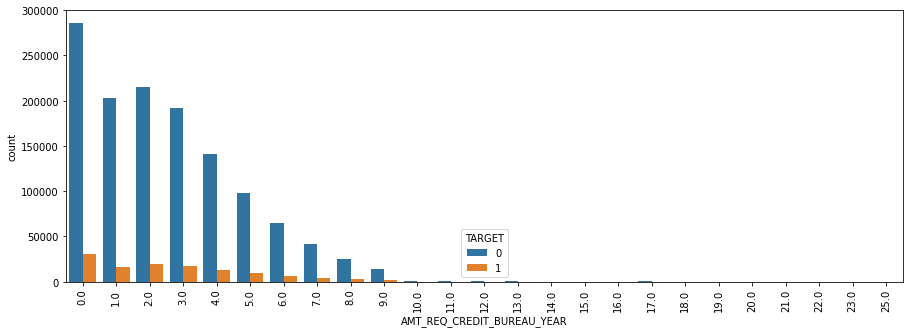

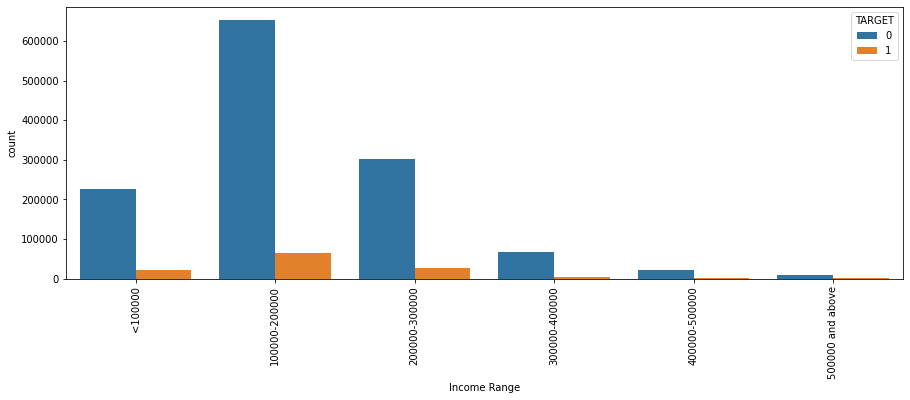

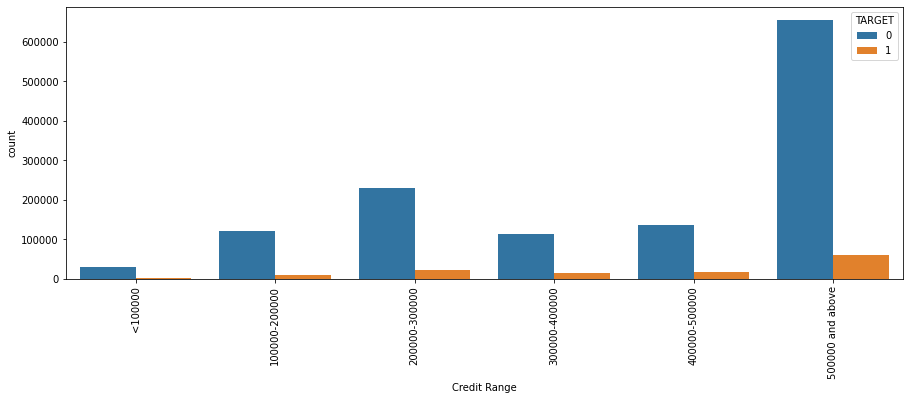

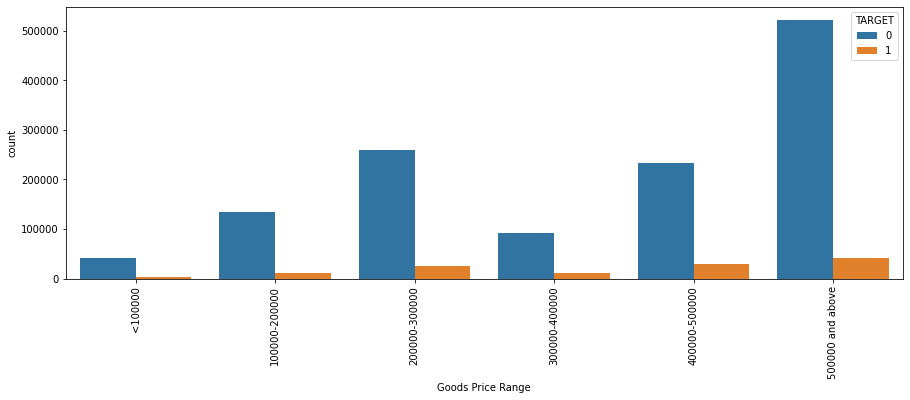

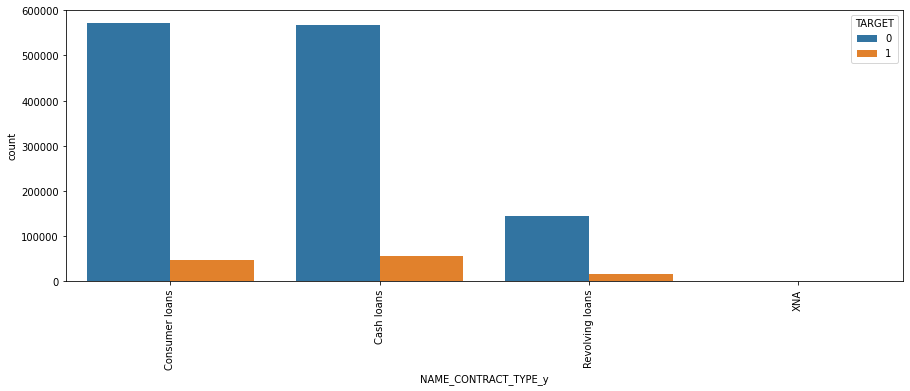

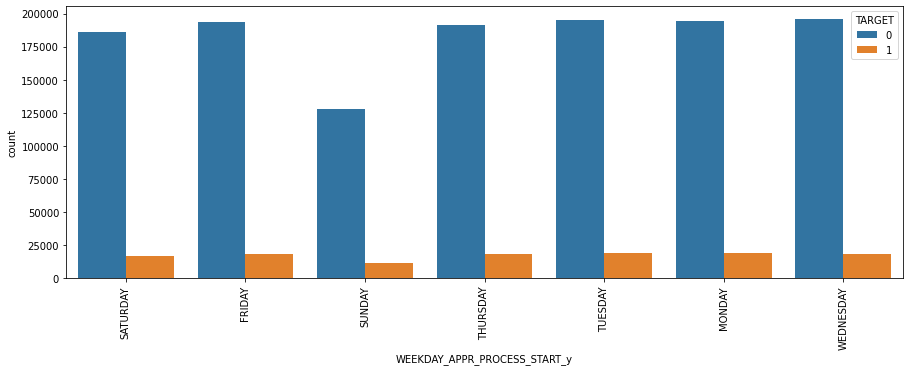

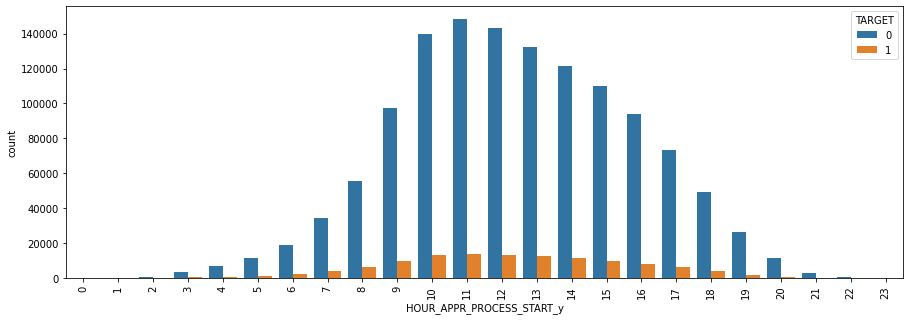

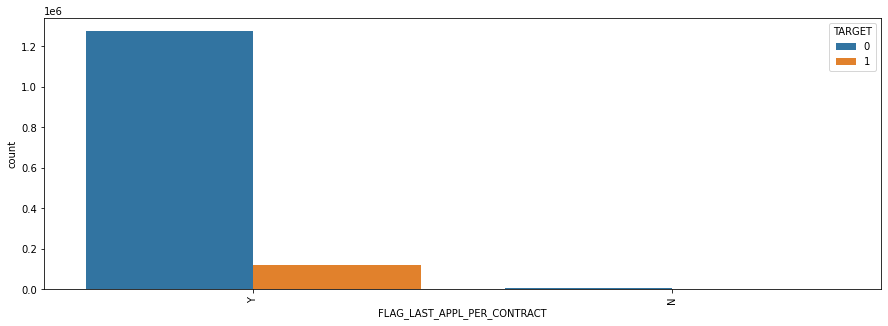

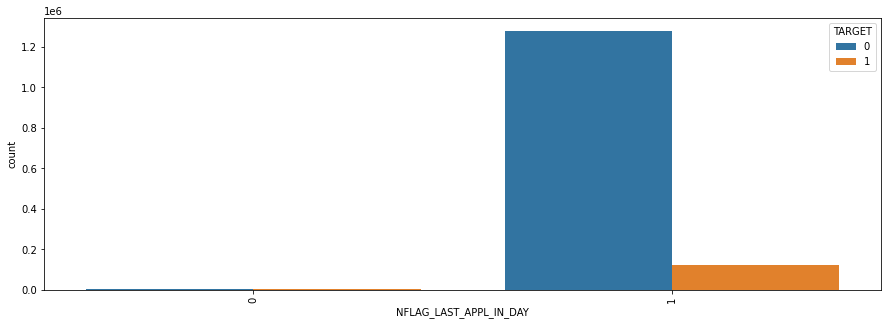

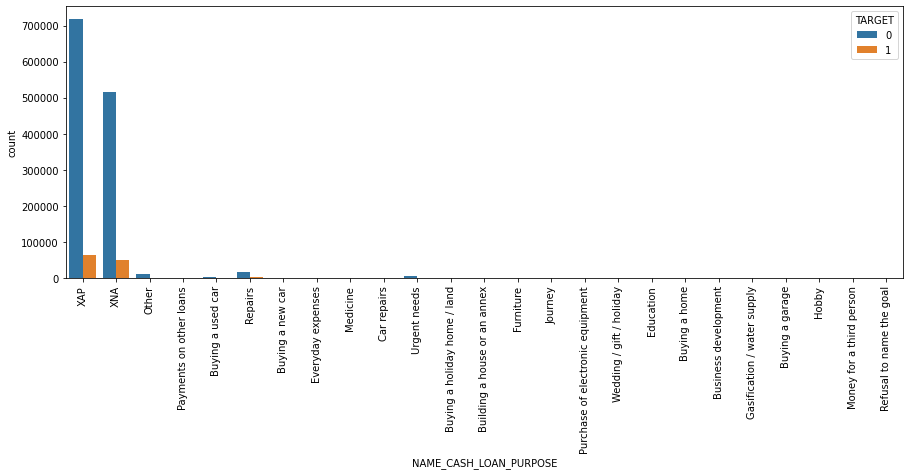

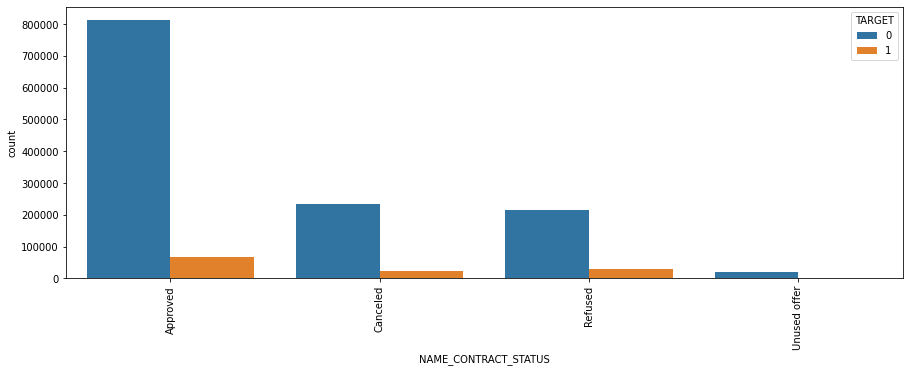

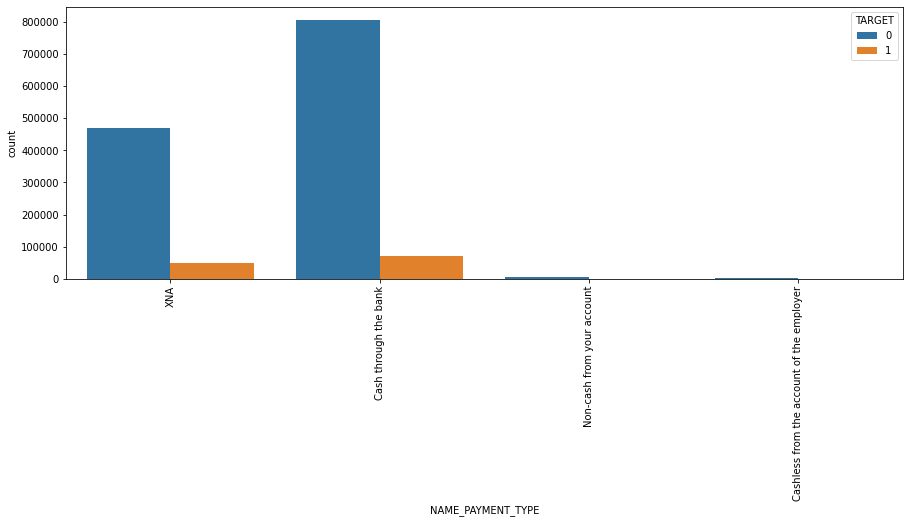

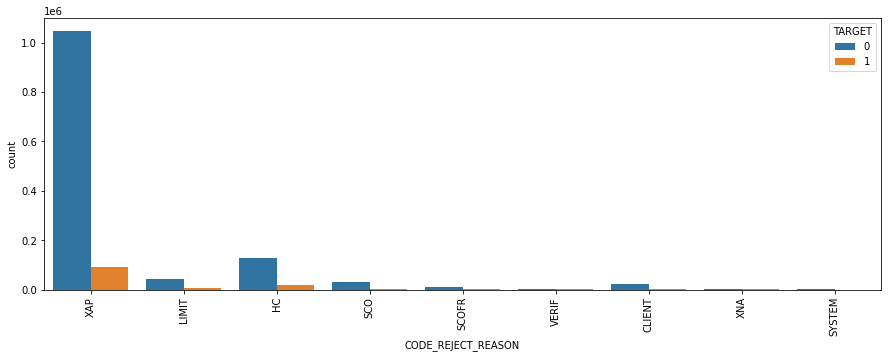

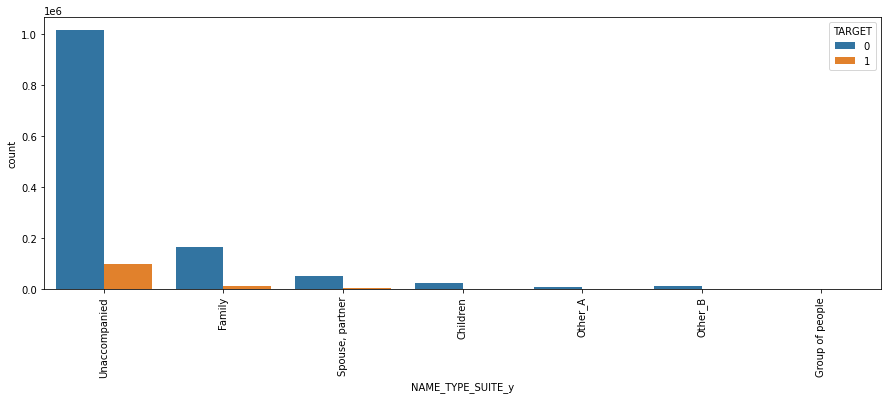

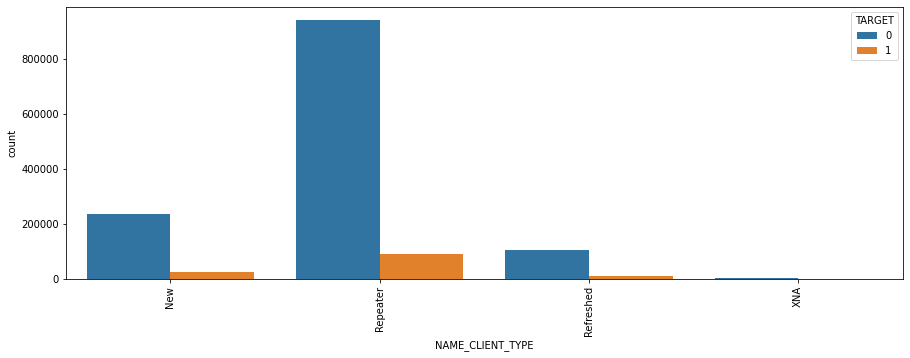

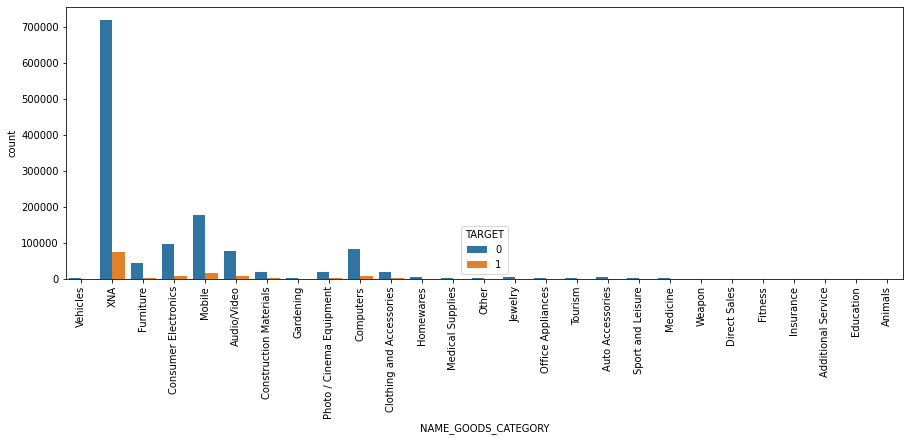

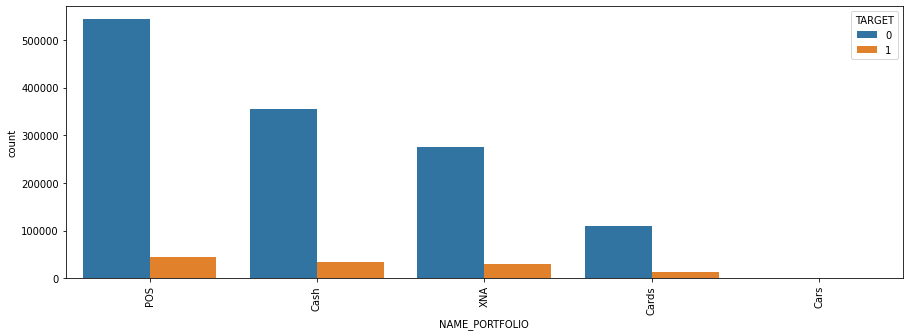

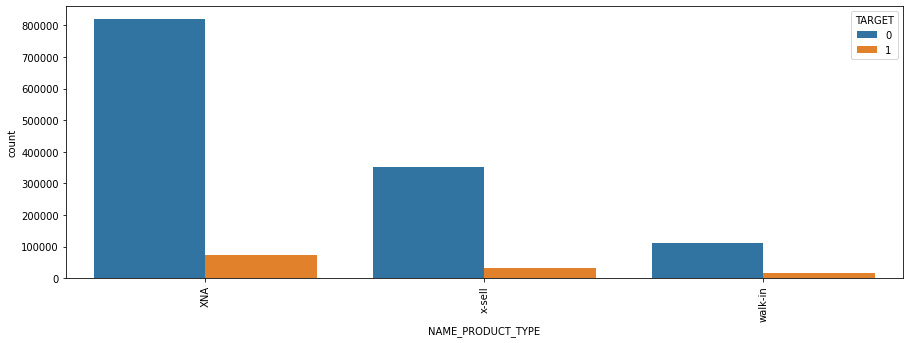

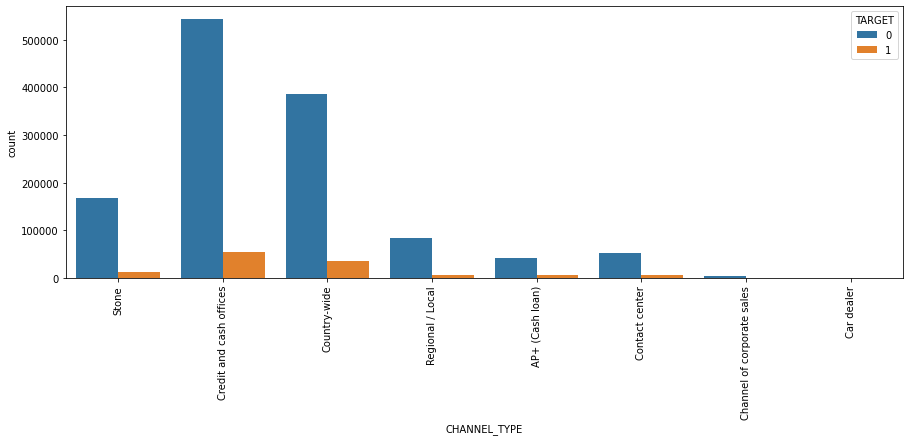

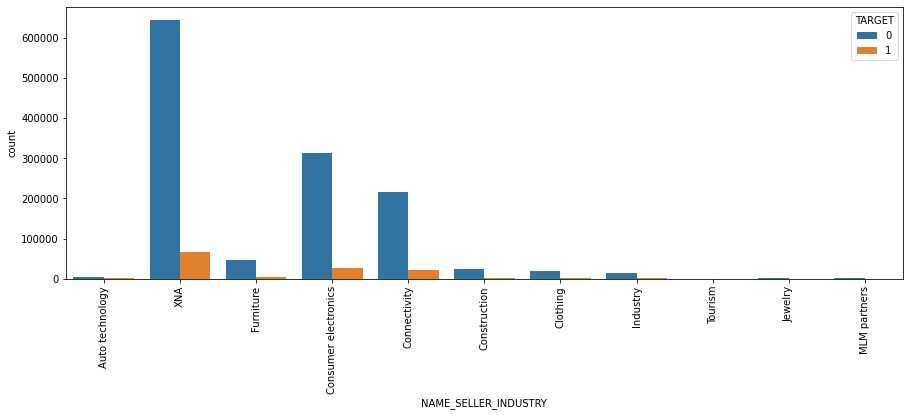

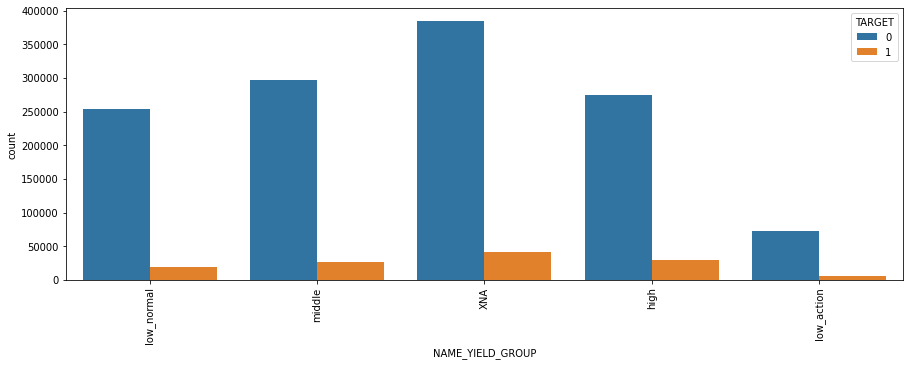

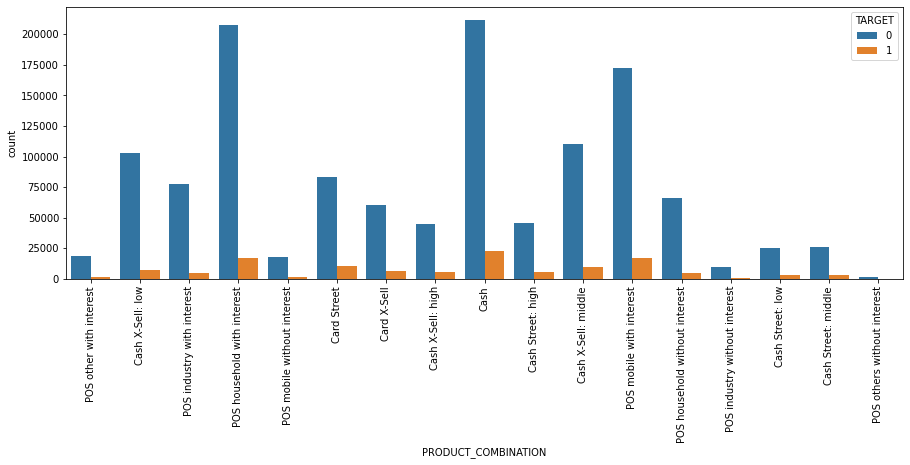

In [123]:
# Countplot for all categorical columns with respect to Target column
for i in merged.columns:
    if merged[i].dtype == 'object' or merged[i].dtype == 'category':
        plt.figure(figsize=(15,5))
        sns.countplot(merged[i], hue=merged['TARGET'])
        plt.xlabel(i)
        plt.xticks(rotation=90)
        plt.show()       
    

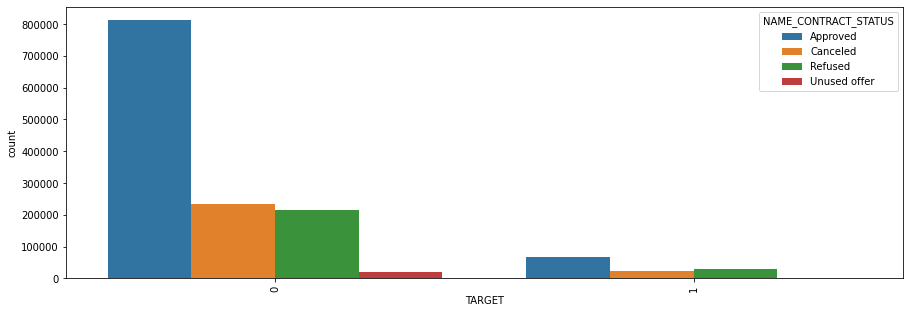

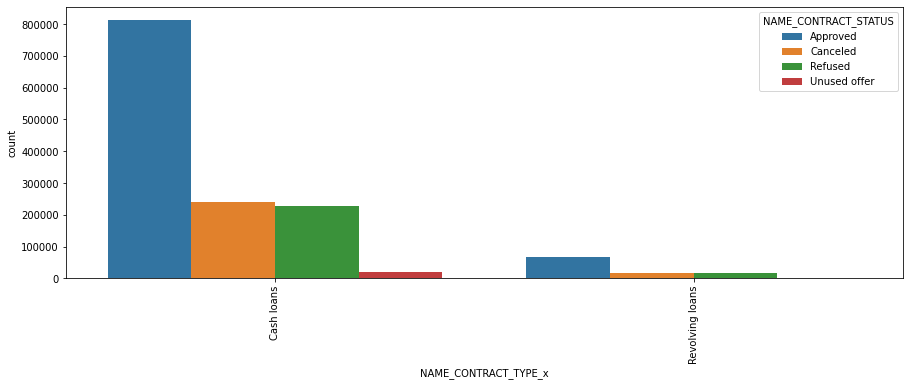

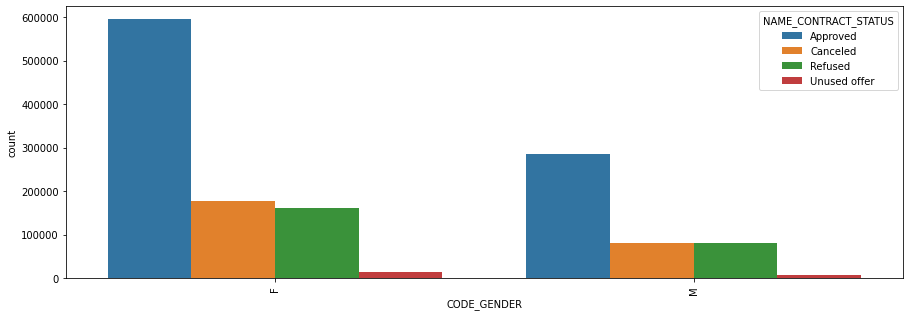

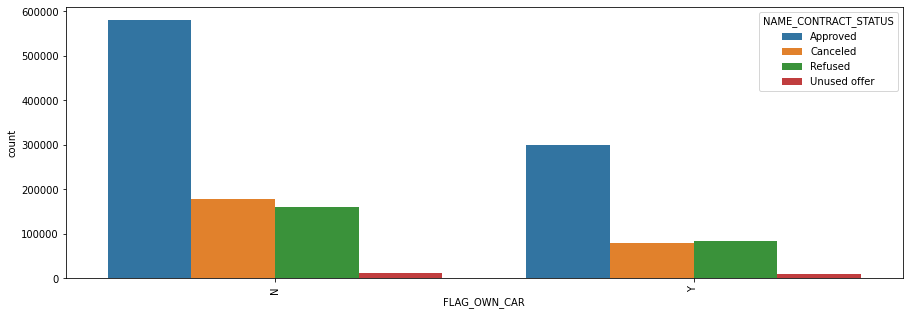

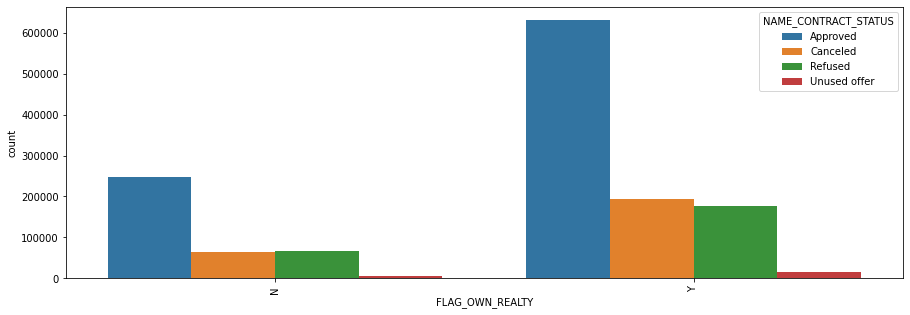

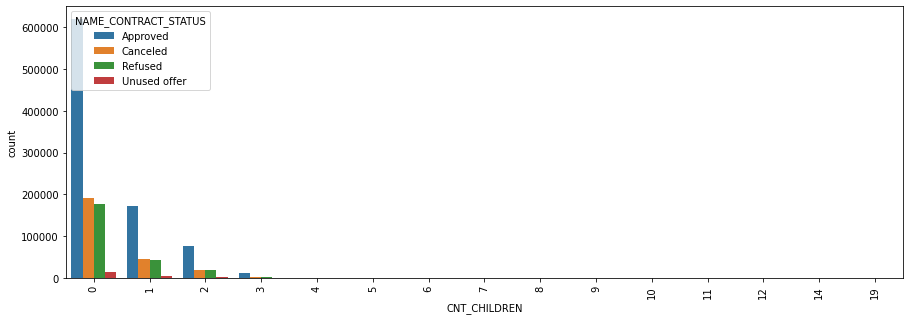

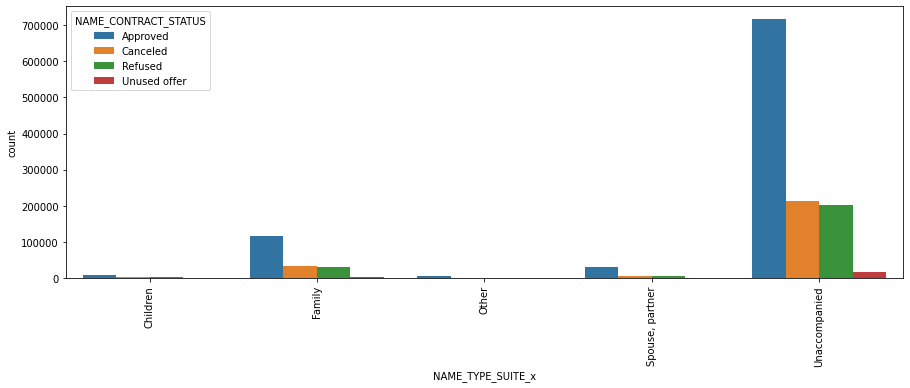

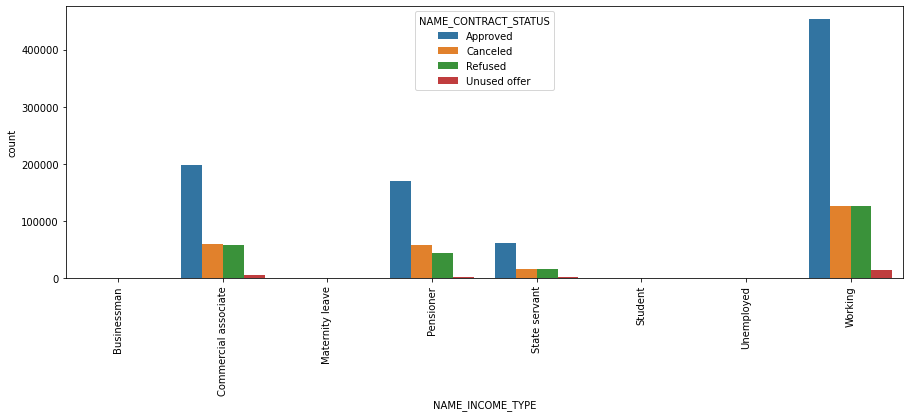

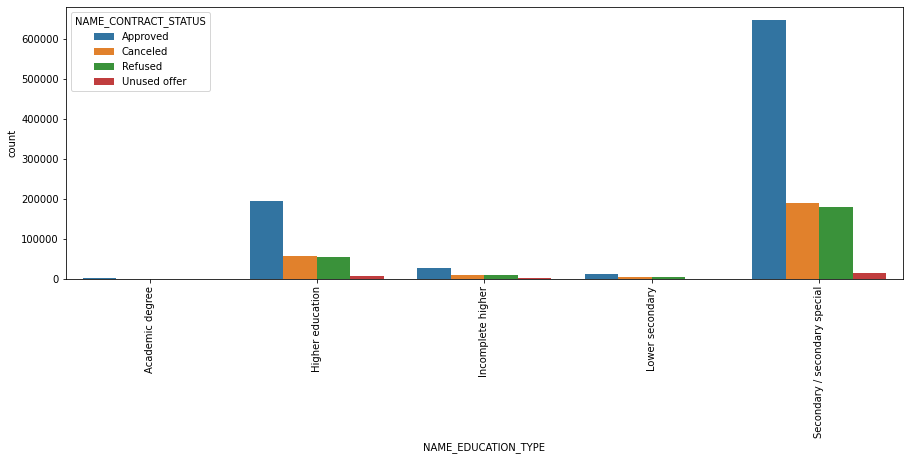

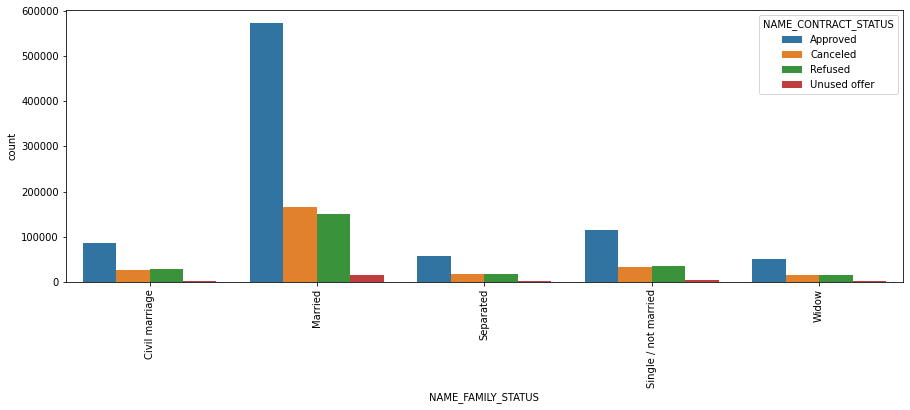

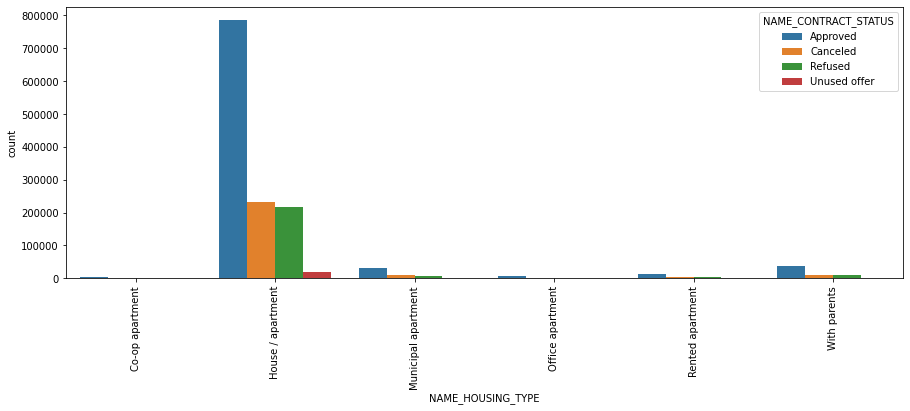

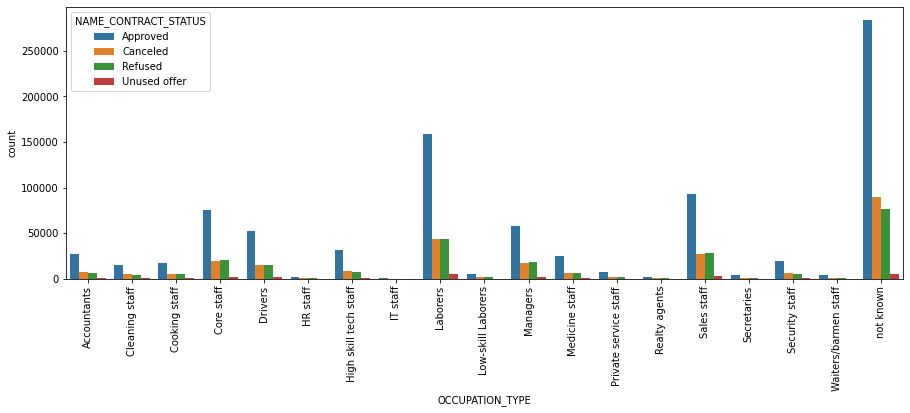

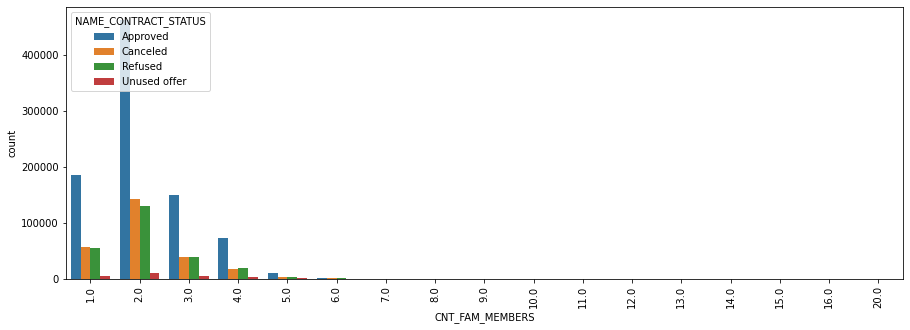

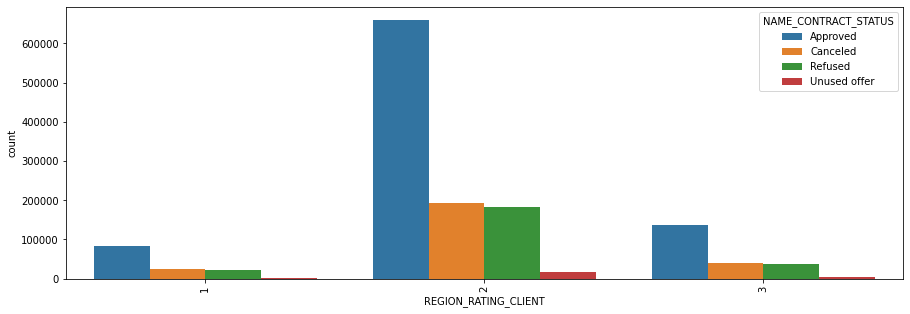

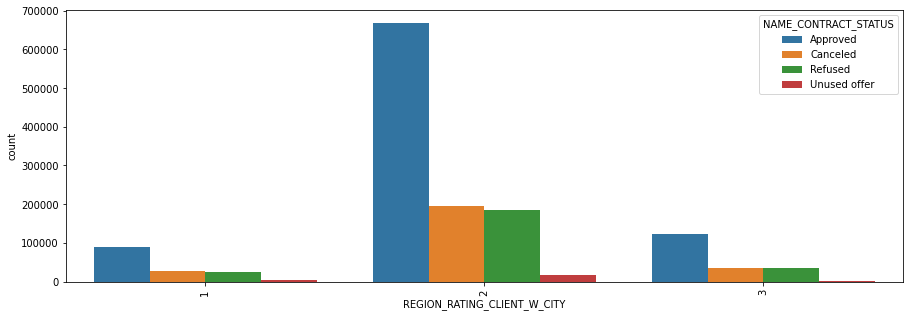

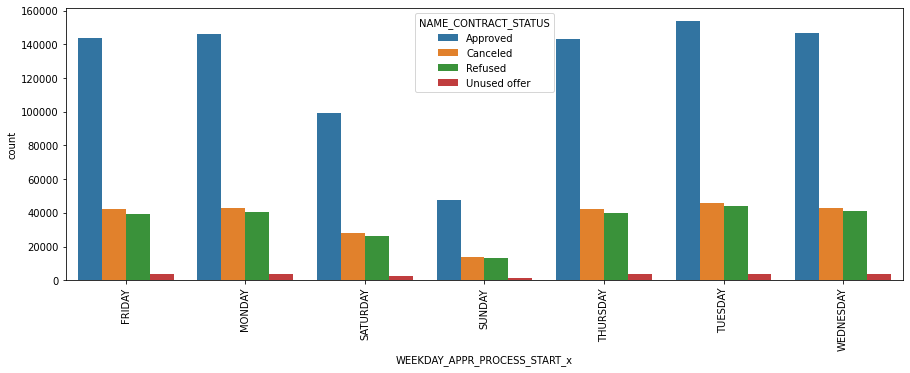

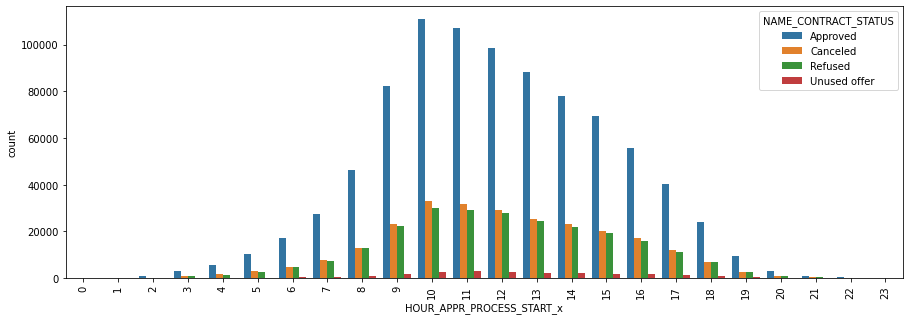

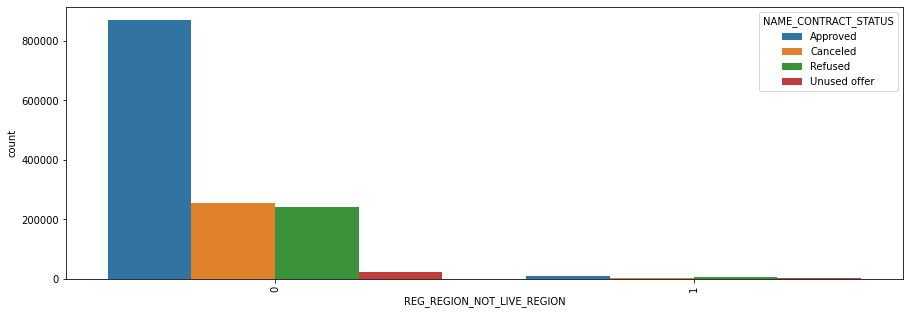

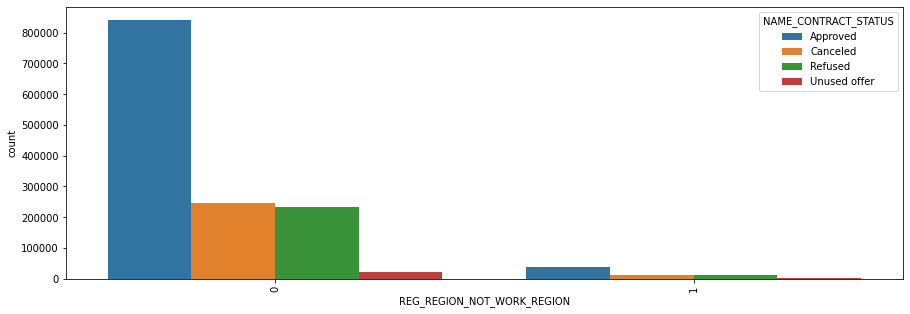

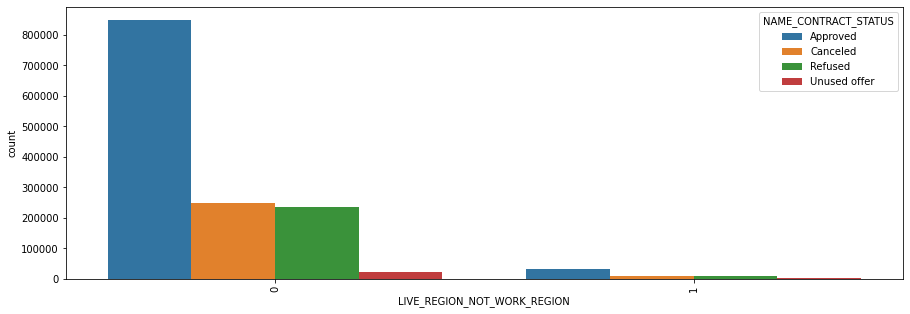

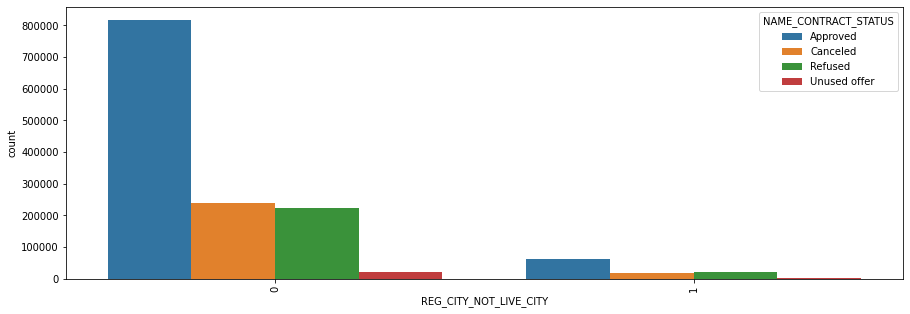

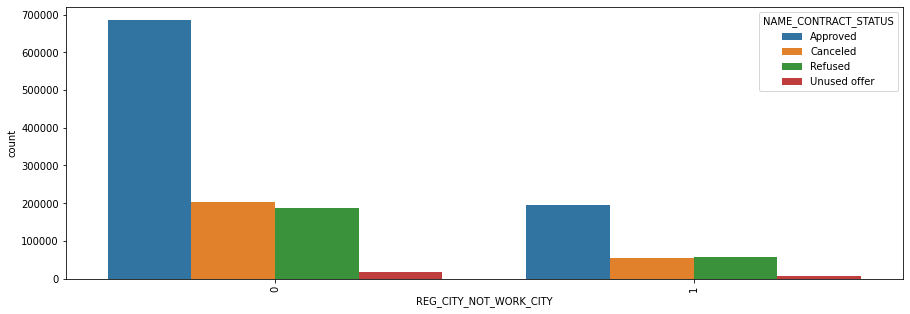

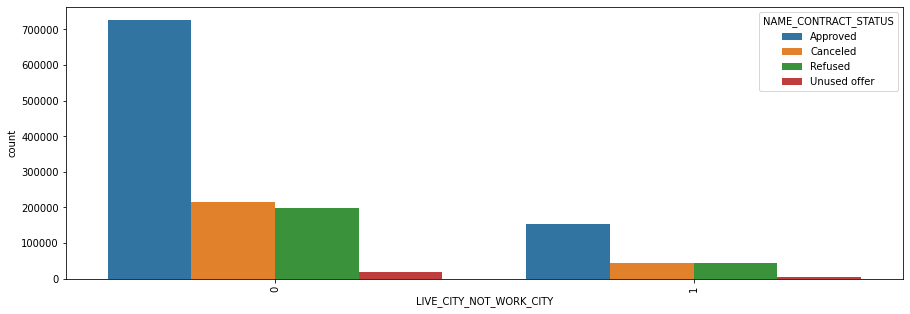

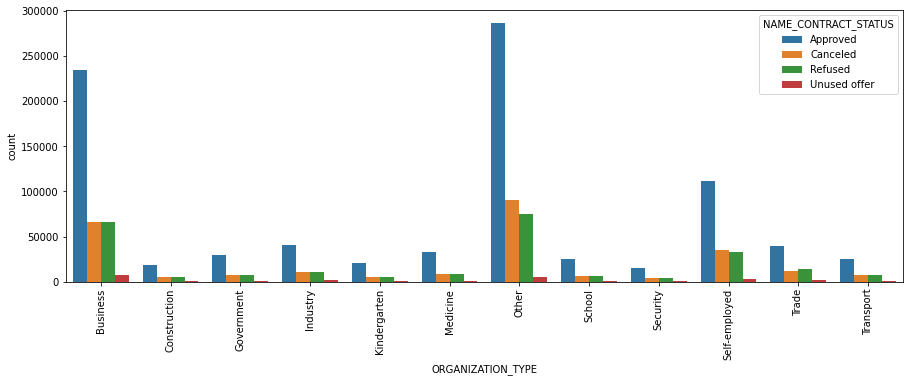

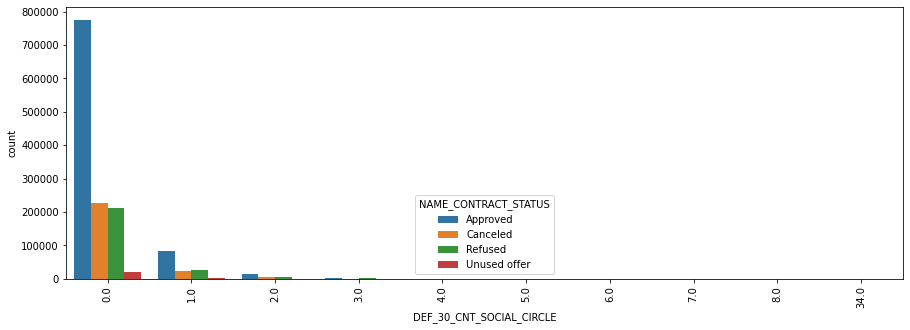

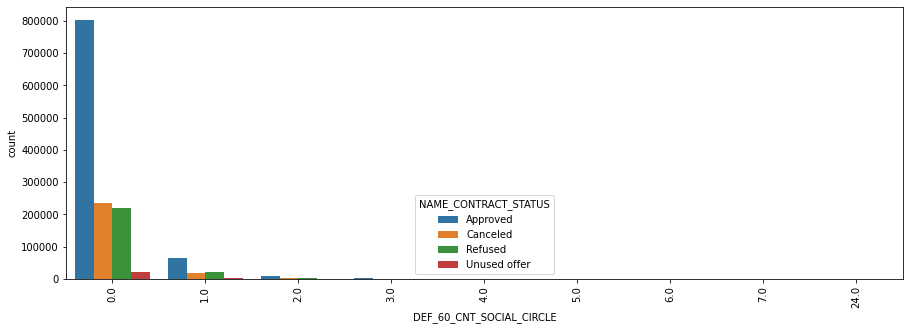

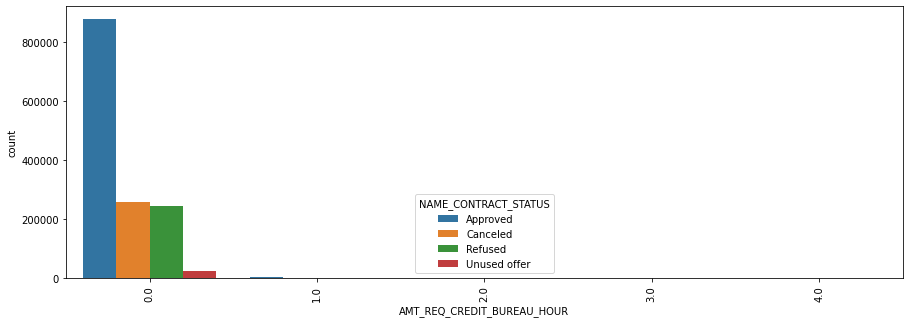

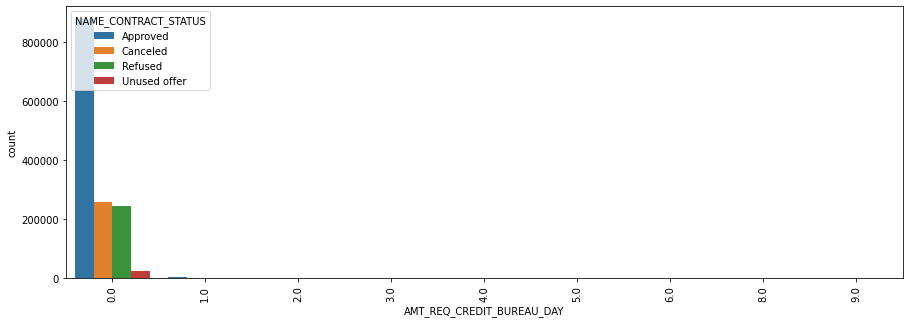

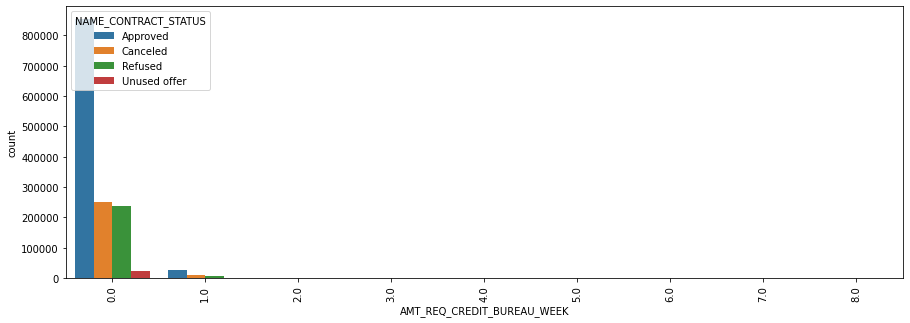

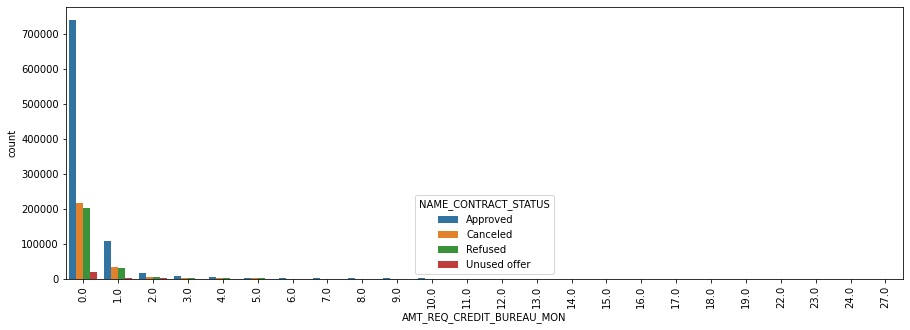

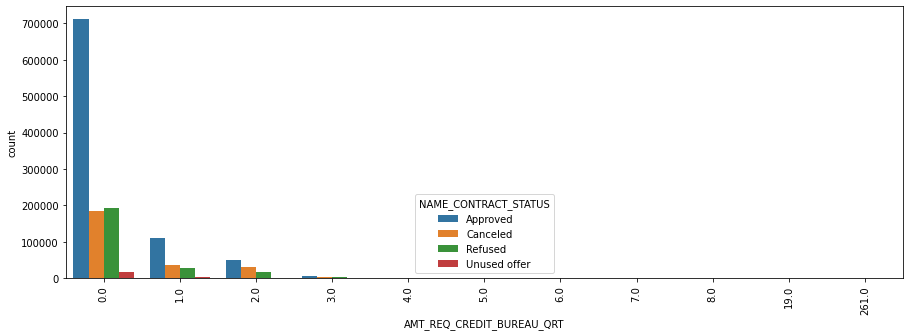

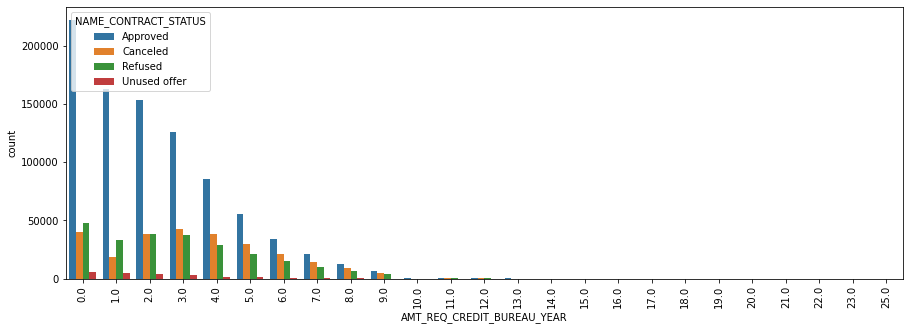

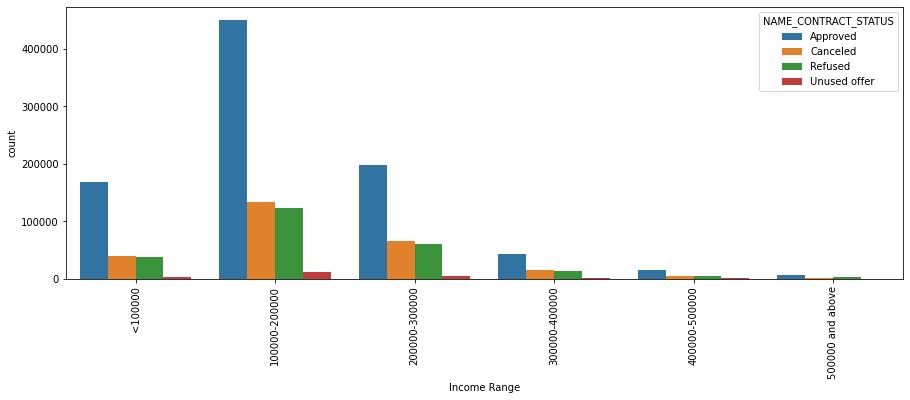

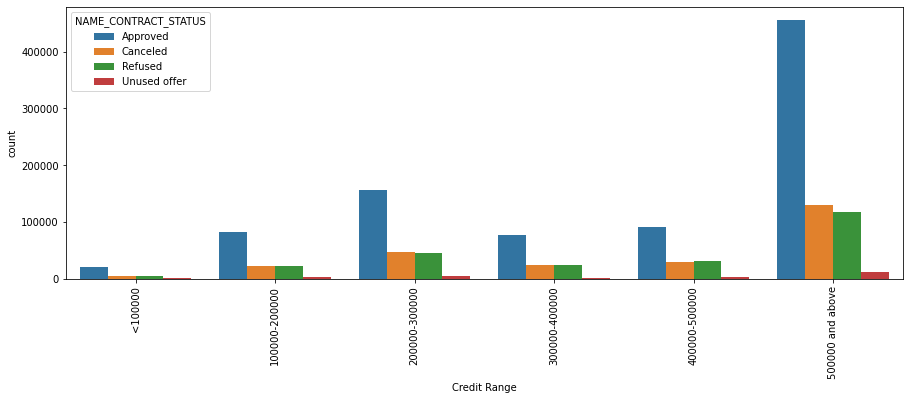

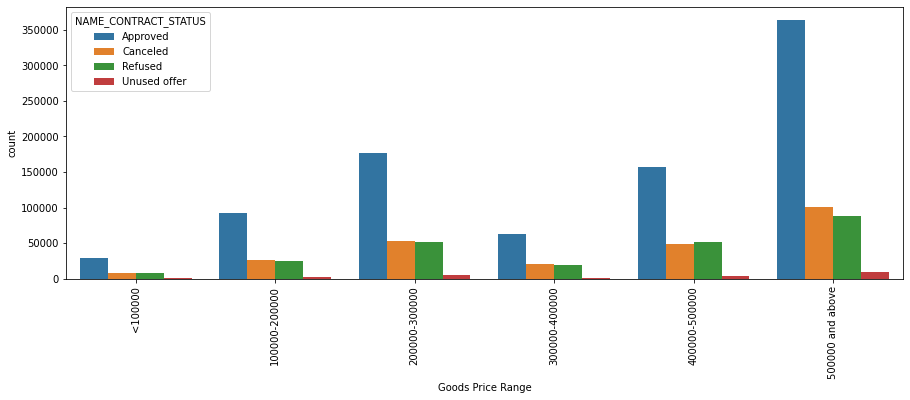

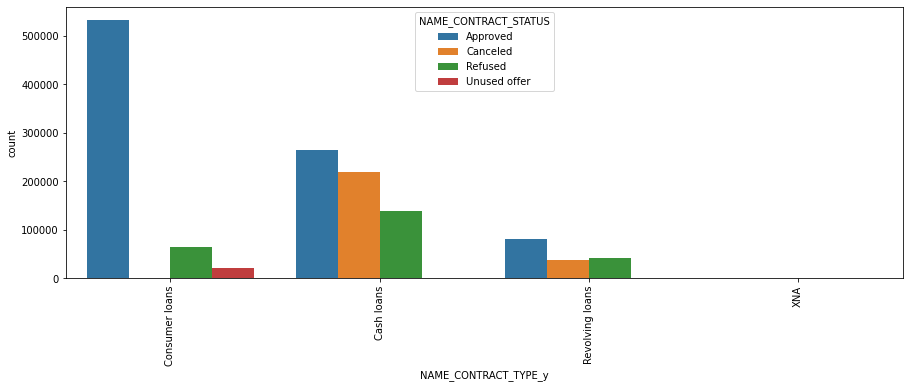

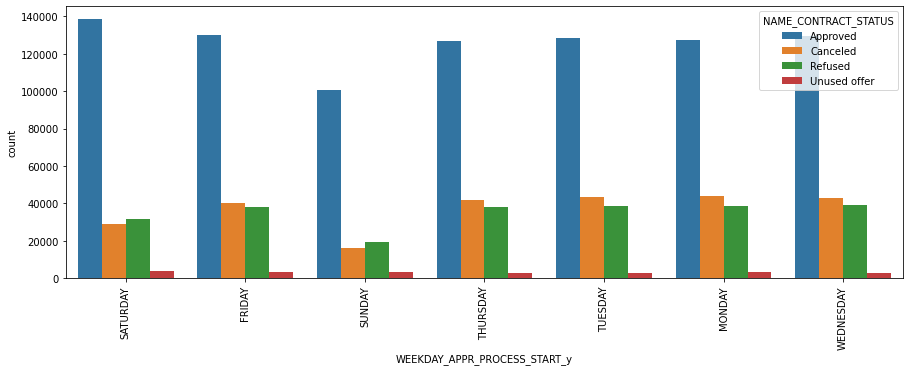

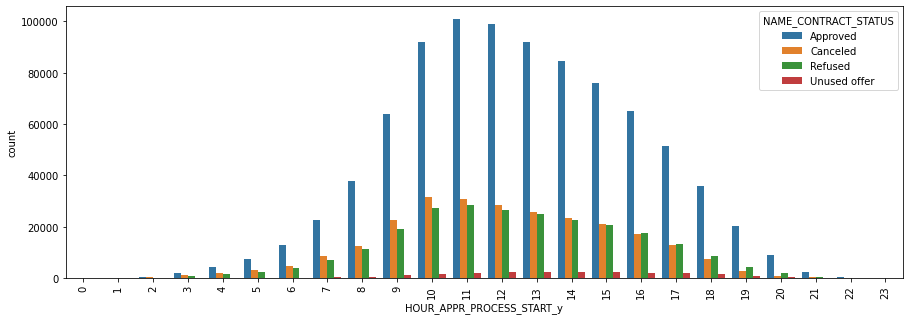

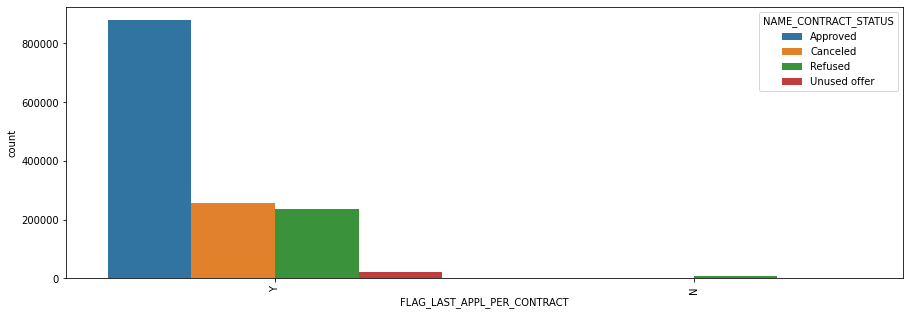

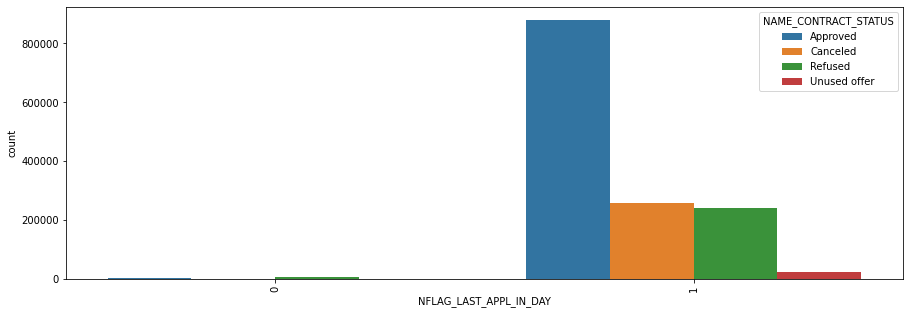

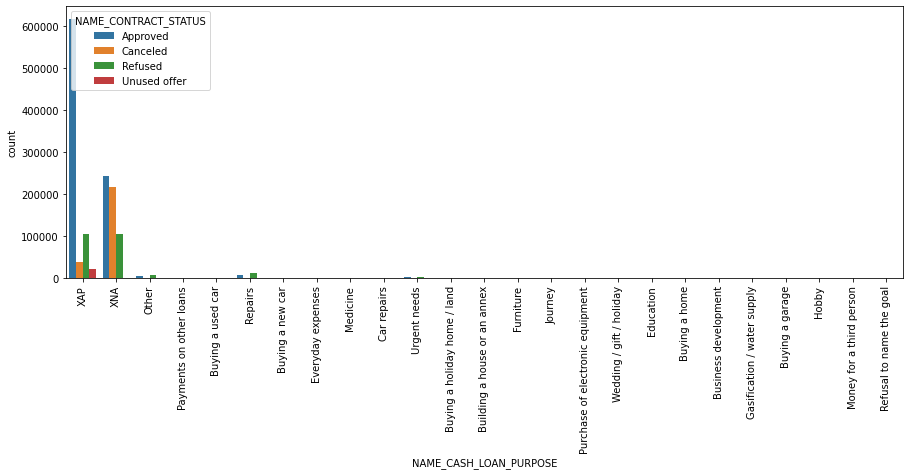

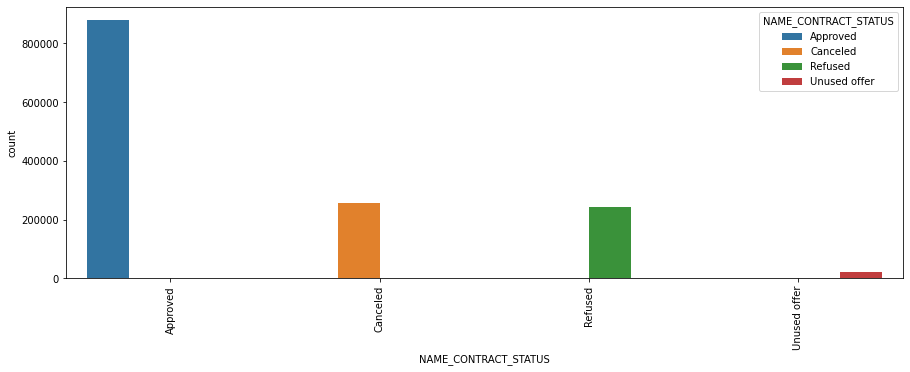

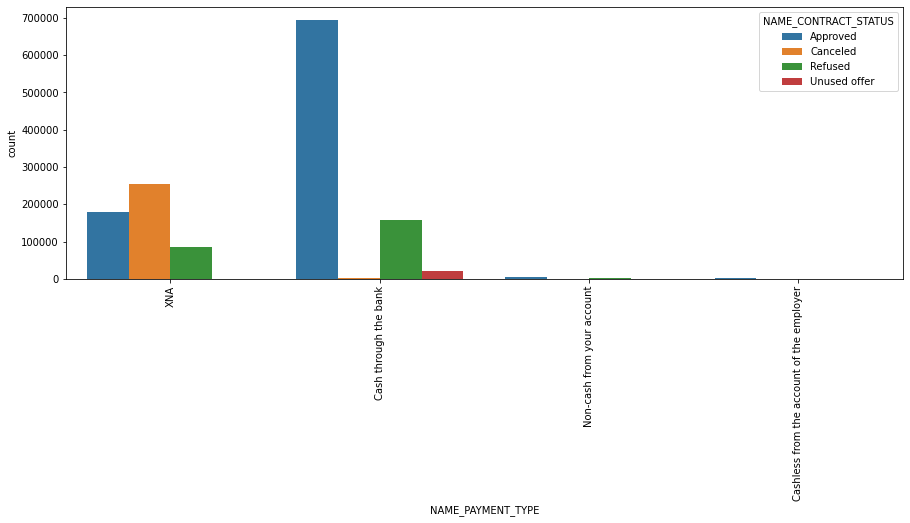

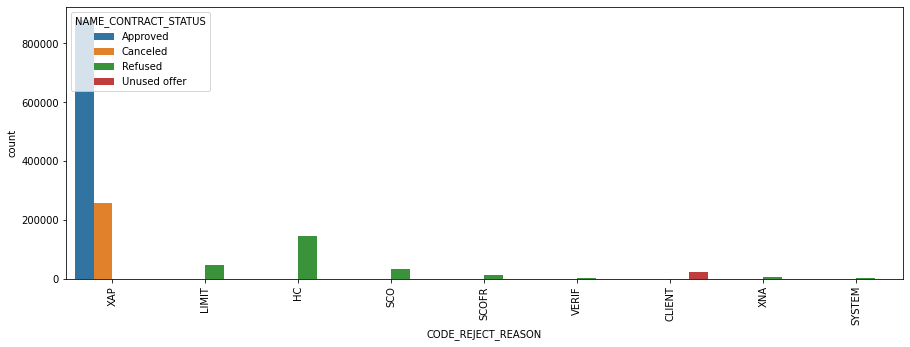

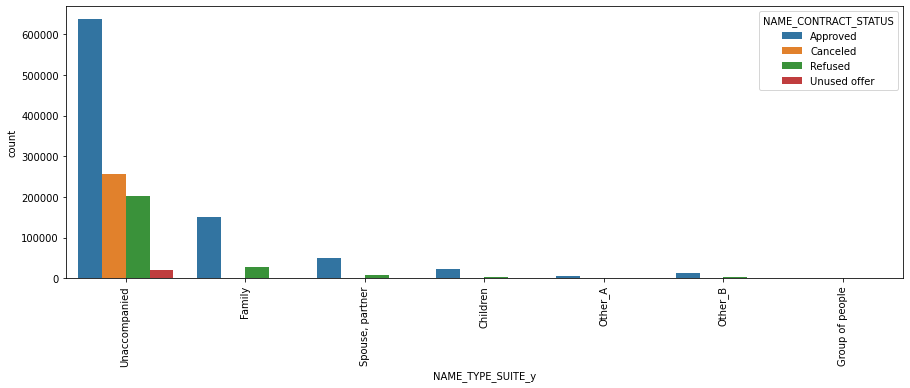

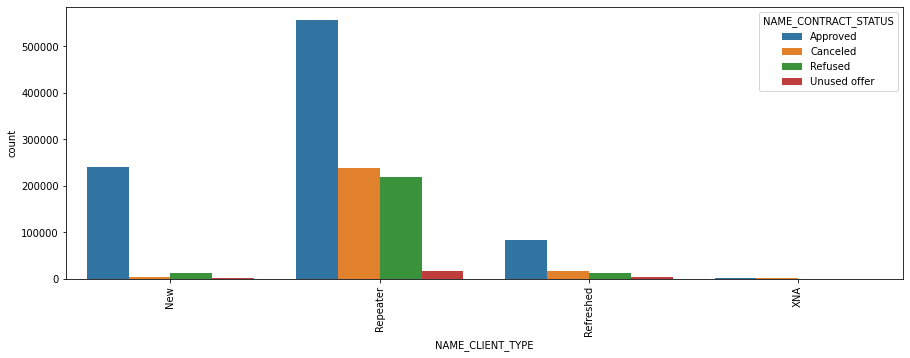

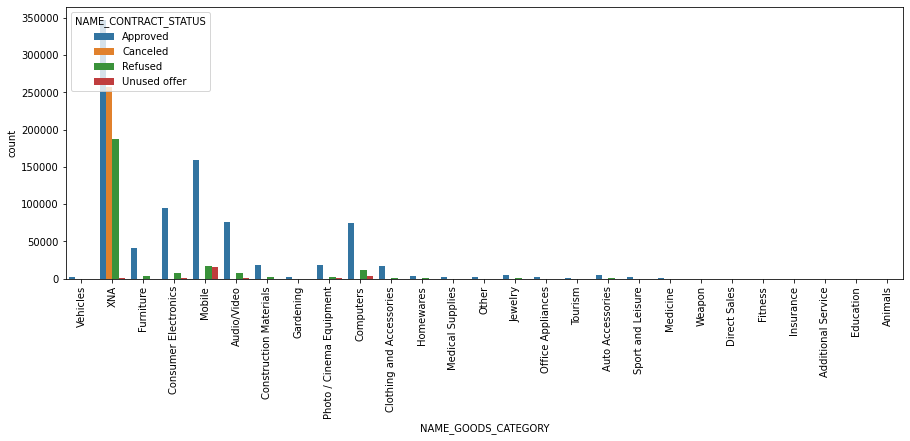

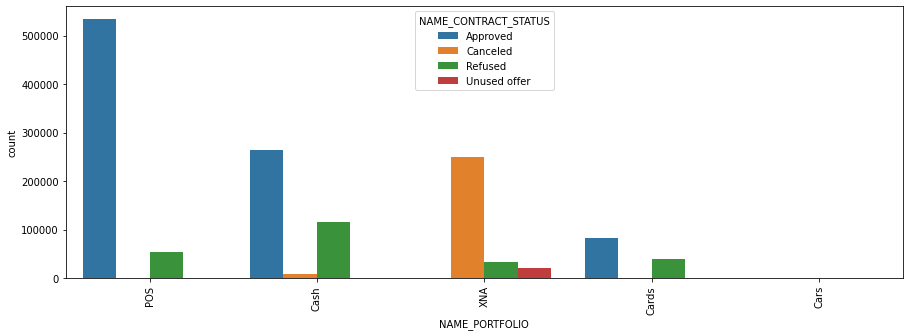

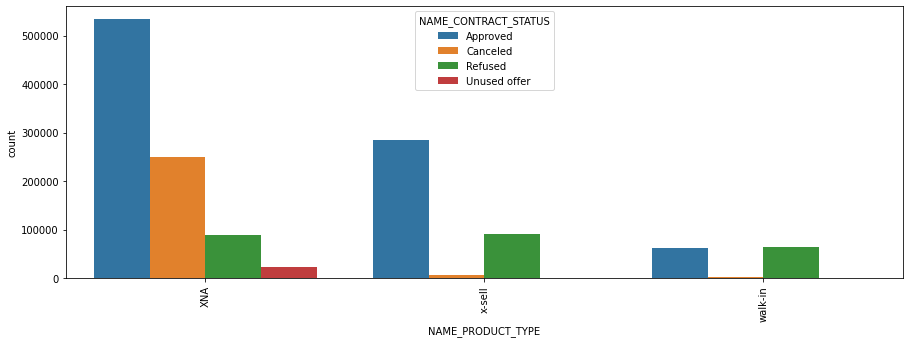

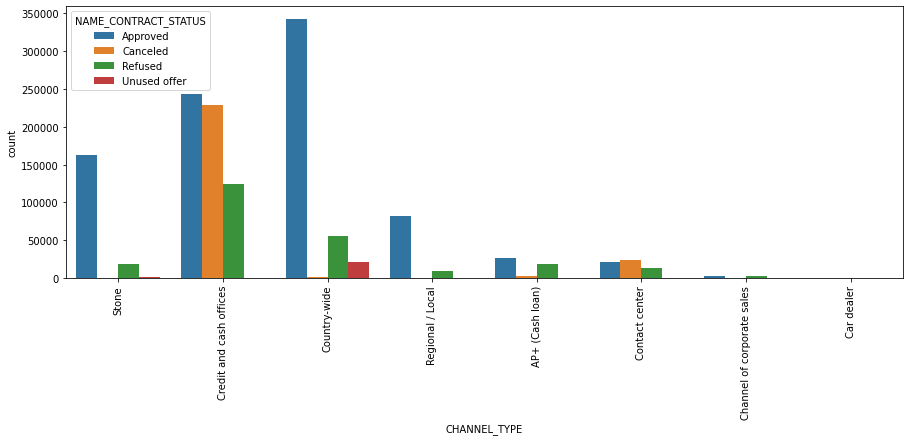

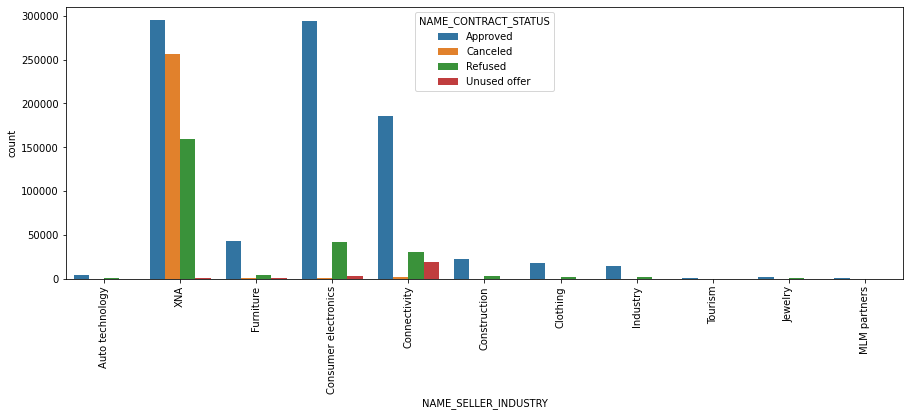

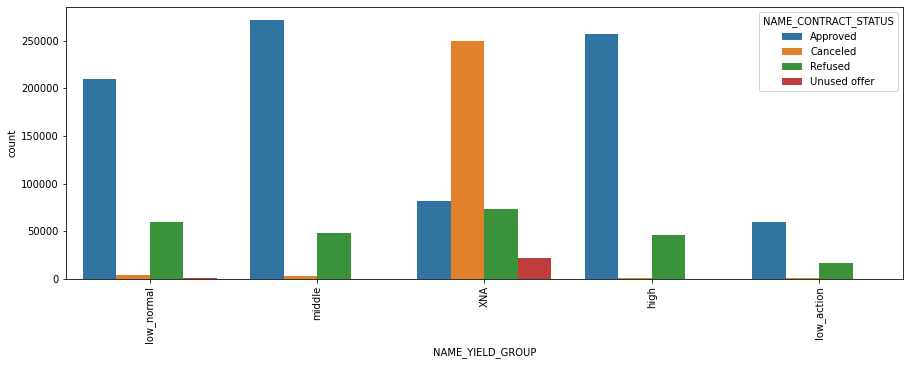

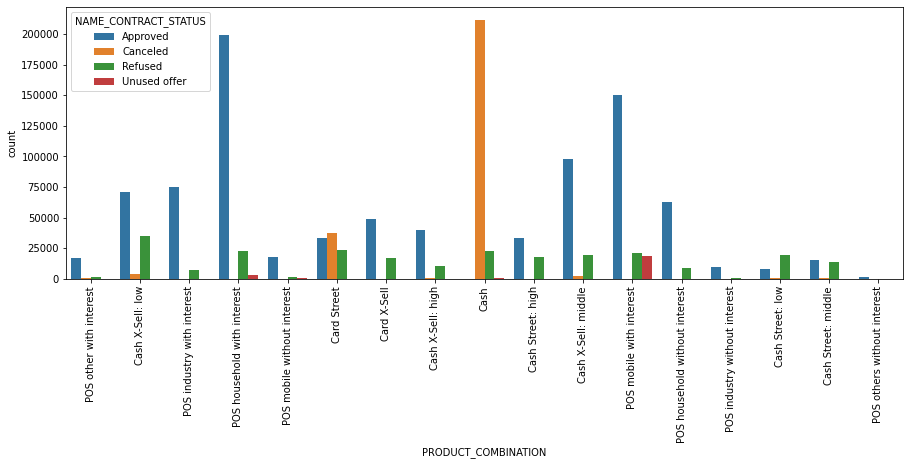

In [124]:
# Countplot for all categorical columns with respect to 'NAME_CONTRACT_STATUS' column
for i in merged.columns:
    if merged[i].dtype == 'object' or merged[i].dtype == 'category':
        plt.figure(figsize=(15,5))
        sns.countplot(merged[i], hue=merged['NAME_CONTRACT_STATUS'])
        plt.xlabel(i)
        plt.xticks(rotation=90)
        plt.show() 

## Merged data - Observations Categorical data analysis
* Gender - More female applicants availed loan than male and ratio of (non-defaulter and defaulter) is higher for male than female
* Income type - working category have higher number of applicants and defaulters
* Family status - Married people are more likely to default than other category
* Housing type - House / apartment category customers are more likely to default.
* Occupation type - Occupation not known for maximum number of clients
* Occupation type - Next to not known, Laborers are more like to deafult
* Organization type - Business clients, other and self employed have more loan applicants
* Income range - less than 300000 income are more likely to default
* Contract type - More Cash and consumer loans availed than revolving loans
* Contract type - Out of consumer and cash loans, cash loans have more loan repay defaulters.
* Client type - More loan applicants from repeater


In [125]:
# created two lists one with numerical and other with categorical columns
# Using groupby pandas function and aggregate to see any fidings
critical_num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x','AMT_GOODS_PRICE_x', 'DAYS_EMPLOYED']
critical_cat_cols = ['TARGET','CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS', 'Income Range', 'CONTRACT_TYPE']

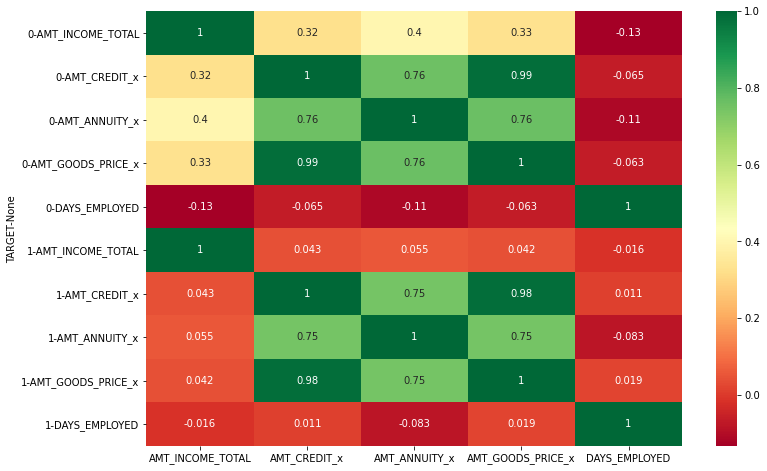

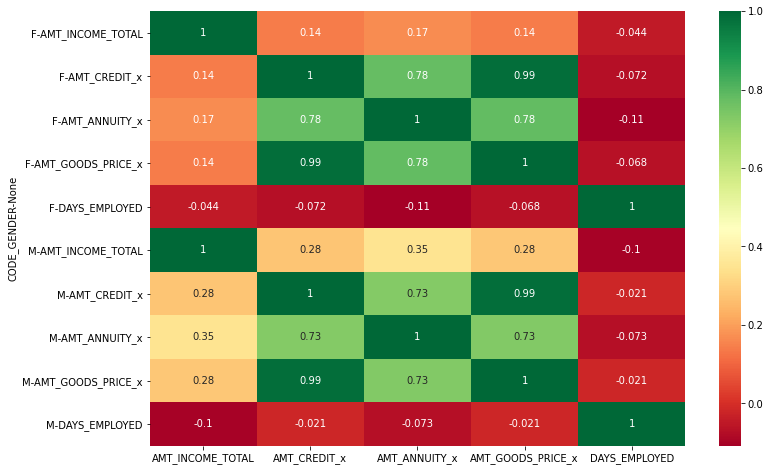

In [126]:
for i in critical_cat_cols[:2]:
    plt.figure(figsize=(12,8))
    ax = sns.heatmap(merged.groupby(i)[critical_num_cols].corr(), annot=True, cmap='RdYlGn')
    plt.show()

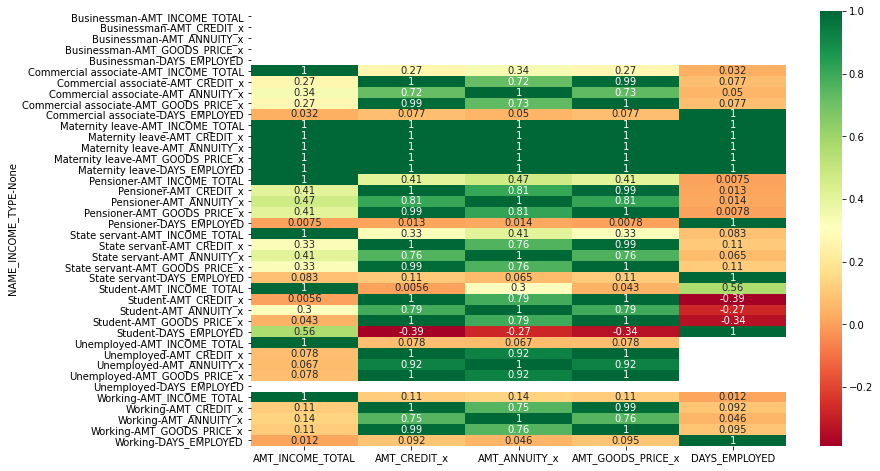

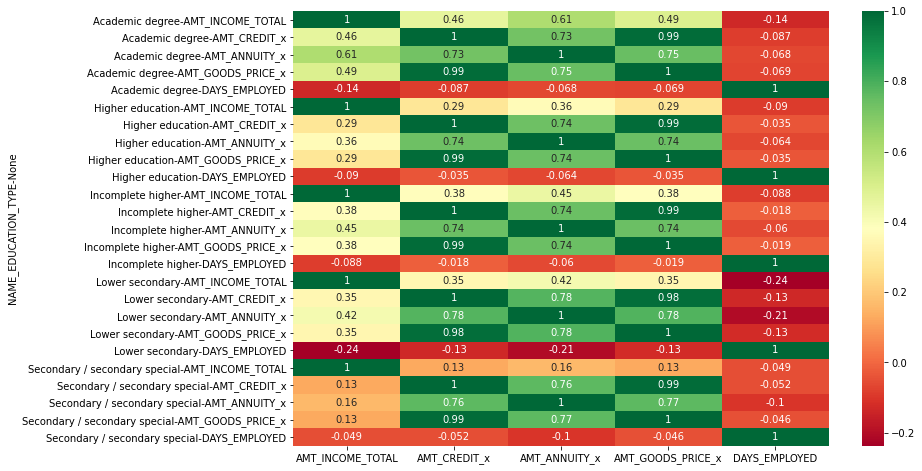

In [127]:
for i in critical_cat_cols[2:4]:
    plt.figure(figsize=(12,8))
    ax = sns.heatmap(merged.groupby(i)[critical_num_cols].corr(), annot=True, cmap='RdYlGn')
    plt.show()

# Summary

## Following are most important parameters to be considered for approving loan application

* Amount Income Total (lesser income more likely to have payment difficulty) / less median total income are more likely to default.
* Amount Credit - Clients with high Credit amount are less likely to have payment difficulty or default
* Days Employed - higher the number more likely to repay the loan
* Higher positive relationship of (Amount Annuity / Amount Income Total, Amount Goods Price / Amount Income Total and Amount Credit / Amount Income Total) these parameters will help to apporve loan.
* Gender - Male applicants likely to have payment difficulty than female
* Name Education Type
* Name Housing Type

